# 1 Data wrangling<a id='2_Data_wrangling'></a>

The purpose of this Data Science project is to develop a model to explain & understand the phenomenon of the Consumer Price Index for All Urban Consumers in the United States ( “Inflation” ). Inflation is an important component of developing investment strategies for portfolios across the world. The view on inflation becoming positive or negative is not agreed upon nor are the variables which influence it.

In this project, I have shortlisted **nineteen** ( **19** ) **variables** to determine their influence on inflation.

The fundamental **questions to resolve in this notebook** before we move on are:
   * Are the identified variables correlated with inflation?
   * Is there enough data to build out a model?


## 1.1 Imports & Others <a id='2.3_Imports'></a>

In [1]:
#Import the necessary tools required in the correct lines below
import quandl
from fredapi import Fred
from getpass import getpass
import investpy


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import os
import lxml
import datetime
import requests
import json
import collections
import seaborn as sns
from scipy import stats
import numpy as np


In [2]:
# These will be needed later

now = datetime.datetime.now()
year = now.strftime("%Y")
month = now.strftime("%m")
day = now.strftime("%d")
today_y_m_d_dash = now.strftime("%Y-%m-%d")
today_d_m_y_dash = now.strftime("%d/%m/%Y")


In [3]:
# Importing Quandl API requires a password
# If you don't have one, please see the link below
# https://docs.quandl.com/docs#section-authentication

my_quandl_API = getpass()

········


In [4]:
quandl.ApiConfig.api_key = my_quandl_API

In [5]:
# Importing FRED API requires a password ( FRED stands for Federal Reserve Economic Data )
# If you don't have one, please see the link below
# https://fred.stlouisfed.org/docs/api/fred/

my_FRED_API = getpass()

········


In [6]:
fred = Fred(api_key=my_FRED_API)

In [7]:
# Here I am structuring a color scale for heatmaps which will be used later

cdict = {'green':  ((0.0, 0.0, 0.0),   # no red at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.8, 0.8)),  # set to 0.8 so its not too bright at 1

        'red': ((0.0, 0.8, 0.8),   # set to 0.8 so its not too bright at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0)),  # no green at 1

        'blue':  ((0.0, 0.0, 0.0),   # no blue at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0))   # no blue at 1
       }

# Create the colormap using the dictionary
GnRd = colors.LinearSegmentedColormap('GnRd', cdict)


## 1.2 Loaded Data<a id='2.5_Load_The_Ski_Resort_Data'></a>

Please note, I may intend to build another USD Index based on the United States actual engagement in the world.
In other words, the USD Index used ( as of now ), is not based on the United States' trade with the world
I listed below FX pairs to possibly build out a "version" of The [USD Index Trade Weighted](https://en.wikipedia.org/wiki/Trade-weighted_US_dollar_index) but given time constraints I will work with the US Dollar Index ( not trade weighted ) for now.

While the Trade Weighted Index can be accessed by an API ( FRED ), it only goes back to 2006 
so something similar would need be created if time permits. 
My major hurdle at this time is accessing trade data & time.

   * Eurozone, Canada, Japan, Mexico, China, United Kingdom, Taiwan, South Korea, Singapore, Hong Kong, Malaysia, Brazil, Switzerland, Thailand, Philippines, Australia, Indonesia, India, Israel, Saudi Arabia, Russia, Sweden, Argentina, Venezuela, Chile & Colombia


In [8]:
# Daily Data
usd_index = quandl.get('CHRIS/ICE_DX1')
wti = quandl.get('CHRIS/CME_CL1')
copper = investpy.get_commodity_historical_data(commodity='Copper', country='United States', from_date='01/01/1978', to_date=today_d_m_y_dash)
soybeans = investpy.get_commodity_historical_data(commodity='US Soybeans', from_date='01/01/1978', to_date=today_d_m_y_dash)
natgas = investpy.get_commodity_historical_data(commodity='Natural Gas', from_date='01/01/1978', to_date=today_d_m_y_dash)
heatoil = investpy.get_commodity_historical_data(commodity='Heating Oil', from_date='01/01/1978', to_date=today_d_m_y_dash)
corn = investpy.get_commodity_historical_data(commodity='US Corn', from_date='01/01/1978', to_date=today_d_m_y_dash)
wheat = investpy.get_commodity_historical_data(commodity='US Wheat', from_date='01/01/1978', to_date=today_d_m_y_dash)
cattle = investpy.get_commodity_historical_data(commodity='Live Cattle', from_date='01/01/1978', to_date=today_d_m_y_dash)
sugar = investpy.get_commodity_historical_data(commodity='US Sugar #11', from_date='01/01/1978', to_date=today_d_m_y_dash)
lumber = investpy.get_commodity_historical_data(commodity='Lumber', from_date='01/01/1978', to_date=today_d_m_y_dash)
leanhogs = investpy.get_commodity_historical_data(commodity='Lean Hogs', from_date='01/01/1978', to_date=today_d_m_y_dash)

# Weekly Data
int_job_claims = quandl.get('FRED/ICSA')

# Monthly Data
cpi = quandl.get('RATEINF/INFLATION_USA')
wages_cpi = fred.get_series('CWSR0000SA0')
cap_util = fred.get_series('TCU')
unrate = quandl.get('FRED/UNRATE')
comppmi = quandl.get('ISM/MAN_PMI')

# Quarterly Data
m2_velo = fred.get_series('M2V')
gdp = fred.get_series('GDP')


In [9]:
# I chose not to not include the below for the reasons listed above their code:

# This may have altered the heatmap w/ M2 Velocity; this was less correlated   
    # us_M2 = fred.get_series('M2')              
# only goes back to 2005
    # steel = investpy.get_commodity_historical_data(commodity='US Midwest Domestic Hot-Rolled Coil Steel Futures', from_date='01/01/1978', to_date=today_d_m_y_dash)
# only goes back to 2005
    # gasoline = investpy.get_commodity_historical_data(commodity='Gasoline RBOB', from_date='01/01/1978', to_date=today_d_m_y_dash)
# only goes back to 2008  
    # oats = investpy.get_commodity_historical_data(commodity='Oats', from_date='01/01/1978', to_date=today_d_m_y_dash)
# this was removed due to amount of data
    # us_wages_hrly_earnings = fred.get_series('CES0500000003')
# poor results
    # us_wages_compensation = fred.get_series('A576RC1')


In [10]:
# As the purpose of this section is to accumulate all the data into one location to cross reference future works integrity,
# I put all here to referance ( if required ) later.

main_df = pd.concat([cpi,wages_cpi,wti['Last'],heatoil['Close'],copper['Close'],sugar['Close'],natgas['Close'],
                     cattle['Close'],leanhogs['Close'],soybeans['Close'],lumber['Close'],
                     cap_util,corn['Close'],m2_velo,gdp,wheat['Close'],comppmi['PMI'],usd_index['Settle'],
                     unrate,int_job_claims],
                    axis = 1, ignore_index=False)

main_df = main_df.fillna(method='ffill')
main_df.columns = ['Inflation','Wages CPI','WTI','Heating Oil','Copper','Sugar','Natural Gas','Cattle',
                   'Lean Hogs','Soybeans','Lumber','Capacity Utilization','Corn','M2 Velocity','GDP',
                   'Wheat','PMI','USD Index','Unemployment Rate','Initial Jobless Claims'
                  ]
main_df['Inflation'].index
main_df.index.names = ["Date"]

main_df = main_df[main_df.index.dayofweek < 5]

main_df.sort_values(by="Date", ascending=False)

# I will sometimes take a look to ensure it is working properly
# main_df.tail()
# main_df.head()


Inflation  Wages CPI    WTI  Heating Oil  Copper  Sugar  \
Date                                                                  
2021-05-07       2.62    258.904  64.82       2.0106  4.7485  17.49   
2021-05-06       2.62    258.904  64.86       1.9895  4.6025  17.55   
2021-05-05       2.62    258.904  65.31       2.0025  4.5240  17.53   
2021-05-04       2.62    258.904  66.15       1.9988  4.5215  17.12   
2021-05-03       2.62    258.904  64.50       1.9519  4.5285  16.73   
...               ...        ...    ...          ...     ...    ...   
1914-08-31       3.03        NaN    NaN          NaN     NaN    NaN   
1914-07-31       1.01        NaN    NaN          NaN     NaN    NaN   
1914-06-30       1.02        NaN    NaN          NaN     NaN    NaN   
1914-04-30       0.00        NaN    NaN          NaN     NaN    NaN   
1914-03-31       1.02        NaN    NaN          NaN     NaN    NaN   

            Natural Gas   Cattle  Lean Hogs  Soybeans  Lumber  \
Date                                                            
2021-05-07        2.958  116.025     111.97   1589.50  1686.0   
2021-05-06        2.928  115.475     111.40   1566.25  1645.0   
2021-05-05        2.938  114.425     111.38   1546.50  1634.9   
2021-05-04        2.967  113.025     111.15   1538.12  1609.0   
2021-05-03        2.966  115.300     110.70   1523.00  1575.6   
...                 ...      ...        ...       ...     ...   
1914-08-31          NaN      NaN        NaN       NaN     NaN   
1914-07-31          NaN      NaN        NaN       NaN     NaN   
1914-06-30          NaN      NaN        NaN       NaN     NaN   
1914-04-30          NaN      NaN        NaN       NaN     NaN   
1914-03-31          NaN      NaN        NaN       NaN     NaN   

            Capacity Utilization    Corn  M2 Velocity        GDP   Wheat  \
Date                                                                       
2021-05-07               74.3914  772.75        1.123  22048.894  763.00   
2021-05-06               74.3914  759.50        1.123  22048.894  752.88   
2021-05-05               74.3914  753.25        1.123  22048.894  745.75   
2021-05-04               74.3914  744.75        1.123  22048.894  729.00   
2021-05-03               74.3914  732.25        1.123  22048.894  721.75   
...                          ...     ...          ...        ...     ...   
1914-08-31                   NaN     NaN          NaN        NaN     NaN   
1914-07-31                   NaN     NaN          NaN        NaN     NaN   
1914-06-30                   NaN     NaN          NaN        NaN     NaN   
1914-04-30                   NaN     NaN          NaN        NaN     NaN   
1914-03-31                   NaN     NaN          NaN        NaN     NaN   

             PMI  USD Index  Unemployment Rate  Initial Jobless Claims  
Date                                                                    
2021-05-07  60.7     90.216                6.1                553000.0  
2021-05-06  60.7     90.936                6.1                553000.0  
2021-05-05  60.7     91.293                6.1                553000.0  
2021-05-04  60.7     91.275                6.1                553000.0  
2021-05-03  60.7     90.927                6.1                553000.0  
...          ...        ...                ...                     ...  
1914-08-31   NaN        NaN                NaN                     NaN  
1914-07-31   NaN        NaN                NaN                     NaN  
1914-06-30   NaN        NaN                NaN                     NaN  
1914-04-30   NaN        NaN                NaN                     NaN  
1914-03-31   NaN        NaN                NaN                     NaN  

[11498 rows x 20 columns]

In [11]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11498 entries, 1914-03-31 to 2021-05-07
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Inflation               11498 non-null  float64
 1   Wages CPI               11212 non-null  float64
 2   WTI                     9820 non-null   float64
 3   Heating Oil             10647 non-null  float64
 4   Copper                  8463 non-null   float64
 5   Sugar                   10647 non-null  float64
 6   Natural Gas             8030 non-null   float64
 7   Cattle                  10642 non-null  float64
 8   Lean Hogs               10647 non-null  float64
 9   Soybeans                8096 non-null   float64
 10  Lumber                  10647 non-null  float64
 11  Capacity Utilization    10868 non-null  float64
 12  Corn                    10647 non-null  float64
 13  M2 Velocity             11006 non-null  float64
 14  GDP                  

`Inflation` has by and large the most data while `Natural Gas` has the least. Let's move forward with using the `Natural Gas` amount limitations.

I will move forward with only the data where all information is present with no null values

In [12]:
main_df = main_df.loc['1990-04-04':today_y_m_d_dash]

# The reason 1990 was chosen is becuase Natural Gas only goes back that far; take a look if you wish 
# natgas.head()

In [13]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8030 entries, 1990-04-04 to 2021-05-07
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Inflation               8030 non-null   float64
 1   Wages CPI               8030 non-null   float64
 2   WTI                     8030 non-null   float64
 3   Heating Oil             8030 non-null   float64
 4   Copper                  8030 non-null   float64
 5   Sugar                   8030 non-null   float64
 6   Natural Gas             8030 non-null   float64
 7   Cattle                  8030 non-null   float64
 8   Lean Hogs               8030 non-null   float64
 9   Soybeans                8030 non-null   float64
 10  Lumber                  8030 non-null   float64
 11  Capacity Utilization    8030 non-null   float64
 12  Corn                    8030 non-null   float64
 13  M2 Velocity             8030 non-null   float64
 14  GDP                   

In [14]:
cd

C:\Users\rands


In [15]:
# Here I am saving the non-adjusted ( raw ) data to investigate whether the adjustments further along yield correctly

main_df = main_df.sort_values(by="Date", ascending=False)

main_df_csv = pd.DataFrame(main_df)
main_df_csv.to_excel('./_Capstone_One_Inflation/data/main_df_csv_w_commodities.xlsx')
print('Finished; keep going!')

Finished; keep going!


**Here we will create a summary of the variables.**

In [16]:
var_sum = main_df.T
var_sum = var_sum.index
var_sum = pd.DataFrame(var_sum)

In [17]:
reported = [ 'Monthly','Monthly','Daily','Daily','Daily','Daily','Daily','Daily','Daily','Daily',
           'Daily','Monthly','Daily','Quarterly','Quarterly','Daily','Monthly','Daily','Monthly','Weekly']
api = [ 'Quandl','FRED','Quandl','Investpy','Investpy','Investpy','Investpy','Investpy',
              'Investpy','Investpy','Investpy','FRED','Investpy','FRED','FRED',
              'Investpy','Quandl','Quandl','Quandl','Quandl']

api_source = [ 'U.S. Bureau of Labor Statistics',
            'U.S. Bureau of Labor Statistics',
            'CME',
            'Investing.com',
            'Investing.com',
            'Investing.com',
            'Investing.com',
            'Investing.com',
            'Investing.com',
            'Investing.com',
            'Investing.com',
            'Board of Governors of the Federal Reserve',
            'Investing.com',
            'Federal Reserve Bank of St. Louis',
            'U.S. Bureau of Economic Analysis',
            'Investing.com',
            'Institute of Supply Management',
            'Intercontinental Exchange Inc',
            'U.S. Bureau of Labor Statistics',
            'U.S. Employment and Training Administration'
             ]

comments = [ 'The target variable',
            'A component of the target variable',
            'West Texas Intermediate - One of many commodities',
            'One of many commodities',
            'One of many commodities',
            'One of many commodities',
            'One of many commodities',
            'One of many commodities',
            'One of many commodities',
            'One of many commodities',
            'One of many commodities',
            'The % of resources used by corporations',
            'One of many commodities',
            'Movement of money; state of the economy proxy',
            'A proxy for the state of the economy',
            'One of many commodities',
            'Manufacturing PMI - A proxy for the economy',
            '( DXY ) Proxy for potentially importing inflation',
            'A proxy for the state of the economy',
            'A proxy for the state of the economy']


In [18]:
var_sum['Reported'] = reported
var_sum['API'] = api
var_sum['API Source'] = api_source
var_sum['Comments'] = comments

var_sum = var_sum.rename(columns={0:'Items', 
                                  'Reported':'Reported',
                                  'API':'API',
                                  'API Source':'API Source',
                                  'Comments':'Comments'}
                        )

In [19]:
var_sum

Items   Reported       API  \
0                Inflation    Monthly    Quandl   
1                Wages CPI    Monthly      FRED   
2                      WTI      Daily    Quandl   
3              Heating Oil      Daily  Investpy   
4                   Copper      Daily  Investpy   
5                    Sugar      Daily  Investpy   
6              Natural Gas      Daily  Investpy   
7                   Cattle      Daily  Investpy   
8                Lean Hogs      Daily  Investpy   
9                 Soybeans      Daily  Investpy   
10                  Lumber      Daily  Investpy   
11    Capacity Utilization    Monthly      FRED   
12                    Corn      Daily  Investpy   
13             M2 Velocity  Quarterly      FRED   
14                     GDP  Quarterly      FRED   
15                   Wheat      Daily  Investpy   
16                     PMI    Monthly    Quandl   
17               USD Index      Daily    Quandl   
18       Unemployment Rate    Monthly    Quandl   
19  Initial Jobless Claims     Weekly    Quandl   

                                     API Source  \
0               U.S. Bureau of Labor Statistics   
1               U.S. Bureau of Labor Statistics   
2                                           CME   
3                                 Investing.com   
4                                 Investing.com   
5                                 Investing.com   
6                                 Investing.com   
7                                 Investing.com   
8                                 Investing.com   
9                                 Investing.com   
10                                Investing.com   
11    Board of Governors of the Federal Reserve   
12                                Investing.com   
13            Federal Reserve Bank of St. Louis   
14             U.S. Bureau of Economic Analysis   
15                                Investing.com   
16               Institute of Supply Management   
17                Intercontinental Exchange Inc   
18              U.S. Bureau of Labor Statistics   
19  U.S. Employment and Training Administration   

                                             Comments  
0                                 The target variable  
1                  A component of the target variable  
2   West Texas Intermediate - One of many commodities  
3                             One of many commodities  
4                             One of many commodities  
5                             One of many commodities  
6                             One of many commodities  
7                             One of many commodities  
8                             One of many commodities  
9                             One of many commodities  
10                            One of many commodities  
11            The % of resources used by corporations  
12                            One of many commodities  
13      Movement of money; state of the economy proxy  
14               A proxy for the state of the economy  
15                            One of many commodities  
16        Manufacturing PMI - A proxy for the economy  
17  ( DXY ) Proxy for potentially importing inflation  
18               A proxy for the state of the economy  
19               A proxy for the state of the economy

# 1.3.1 Q on Q Comparison

In 1.3.1 I will be setting up the infrastructure for **comparing quarterly changes on all variables** against a **quarterly change in inflation** to ascertain if there's any correlation & if so by which variables are more pronounced. 

In [20]:
# ( Complete ) Daily | USD & WTI | removed 24 days from 90 ( i.e. weekends ) but doesn't include holidays
Q_usd_index = usd_index['Settle'].pct_change(periods=66)
Q_wti = wti['Last'].pct_change(periods=66)

Q_copper = copper['Close'].pct_change(periods=66)
Q_soybeans = soybeans['Close'].pct_change(periods=66)
Q_natgas = natgas['Close'].pct_change(periods=66)
Q_heatoil = heatoil['Close'].pct_change(periods=66)
Q_corn = corn['Close'].pct_change(periods=66)
Q_wheat = wheat['Close'].pct_change(periods=66)
Q_cattle = cattle['Close'].pct_change(periods=66)
Q_sugar = sugar['Close'].pct_change(periods=66)
Q_lumber = lumber['Close'].pct_change(periods=66)
Q_leanhogs = leanhogs['Close'].pct_change(periods=66)

# ( Complete ) Weekly | Initial Jobless Claims
Q_intjobs = int_job_claims.diff(periods=12)

# ( Complete ) Mnthly | Capacity Utilization, Wages, Inflation
Q_caputil = cap_util.pct_change(periods=3)
Q_wages = wages_cpi.pct_change(periods=3)
Q_cpi = cpi.diff(periods=3)
Q_unrate = unrate.diff(periods=3)
Q_comppmi = comppmi.diff(periods=3)

# ( Complete ) Quarterly | GDP, Velocity of Money
Q_gdp = gdp.pct_change(periods=1)
Q_m2_velo = m2_velo.pct_change(periods=1)


In [80]:
# ( Complete ) The above were slow reviewed & they all align with the forward fill modus operandi 

QonQ_vars = pd.concat([Q_wages,Q_wti,Q_heatoil,Q_copper,Q_sugar,
                     Q_natgas,Q_cattle,Q_leanhogs,Q_soybeans,Q_lumber,
                     Q_caputil,Q_corn,Q_m2_velo,Q_gdp,Q_wheat,Q_comppmi,
                      Q_usd_index,Q_unrate,Q_intjobs],
                      axis = 1, ignore_index=False)

QonQ_vars = QonQ_vars.fillna(method='ffill')
QonQ_vars.columns = ['Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']

QonQ_vars.dropna(how='any')
QonQ_vars.index.names = ["Date"]

QonQ_vars = QonQ_vars[QonQ_vars.index.dayofweek < 5]

QonQ_vars = QonQ_vars.sort_values(by="Date", ascending=True)

In [81]:
# Determining the null values
QonQ_vars.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10929 entries, 1946-01-01 to 2021-05-07
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Wage CPI                10924 non-null  float64
 1   WTI                     9750 non-null   float64
 2   Heating Oil             10575 non-null  float64
 3   Copper                  8394 non-null   float64
 4   Sugar                   10575 non-null  float64
 5   Natural Gas             7958 non-null   float64
 6   Cattle                  10572 non-null  float64
 7   Lean Hogs               10576 non-null  float64
 8   Soybeans                8027 non-null   float64
 9   Lumber                  10576 non-null  float64
 10  Capacity Utilization    10751 non-null  float64
 11  Corn                    10574 non-null  float64
 12  M2 Velocity             10822 non-null  float64
 13  GDP                     10924 non-null  float64
 14  Wheat                

In [82]:
# As previously mentioned, Natural Gas limits this Dataframe
# Thus, the reason 1990-07-10 was chosen is becuase Natural Gas only goes back that far 

QonQ_vars = QonQ_vars.loc['1990-07-10':today_y_m_d_dash]

In [83]:
# Double confirming no null values
QonQ_vars.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7958 entries, 1990-07-10 to 2021-05-07
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Wage CPI                7958 non-null   float64
 1   WTI                     7958 non-null   float64
 2   Heating Oil             7958 non-null   float64
 3   Copper                  7958 non-null   float64
 4   Sugar                   7958 non-null   float64
 5   Natural Gas             7958 non-null   float64
 6   Cattle                  7958 non-null   float64
 7   Lean Hogs               7958 non-null   float64
 8   Soybeans                7958 non-null   float64
 9   Lumber                  7958 non-null   float64
 10  Capacity Utilization    7958 non-null   float64
 11  Corn                    7958 non-null   float64
 12  M2 Velocity             7958 non-null   float64
 13  GDP                     7958 non-null   float64
 14  Wheat                 

Saving the Variables for later use to confirm rolling averages.

In [84]:
QonQ_vars = QonQ_vars.sort_values(by="Date", ascending=False)
QonQ_vars_csv = pd.DataFrame(QonQ_vars)

QonQ_vars_csv.to_excel('./_Capstone_One_Inflation/data/1.0_Segmented_by_periods/QonQ_vars.xlsx')
print('Finished; keep going!')

Finished; keep going!


Now that the variables are in place, I will pull `Inflation` in with them via a merge to ensure the variables are working off the `Inflation` set. 

In [85]:
QonQ_main = Q_cpi.merge(QonQ_vars, how='left', on='Date')

# QonQ_forward.loc[:,cols_forward] = QonQ.loc[:,cols_forward].ffill()
QonQ_main.columns = ['Inflation','Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']

QonQ_main = QonQ_main.dropna()

In [86]:
QonQ_main.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 1990-07-31 to 2021-03-31
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Inflation               260 non-null    float64
 1   Wage CPI                260 non-null    float64
 2   WTI                     260 non-null    float64
 3   Heating Oil             260 non-null    float64
 4   Copper                  260 non-null    float64
 5   Sugar                   260 non-null    float64
 6   Natural Gas             260 non-null    float64
 7   Cattle                  260 non-null    float64
 8   Lean Hogs               260 non-null    float64
 9   Soybeans                260 non-null    float64
 10  Lumber                  260 non-null    float64
 11  Capacity Utilization    260 non-null    float64
 12  Corn                    260 non-null    float64
 13  M2 Velocity             260 non-null    float64
 14  GDP                    

# 1.3.1.2 Cleaning the Q on Q Dataframe for outliers 

Here I begin to determine where outliers are:

In [87]:
QonQ_main.corr(method='pearson')

Inflation  Wage CPI       WTI  Heating Oil    Copper  \
Inflation                1.000000  0.719360  0.350804     0.428449  0.223735   
Wage CPI                 0.719360  1.000000  0.412469     0.503173  0.327974   
WTI                      0.350804  0.412469  1.000000     0.801692  0.428028   
Heating Oil              0.428449  0.503173  0.801692     1.000000  0.417496   
Copper                   0.223735  0.327974  0.428028     0.417496  1.000000   
Sugar                    0.150141  0.187320  0.180146     0.167931  0.253202   
Natural Gas              0.297939  0.306004  0.250919     0.413631  0.086013   
Cattle                   0.167449  0.202866  0.157135     0.152455  0.118677   
Lean Hogs                0.190233  0.125239  0.132823     0.095038  0.150608   
Soybeans                 0.060506  0.135272  0.152602     0.170492  0.207031   
Lumber                   0.129672  0.101476  0.281277     0.138753  0.204991   
Capacity Utilization     0.282697  0.239625  0.421687     0.367466  0.240496   
Corn                     0.081021  0.072784  0.038477     0.053410  0.109593   
M2 Velocity              0.251216  0.302274  0.179026     0.235276  0.132377   
GDP                      0.272966  0.288885  0.294880     0.252461  0.149713   
Wheat                   -0.039627 -0.005661 -0.015092    -0.000972  0.080154   
PMI                      0.141573  0.233983  0.396644     0.330775  0.464396   
USD Index               -0.218496 -0.293248 -0.269418    -0.308593 -0.349848   
Unemployment Rate       -0.253312 -0.232089 -0.261019    -0.251783 -0.087699   
Initial Jobless Claims  -0.090437 -0.086784 -0.429570    -0.274372 -0.169442   

                           Sugar  Natural Gas    Cattle  Lean Hogs  Soybeans  \
Inflation               0.150141     0.297939  0.167449   0.190233  0.060506   
Wage CPI                0.187320     0.306004  0.202866   0.125239  0.135272   
WTI                     0.180146     0.250919  0.157135   0.132823  0.152602   
Heating Oil             0.167931     0.413631  0.152455   0.095038  0.170492   
Copper                  0.253202     0.086013  0.118677   0.150608  0.207031   
Sugar                   1.000000     0.151066  0.028423  -0.086461  0.136782   
Natural Gas             0.151066     1.000000  0.014445   0.025313  0.058982   
Cattle                  0.028423     0.014445  1.000000   0.179102  0.089272   
Lean Hogs              -0.086461     0.025313  0.179102   1.000000  0.206901   
Soybeans                0.136782     0.058982  0.089272   0.206901  1.000000   
Lumber                  0.086649    -0.069200  0.195860   0.170035  0.198316   
Capacity Utilization    0.183497     0.129023  0.314871   0.151021  0.140189   
Corn                    0.078266     0.077183  0.033216   0.241991  0.706723   
M2 Velocity             0.110329     0.087835  0.203663   0.115121  0.039127   
GDP                     0.127273     0.102326  0.250012   0.168370  0.055712   
Wheat                   0.086600     0.011766  0.011380   0.028944  0.433807   
PMI                     0.149899     0.034575  0.187044   0.114433  0.147380   
USD Index              -0.140564    -0.240650 -0.049126   0.041048 -0.143638   
Unemployment Rate      -0.119367    -0.065163 -0.286693  -0.132967 -0.067020   
Initial Jobless Claims -0.128755    -0.053735 -0.175943  -0.051219 -0.054453   

                          Lumber  Capacity Utilization      Corn  M2 Velocity  \
Inflation               0.129672              0.282697  0.081021     0.251216   
Wage CPI                0.101476              0.239625  0.072784     0.302274   
WTI                     0.281277              0.421687  0.038477     0.179026   
Heating Oil             0.138753              0.367466  0.053410     0.235276   
Copper                  0.204991              0.240496  0.109593     0.132377   
Sugar                   0.086649              0.183497  0.078266     0.110329   
Natural Gas            -0.069200              0.129023  0.077183     0.087835   
Cattle        

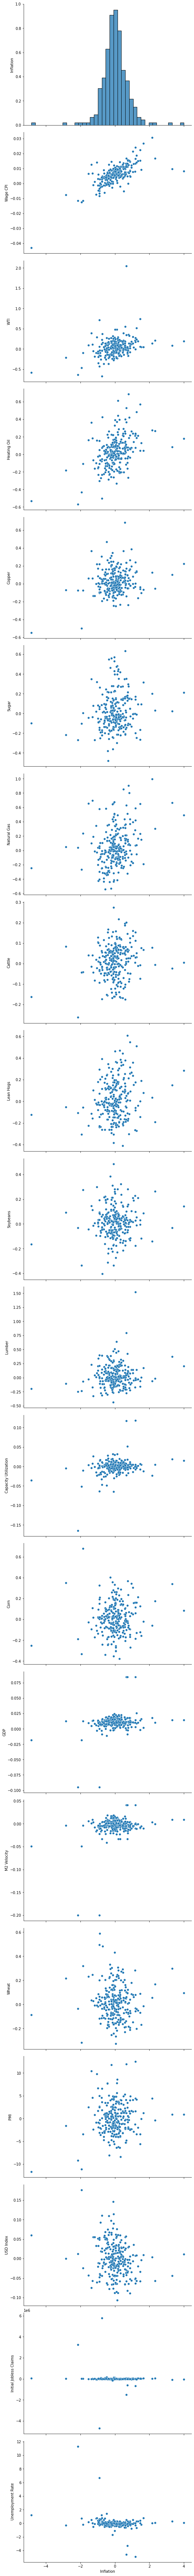

In [88]:
sns.pairplot(QonQ_main,
            y_vars=['Inflation','Wage CPI','WTI','Heating Oil','Copper',
                'Sugar','Natural Gas','Cattle','Lean Hogs','Soybeans',
                'Lumber','Capacity Utilization','Corn','GDP','M2 Velocity',
                'Wheat','PMI','USD Index','Initial Jobless Claims','Unemployment Rate'], 
             x_vars=['Inflation'],
             height=5, aspect=1.5,
            )

We can see a **notable amount of variation** in `Inflation` on all variables. We will take a look at how this comes out on a histogram.

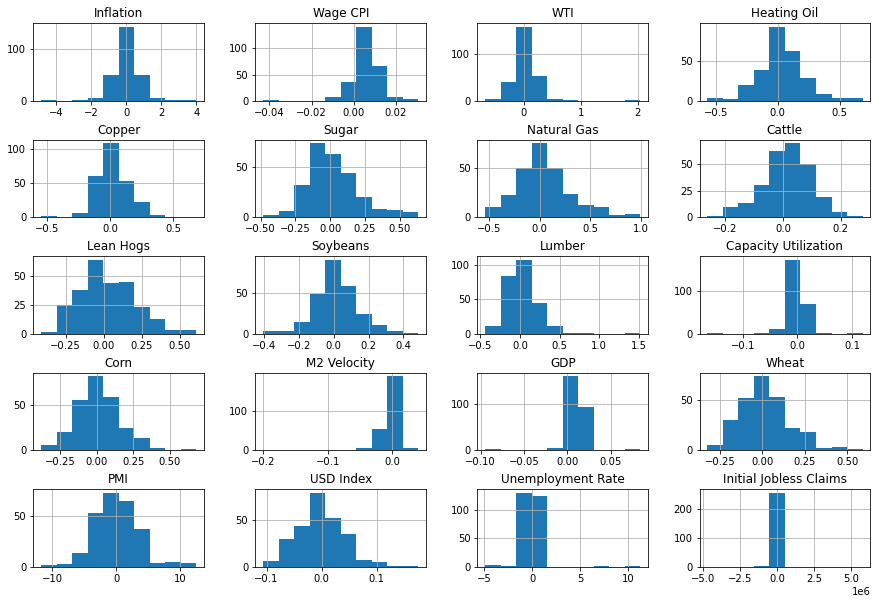

In [89]:
QonQ_main.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

Text(0, 0.5, 'Count')

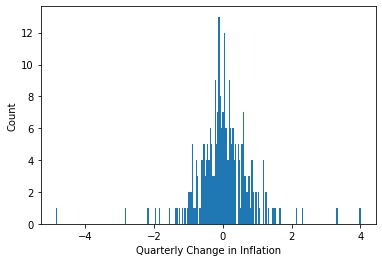

In [90]:
plt.hist(QonQ_main['Inflation'], bins=240)
plt.xlabel('Quarterly Change in Inflation')
plt.ylabel('Count')

It may appear that we scrape anything ± 300 bps

In [91]:
cpi_comp = np.abs(stats.zscore(QonQ_main['Inflation']))
threshold = 3
print(np.where( cpi_comp > threshold ))

(array([137, 156, 163, 164], dtype=int64),)


In [92]:
QonQ_main['Inflation'][137], QonQ_main['Inflation'][156], QonQ_main['Inflation'][163],QonQ_main['Inflation'][164]

(-2.84, -4.846, 3.322, 4.007)

We will pull ~3 off ( -4.846, 3.322, 4.007 )

In [93]:
droprows = [156, 163, 164]
QonQ_main.drop(QonQ_main.index[droprows], inplace=True)

Text(0, 0.5, 'Count')

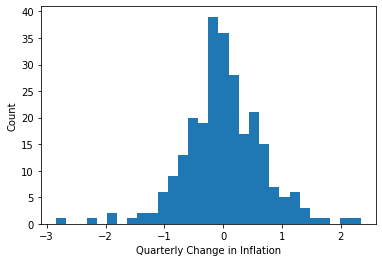

In [94]:
plt.hist(QonQ_main['Inflation'], bins=30)
plt.xlabel('Quarterly Change in Inflation')
plt.ylabel('Count')

After removing the outliers of Inflation, let's see how the pair plots & histograms hold up.

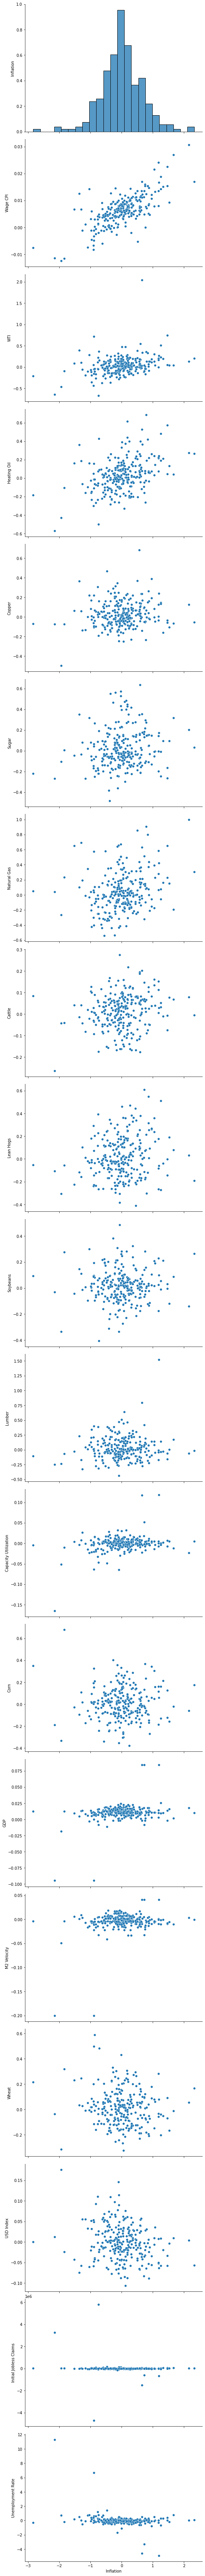

In [95]:
sns.pairplot(QonQ_main,
            y_vars=['Inflation','Wage CPI','WTI','Heating Oil','Copper',
                'Sugar','Natural Gas','Cattle','Lean Hogs','Soybeans',
                'Lumber','Capacity Utilization','Corn','GDP','M2 Velocity',
                'Wheat','USD Index','Initial Jobless Claims','Unemployment Rate'], 
             x_vars=['Inflation'],
             height=5, aspect=1.5,
            )

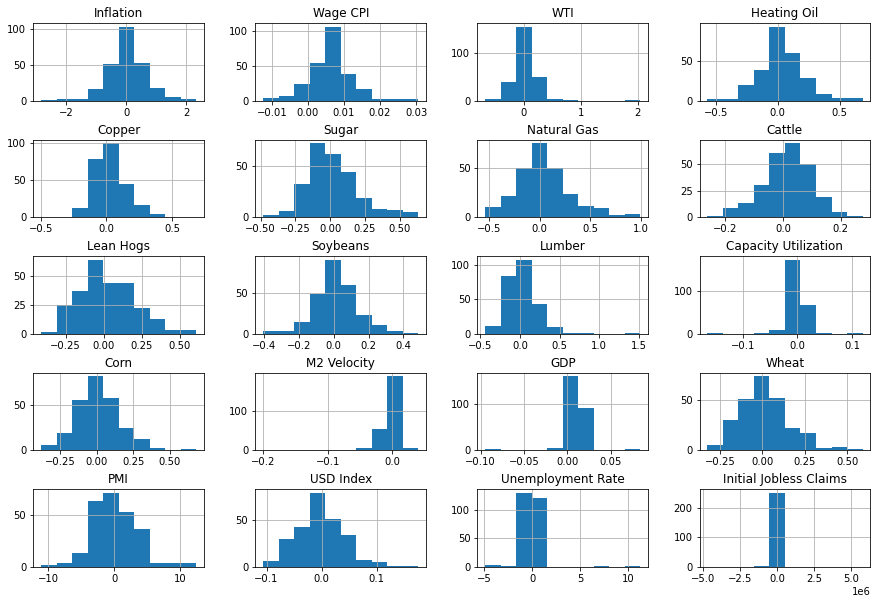

In [96]:
QonQ_main.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

In [97]:
QonQ_main.corr(method='pearson')

Inflation  Wage CPI       WTI  Heating Oil    Copper  \
Inflation                1.000000  0.717216  0.328848     0.409573  0.110672   
Wage CPI                 0.717216  1.000000  0.380789     0.474850  0.239352   
WTI                      0.328848  0.380789  1.000000     0.794573  0.400984   
Heating Oil              0.409573  0.474850  0.794573     1.000000  0.384324   
Copper                   0.110672  0.239352  0.400984     0.384324  1.000000   
Sugar                    0.137814  0.190395  0.173754     0.160520  0.247216   
Natural Gas              0.247455  0.308545  0.241065     0.407950  0.057119   
Cattle                   0.152794  0.161839  0.138354     0.131295  0.090077   
Lean Hogs                0.159272  0.112119  0.122491     0.081926  0.133928   
Soybeans                 0.014865  0.105059  0.137678     0.154129  0.187045   
Lumber                   0.071112  0.072600  0.272362     0.123895  0.187160   
Capacity Utilization     0.255882  0.211893  0.410200     0.352932  0.216057   
Corn                    -0.007189  0.018129  0.017133     0.028937  0.077981   
M2 Velocity              0.216429  0.270064  0.157497     0.212493  0.096918   
GDP                      0.259077  0.257727  0.277955     0.232192  0.118827   
Wheat                   -0.119833 -0.035993 -0.026326    -0.014043  0.064551   
PMI                      0.067877  0.158221  0.374433     0.302393  0.435414   
USD Index               -0.211657 -0.286436 -0.260098    -0.299365 -0.342119   
Unemployment Rate       -0.279514 -0.224650 -0.253326    -0.243522 -0.072412   
Initial Jobless Claims  -0.099795 -0.095125 -0.435107    -0.278484 -0.173690   

                           Sugar  Natural Gas    Cattle  Lean Hogs  Soybeans  \
Inflation               0.137814     0.247455  0.152794   0.159272  0.014865   
Wage CPI                0.190395     0.308545  0.161839   0.112119  0.105059   
WTI                     0.173754     0.241065  0.138354   0.122491  0.137678   
Heating Oil             0.160520     0.407950  0.131295   0.081926  0.154129   
Copper                  0.247216     0.057119  0.090077   0.133928  0.187045   
Sugar                   1.000000     0.144447  0.023798  -0.095301  0.130217   
Natural Gas             0.144447     1.000000  0.010075   0.006306  0.050754   
Cattle                  0.023798     0.010075  1.000000   0.176824  0.078198   
Lean Hogs              -0.095301     0.006306  0.176824   1.000000  0.200164   
Soybeans                0.130217     0.050754  0.078198   0.200164  1.000000   
Lumber                  0.081197    -0.097632  0.193216   0.159484  0.194004   
Capacity Utilization    0.178049     0.110981  0.307765   0.140729  0.130602   
Corn                    0.073123     0.048200  0.023162   0.232805  0.714023   
M2 Velocity             0.103814     0.071340  0.190387   0.105054  0.025592   
GDP                     0.122385     0.091841  0.237114   0.162062  0.043633   
Wheat                   0.083520    -0.012846  0.009182   0.018568  0.437281   
PMI                     0.144197     0.017420  0.165426   0.104945  0.131851   
USD Index              -0.139390    -0.233146 -0.039829   0.047177 -0.140034   
Unemployment Rate      -0.117500    -0.064826 -0.279535  -0.131824 -0.060712   
Initial Jobless Claims -0.128366    -0.051899 -0.177211  -0.050035 -0.054024   

                          Lumber  Capacity Utilization      Corn  M2 Velocity  \
Inflation               0.071112              0.255882 -0.007189     0.216429   
Wage CPI                0.072600              0.211893  0.018129     0.270064   
WTI                     0.272362              0.410200  0.017133     0.157497   
Heating Oil             0.123895              0.352932  0.028937     0.212493   
Copper                  0.187160              0.216057  0.077981     0.096918   
Sugar                   0.081197              0.178049  0.073123     0.103814   
Natural Gas            -0.097632              0.110981  0.048200     0.071340   
Cattle        

{'whiskers': [<matplotlib.lines.Line2D at 0x29fc65d22e0>,
 'caps': [<matplotlib.lines.Line2D at 0x29fc6d6c6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29fc6d209d0>],
 'medians': [<matplotlib.lines.Line2D at 0x29fc6b21b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x29fc6d6b4c0>],
 'means': []}

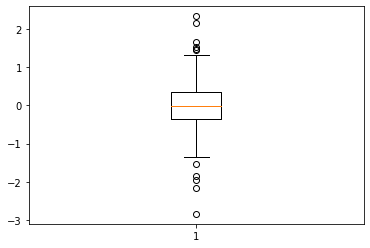

In [98]:
plt.boxplot(QonQ_main['Inflation'])

Text(0.5, 1.0, 'Quarter on Quarter Comparison')

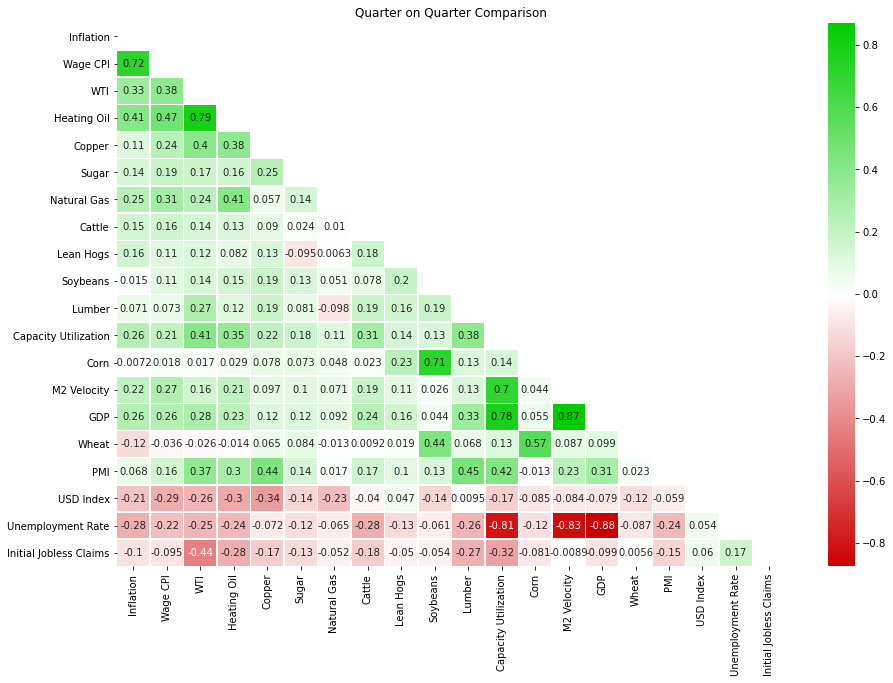

In [99]:
plt.subplots(figsize=(15,10))
matrix = np.triu(QonQ_main.corr())
sns.heatmap(QonQ_main.corr(), mask=matrix, linewidths=.5, cmap=GnRd, annot=True)
plt.title('Quarter on Quarter Comparison')

In [ ]:
QonQ_main = QonQ_main.sort_values(by="Date", ascending=True)
QonQ_main_csv = pd.DataFrame(QonQ_main)

QonQ_main_csv.to_excel('./_Capstone_One_Inflation/data/1.0_Segmented_by_periods/QonQ_main.xlsx')
print('Finished')

# 1.3.2 Monthly Changes<a id='2.5_Load_The_Ski_Resort_Data'></a>

In 1.3.2 I will be setting up the infrastructure for **comparing monthly changes on all variables** against a **monthly change in inflation** to ascertain if there's any correlation & if so by which variables are more pronounced. 

In [43]:
# ( Complete ) Daily | USD & WTI 
M_usd_index = usd_index['Settle'].pct_change(periods=30)
M_wti = wti['Last'].pct_change(periods=30)
M_copper = copper['Close'].pct_change(periods=30)
M_soybeans = soybeans['Close'].pct_change(periods=30)
M_natgas = natgas['Close'].pct_change(periods=30)
M_heatoil = heatoil['Close'].pct_change(periods=30)
M_corn = corn['Close'].pct_change(periods=30)
M_wheat = wheat['Close'].pct_change(periods=30)
M_cattle = cattle['Close'].pct_change(periods=30)
M_sugar = sugar['Close'].pct_change(periods=30)
M_lumber = lumber['Close'].pct_change(periods=30)
M_leanhogs = leanhogs['Close'].pct_change(periods=30)

# ( Complete ) Weekly | Initial Jobless Claims
M_intjobs = int_job_claims.diff(periods=4)

# ( Complete ) Mnthly | Capacity Utilization, Wages, Inflation
M_caputil = cap_util.pct_change(periods=1)
M_wages = wages_cpi.pct_change(periods=1)
M_cpi = cpi.diff(periods=1)
M_unrate = unrate.diff(periods=1)
M_pmi = comppmi.diff(periods=3)


# ( Complete ) Quarterly | GDP, Velocity of Money
# M_gdp = us_gdp.pct_change(periods=1)
# M_m2_velo = m2_velo.pct_change(periods=1)

In [101]:
# Building out the variables first with a forward fill
MonM_vars = pd.concat([M_wages,M_wti,M_heatoil,M_copper,M_sugar,M_natgas,
                       M_cattle,M_leanhogs,M_soybeans,M_lumber,M_caputil,M_corn,
                       M_wheat,M_pmi,M_usd_index,M_unrate,M_intjobs],
                      axis = 1, ignore_index=False)

MonM_vars.columns= ['Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims'
                   ]

MonM_vars.index.names = ["Date"]
MonM_vars = MonM_vars.fillna(method='ffill')

# vars_mnth.tail()

In [102]:
MonM_vars.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14179 entries, 1947-01-01 to 2021-05-07
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Wage CPI                14178 non-null  float64
 1   WTI                     12091 non-null  float64
 2   Heating Oil             13091 non-null  float64
 3   Copper                  10446 non-null  float64
 4   Sugar                   13093 non-null  float64
 5   Natural Gas             9922 non-null   float64
 6   Cattle                  13088 non-null  float64
 7   Lean Hogs               13093 non-null  float64
 8   Soybeans                10003 non-null  float64
 9   Lumber                  13093 non-null  float64
 10  Capacity Utilization    13934 non-null  float64
 11  Corn                    13090 non-null  float64
 12  Wheat                   10003 non-null  float64
 13  PMI                     14164 non-null  float64
 14  USD Index            

In [103]:
# As before, working backwards off of Natural Gas to bring the data together
# MonM_vars['Natural Gas'].tail(8302)

MonM_vars = MonM_vars.loc['1990-05-17':today_y_m_d_dash]

In [104]:
MonM_vars.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9922 entries, 1990-05-17 to 2021-05-07
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Wage CPI                9922 non-null   float64
 1   WTI                     9922 non-null   float64
 2   Heating Oil             9922 non-null   float64
 3   Copper                  9922 non-null   float64
 4   Sugar                   9922 non-null   float64
 5   Natural Gas             9922 non-null   float64
 6   Cattle                  9922 non-null   float64
 7   Lean Hogs               9922 non-null   float64
 8   Soybeans                9922 non-null   float64
 9   Lumber                  9922 non-null   float64
 10  Capacity Utilization    9922 non-null   float64
 11  Corn                    9922 non-null   float64
 12  Wheat                   9922 non-null   float64
 13  PMI                     9922 non-null   float64
 14  USD Index             

In [105]:
# Putting them together with inflation
MonM_main = M_cpi.merge(MonM_vars, how='left', on='Date')

MonM_main = MonM_main[MonM_main.index.dayofweek < 5]

MonM_main.columns = ['Inflation','Wage CPI','WTI','Heating Oil','Copper','Sugar',
                    'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber','Capacity Utilization',
                    'Corn','Wheat','PMI','USD Index','Initial Jobless Claims','Unemployment Rate'
                    ]

MonM_main = MonM_main.dropna()

In [106]:
MonM_main.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 1990-05-31 to 2021-03-31
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Inflation               261 non-null    float64
 1   Wage CPI                261 non-null    float64
 2   WTI                     261 non-null    float64
 3   Heating Oil             261 non-null    float64
 4   Copper                  261 non-null    float64
 5   Sugar                   261 non-null    float64
 6   Natural Gas             261 non-null    float64
 7   Cattle                  261 non-null    float64
 8   Lean Hogs               261 non-null    float64
 9   Soybeans                261 non-null    float64
 10  Lumber                  261 non-null    float64
 11  Capacity Utilization    261 non-null    float64
 12  Corn                    261 non-null    float64
 13  Wheat                   261 non-null    float64
 14  PMI                    

# 1.3.2.2 Cleaning the M on M Dataframe for outliers 

Here I begin to determine where outliers are:

In [107]:
MonM_main.corr(method='pearson')

Inflation  Wage CPI       WTI  Heating Oil    Copper  \
Inflation                1.000000  0.713537  0.284475     0.299412  0.119644   
Wage CPI                 0.713537  1.000000  0.359582     0.381245  0.207709   
WTI                      0.284475  0.359582  1.000000     0.827998  0.383105   
Heating Oil              0.299412  0.381245  0.827998     1.000000  0.341404   
Copper                   0.119644  0.207709  0.383105     0.341404  1.000000   
Sugar                    0.133467  0.132109  0.113332     0.105321  0.196593   
Natural Gas              0.129861  0.139998  0.230771     0.318043  0.002389   
Cattle                   0.031803  0.084167  0.083864     0.075859  0.127613   
Lean Hogs                0.062537  0.014011  0.063922     0.020248  0.150802   
Soybeans                 0.083219  0.083808  0.122867     0.138378  0.242515   
Lumber                   0.184459  0.150711  0.160003     0.094276  0.193519   
Capacity Utilization     0.257531  0.235607  0.201837     0.217094  0.091832   
Corn                     0.056407 -0.000512  0.051259     0.061492  0.101297   
Wheat                   -0.057170 -0.017771 -0.035230     0.023726  0.055074   
PMI                      0.181528  0.247266  0.231091     0.239873  0.352183   
USD Index               -0.107618 -0.169225 -0.267989    -0.188582 -0.268134   
Initial Jobless Claims  -0.262630 -0.252722 -0.137412    -0.169631 -0.011983   
Unemployment Rate       -0.044460 -0.022668 -0.257789    -0.142418 -0.135973   

                           Sugar  Natural Gas    Cattle  Lean Hogs  Soybeans  \
Inflation               0.133467     0.129861  0.031803   0.062537  0.083219   
Wage CPI                0.132109     0.139998  0.084167   0.014011  0.083808   
WTI                     0.113332     0.230771  0.083864   0.063922  0.122867   
Heating Oil             0.105321     0.318043  0.075859   0.020248  0.138378   
Copper                  0.196593     0.002389  0.127613   0.150802  0.242515   
Sugar                   1.000000     0.084399  0.073837  -0.045070  0.155912   
Natural Gas             0.084399     1.000000 -0.054331   0.056970  0.048828   
Cattle                  0.073837    -0.054331  1.000000   0.184115  0.093094   
Lean Hogs              -0.045070     0.056970  0.184115   1.000000  0.165165   
Soybeans                0.155912     0.048828  0.093094   0.165165  1.000000   
Lumber                  0.029471    -0.048217  0.143384   0.065615  0.153126   
Capacity Utilization    0.103662    -0.007722  0.118906   0.028264  0.077742   
Corn                    0.099036     0.067428 -0.031898   0.131430  0.670723   
Wheat                   0.101752     0.025544  0.031522   0.027484  0.422587   
PMI                     0.078660     0.067477  0.114306   0.037282  0.087947   
USD Index              -0.088054    -0.138125 -0.020000   0.018012 -0.144412   
Initial Jobless Claims -0.040892     0.022482 -0.069370  -0.035718 -0.067962   
Unemployment Rate      -0.160665    -0.079946 -0.139733  -0.092505  0.004810   

                          Lumber  Capacity Utilization      Corn     Wheat  \
Inflation               0.184459              0.257531  0.056407 -0.057170   
Wage CPI                0.150711              0.235607 -0.000512 -0.017771   
WTI                     0.160003              0.201837  0.051259 -0.035230   
Heating Oil             0.094276              0.217094  0.061492  0.023726   
Copper                  0.193519              0.091832  0.101297  0.055074   
Sugar                   0.029471              0.103662  0.099036  0.101752   
Natural Gas            -0.048217             -0.007722  0.067428  0.025544   
Cattle                  0.143384              0.118906 -0.031898  0.031522   
Lean Hogs               0.065615              0.028264  0.131430  0.027484   
Soybeans                0.153126              0.077742  0.670723  0.422587   
Lumber                  1.000000              0.209532  0.085422  0.062667   
Capacity Utilization    0.209532              

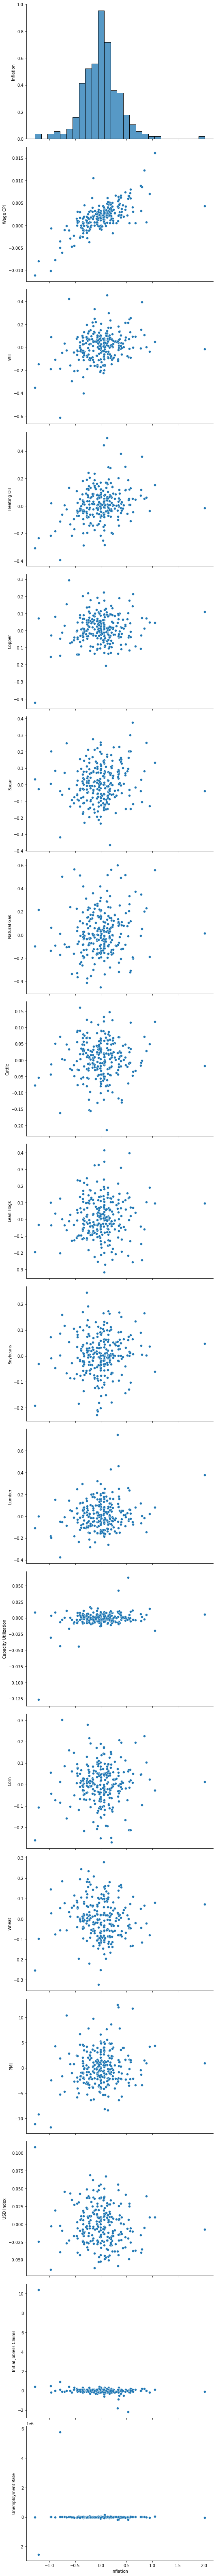

In [108]:
sns.pairplot(MonM_main,
            y_vars=['Inflation','Wage CPI','WTI','Heating Oil','Copper','Sugar',
                    'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber','Capacity Utilization',
                    'Corn','Wheat','PMI','USD Index','Initial Jobless Claims','Unemployment Rate'], 
             x_vars=['Inflation'],
             height=5, aspect=1.5,
            )

In [ ]:
MonM_main.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

We see **"some" amount of variation** in `Inflation` on all variables. We will take a look at how this comes out on a histogram again.

In [ ]:
plt.hist(MonM_main['Inflation'], bins=30)
plt.xlabel('Monthly Change in Inflation')
plt.ylabel('Count')

**There doesn't seem to be as much variation here as well.** Let's take a look at what those numbers are.

In [ ]:
print('Min # is:', MonM_main['Inflation'].min(), 'Max # is:', MonM_main['Inflation'].max())

Based on this, I will choose to remove the data point ~2

In [ ]:
cpi_check = np.abs(stats.zscore(MonM_main['Inflation']))
threshold = 3
print(np.where(cpi_check > threshold))

In [109]:
MonM_main['Inflation'][156],MonM_main['Inflation'][164],MonM_main['Inflation'][253]

(-1.2820000000000005, 2.021, -1.21)

In [110]:
droprow = [164]
MonM_main.drop(MonM_main.index[droprow], inplace=True)

Checking the pair plots & histogram once more.

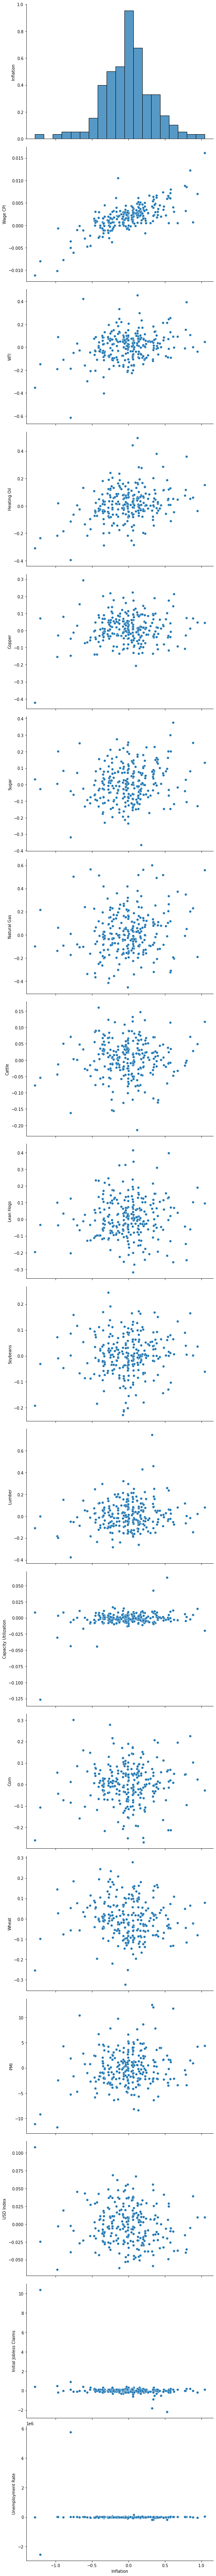

In [111]:
sns.pairplot(MonM_main,
            y_vars=['Inflation','Wage CPI','WTI','Heating Oil','Copper','Sugar',
                    'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber','Capacity Utilization',
                    'Corn','Wheat','PMI','USD Index','Initial Jobless Claims','Unemployment Rate'], 
             x_vars=['Inflation'],
             height=5, aspect=1.5,
            )

Text(0, 0.5, 'Probability')

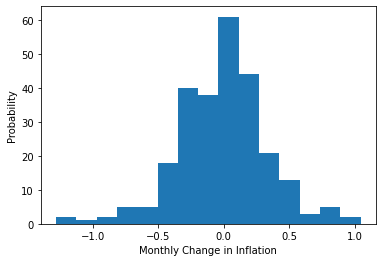

In [112]:
plt.hist(MonM_main['Inflation'], bins=15)
plt.xlabel('Monthly Change in Inflation')
plt.ylabel('Probability')

Not perfectly normal but we will proceed.

In [113]:
MonM_main.corr(method='pearson')

Inflation  Wage CPI       WTI  Heating Oil    Copper  \
Inflation                1.000000  0.741748  0.307621     0.324740  0.100560   
Wage CPI                 0.741748  1.000000  0.360760     0.382641  0.204796   
WTI                      0.307621  0.360760  1.000000     0.827962  0.385229   
Heating Oil              0.324740  0.382641  0.827962     1.000000  0.343674   
Copper                   0.100560  0.204796  0.385229     0.343674  1.000000   
Sugar                    0.151524  0.133638  0.113022     0.104927  0.199160   
Natural Gas              0.139017  0.140297  0.230761     0.318049  0.002575   
Cattle                   0.042658  0.085521  0.083564     0.075478  0.129818   
Lean Hogs                0.050214  0.011771  0.064612     0.021041  0.148007   
Soybeans                 0.076140  0.082238  0.123421     0.139064  0.240774   
Lumber                   0.135183  0.144348  0.164916     0.098760  0.183884   
Capacity Utilization     0.261826  0.234336  0.202436     0.217827  0.089613   
Corn                     0.057814 -0.000817  0.051347     0.061605  0.101129   
Wheat                   -0.077897 -0.020173 -0.034630     0.024555  0.051789   
PMI                      0.187539  0.246833  0.231351     0.240199  0.352054   
USD Index               -0.109132 -0.168713 -0.268246    -0.188882 -0.267806   
Initial Jobless Claims  -0.275639 -0.252535 -0.137575    -0.169842 -0.011245   
Unemployment Rate       -0.044097 -0.022254 -0.257944    -0.142595 -0.135698   

                           Sugar  Natural Gas    Cattle  Lean Hogs  Soybeans  \
Inflation               0.151524     0.139017  0.042658   0.050214  0.076140   
Wage CPI                0.133638     0.140297  0.085521   0.011771  0.082238   
WTI                     0.113022     0.230761  0.083564   0.064612  0.123421   
Heating Oil             0.104927     0.318049  0.075478   0.021041  0.139064   
Copper                  0.199160     0.002575  0.129818   0.148007  0.240774   
Sugar                   1.000000     0.084365  0.073248  -0.043950  0.156955   
Natural Gas             0.084365     1.000000 -0.054405   0.057137  0.048940   
Cattle                  0.073248    -0.054405  1.000000   0.185454  0.094009   
Lean Hogs              -0.043950     0.057137  0.185454   1.000000  0.163883   
Soybeans                0.156955     0.048940  0.094009   0.163883  1.000000   
Lumber                  0.034560    -0.048539  0.149938   0.058724  0.149532   
Capacity Utilization    0.104643    -0.007645  0.119832   0.026780  0.076671   
Corn                    0.099230     0.067444 -0.031761   0.131294  0.670922   
Wheat                   0.103126     0.025686  0.032706   0.025425  0.421692   
PMI                     0.079100     0.067523  0.114727   0.036629  0.087481   
USD Index              -0.088481    -0.138176 -0.020367   0.018699 -0.144006   
Initial Jobless Claims -0.041179     0.022458 -0.069646  -0.035289 -0.067650   
Unemployment Rate      -0.160957    -0.079970 -0.139995  -0.092204  0.005115   

                          Lumber  Capacity Utilization      Corn     Wheat  \
Inflation               0.135183              0.261826  0.057814 -0.077897   
Wage CPI                0.144348              0.234336 -0.000817 -0.020173   
WTI                     0.164916              0.202436  0.051347 -0.034630   
Heating Oil             0.098760              0.217827  0.061605  0.024555   
Copper                  0.183884              0.089613  0.101129  0.051789   
Sugar                   0.034560              0.104643  0.099230  0.103126   
Natural Gas            -0.048539             -0.007645  0.067444  0.025686   
Cattle                  0.149938              0.119832 -0.031761  0.032706   
Lean Hogs               0.058724              0.026780  0.131294  0.025425   
Soybeans                0.149532              0.076671  0.670922  0.421692   
Lumber                  1.000000              0.206915  0.085679  0.055424   
Capacity Utilization    0.206915              

{'whiskers': [<matplotlib.lines.Line2D at 0x29fcf292460>,
 'caps': [<matplotlib.lines.Line2D at 0x29fcf292c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x29fcf2923d0>],
 'medians': [<matplotlib.lines.Line2D at 0x29fcf2bc550>],
 'fliers': [<matplotlib.lines.Line2D at 0x29fcf2bc880>],
 'means': []}

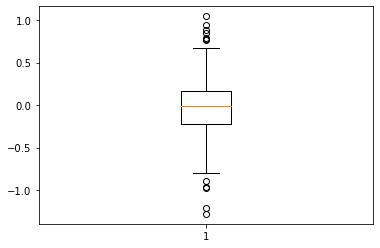

In [114]:
plt.boxplot(MonM_main['Inflation'])

Text(0.5, 1.0, 'Month on Month Comparison')

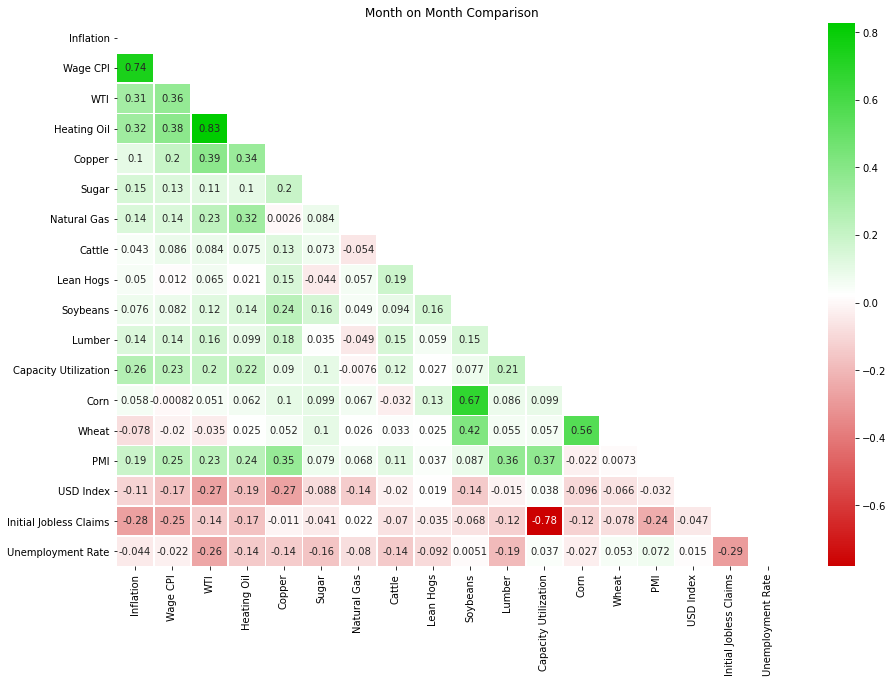

In [115]:
plt.subplots(figsize=(15,10))
matrix = np.triu(MonM_main.corr())
sns.heatmap(MonM_main.corr(), mask=matrix, linewidths=.5, cmap=GnRd, annot=True)
plt.title('Month on Month Comparison')

In [ ]:
MonM_main = MonM_main.sort_values(by="Date", ascending=True)
MonM_main_csv = pd.DataFrame(MonM_main)

MonM_main_csv.to_excel('./_Capstone_One_Inflation/data/1.0_Segmented_by_periods/MonM_main.xlsx')
print('Finished')

# 1.3.3 Quarterly Changes | Variables ( past ) & Inflation ( forwards )<a id='2.5_Load_The_Ski_Resort_Data'></a>

In 1.3.3 I will be setting up the infrastructure to **compare quarterly changes on all variables ( one quarter in the past )** against a **quarterly change in inflation ( one quarter in the future )** to ascertain if there's any relationship to **predict** `Inflation` one quarter in advance.  

In [116]:
# ( Complete ) Daily | USD & WTI | removed 24 days from 90 ( i.e. weekends ) but doesn't include holidays
Q_usd_index = usd_index['Settle'].pct_change(periods=66)
Q_wti = wti['Last'].pct_change(periods=66)

Q_copper = copper['Close'].pct_change(periods=66)
Q_soybeans = soybeans['Close'].pct_change(periods=66)
Q_natgas = natgas['Close'].pct_change(periods=66)
Q_heatoil = heatoil['Close'].pct_change(periods=66)
Q_corn = corn['Close'].pct_change(periods=66)
Q_wheat = wheat['Close'].pct_change(periods=66)
Q_cattle = cattle['Close'].pct_change(periods=66)
Q_sugar = sugar['Close'].pct_change(periods=66)
Q_lumber = lumber['Close'].pct_change(periods=66)
Q_leanhogs = leanhogs['Close'].pct_change(periods=66)

# ( Complete ) Weekly | Initial Jobless Claims
Q_intjobs = int_job_claims.diff(periods=12)

# ( Complete ) Mnthly | Capacity Utilization, Wages, Inflation
Q_caputil = cap_util.pct_change(periods=3)
Q_wages = wages_cpi.pct_change(periods=3)
Q_cpi_past = cpi.diff(periods=-3)
Q_unrate = unrate.diff(periods=3)

# ( Complete ) Quarterly | GDP, Velocity of Money
Q_gdp = gdp.pct_change(periods=1)
Q_m2_velo = m2_velo.pct_change(periods=1)

Checking to see if the `Inflation` function works as I intend 

In [117]:
# To compare what the function is returning
Q_cpi_past.tail(5)

Value
Date             
2020-11-30 -0.501
2020-12-31 -1.258
2021-01-31    NaN
2021-02-28    NaN
2021-03-31    NaN

In [118]:
# I start with the actual data
cpi.tail(10)

Value
Date             
2020-06-30  0.646
2020-07-31  0.986
2020-08-31  1.310
2020-09-30  1.371
2020-10-31  1.182
2020-11-30  1.175
2020-12-31  1.362
2021-01-31  1.400
2021-02-28  1.676
2021-03-31  2.620

In [119]:
print('The 31 Jan 2021 # of 1.4 minus 3 months before ( 2020-10-31 ) show: ', round((1.400-1.182),3) )

The 31 Jan 2021 # of 1.4 minus 3 months before ( 2020-10-31 ) show:  0.218


This **appears to be incorrect,** meaning it should be a positive number but shows a negative number in the `Q_cpi_p` tail. **Let's check the one behind to see what that shows.**

In [120]:
print('The 31 Dec 2020 # of 1.362 minus 3 months before ( 30 Sept 2020 ) show: ', round((1.362-1.371),3) )

The 31 Dec 2020 # of 1.362 minus 3 months before ( 30 Sept 2020 ) show:  -0.009


This shows a negative number while the function shows a positive. It appears as though the function need to be multiplied by -1 to show the correct #. 

**We will change the** `Q_cpi_p` **# below.**

In [121]:
Q_cpi_past = cpi.diff(periods=-3) * -1

Double check:

In [122]:
Q_cpi_past.tail(5)

Value
Date             
2020-11-30  0.501
2020-12-31  1.258
2021-01-31    NaN
2021-02-28    NaN
2021-03-31    NaN

We have "righted the wrong"; ready to proceed.

In [125]:
# Putting them together with inflation
QonQ_main_cpi_past = Q_cpi_past.merge(QonQ_vars, how='left', on='Date')

# QonQ_main_cpi_past= QonQ_main_cpi_past[QonQ_main_cpi_past.index.dayofweek < 5]

QonQ_main_cpi_past.columns = ['Inflation','Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']

QonQ_main_cpi_past = QonQ_main_cpi_past.dropna()

In [126]:
QonQ_main_cpi_past.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 1990-07-31 to 2020-12-31
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Inflation               259 non-null    float64
 1   Wage CPI                259 non-null    float64
 2   WTI                     259 non-null    float64
 3   Heating Oil             259 non-null    float64
 4   Copper                  259 non-null    float64
 5   Sugar                   259 non-null    float64
 6   Natural Gas             259 non-null    float64
 7   Cattle                  259 non-null    float64
 8   Lean Hogs               259 non-null    float64
 9   Soybeans                259 non-null    float64
 10  Lumber                  259 non-null    float64
 11  Capacity Utilization    259 non-null    float64
 12  Corn                    259 non-null    float64
 13  M2 Velocity             259 non-null    float64
 14  GDP                    

# 1.3.3.2 Cleaning the Variable ( past ) & Inflation ( forwards ) Dataframe for outliers 

Here's where are will see if this Dataframe needs cleaning for outliers.

In [127]:
QonQ_main_cpi_past.corr(method='pearson')

Inflation  Wage CPI       WTI  Heating Oil    Copper  \
Inflation                1.000000 -0.005976  0.192777     0.229888  0.273644   
Wage CPI                -0.005976  1.000000  0.410007     0.501180  0.325551   
WTI                      0.192777  0.410007  1.000000     0.801081  0.426468   
Heating Oil              0.229888  0.501180  0.801081     1.000000  0.415934   
Copper                   0.273644  0.325551  0.426468     0.415934  1.000000   
Sugar                    0.207196  0.188646  0.180981     0.168726  0.253993   
Natural Gas              0.102792  0.306431  0.250957     0.413910  0.085801   
Cattle                  -0.035378  0.201202  0.155744     0.151078  0.117379   
Lean Hogs               -0.008476  0.114211  0.125411     0.087197  0.144622   
Soybeans                 0.217855  0.134259  0.151827     0.169757  0.206405   
Lumber                   0.070388  0.099173  0.279960     0.137156  0.203675   
Capacity Utilization     0.184842  0.241213  0.422988     0.368646  0.241337   
Corn                     0.181221  0.068254  0.035082     0.050132  0.106855   
M2 Velocity              0.035498  0.304911  0.180544     0.236858  0.133612   
GDP                      0.031840  0.285192  0.292245     0.249719  0.146940   
Wheat                    0.102228 -0.003795 -0.013760     0.000361  0.081463   
PMI                      0.127309  0.229624  0.394224     0.328132  0.462609   
USD Index               -0.238233 -0.295176 -0.270599    -0.309808 -0.350941   
Unemployment Rate       -0.011585 -0.229621 -0.259232    -0.250005 -0.085750   
Initial Jobless Claims  -0.072367 -0.086510 -0.429866    -0.274413 -0.169310   

                           Sugar  Natural Gas    Cattle  Lean Hogs  Soybeans  \
Inflation               0.207196     0.102792 -0.035378  -0.008476  0.217855   
Wage CPI                0.188646     0.306431  0.201202   0.114211  0.134259   
WTI                     0.180981     0.250957  0.155744   0.125411  0.151827   
Heating Oil             0.168726     0.413910  0.151078   0.087197  0.169757   
Copper                  0.253993     0.085801  0.117379   0.144622  0.206405   
Sugar                   1.000000     0.151139  0.028733  -0.086056  0.136992   
Natural Gas             0.151139     1.000000  0.014256   0.024580  0.058874   
Cattle                  0.028733     0.014256  1.000000   0.176569  0.088762   
Lean Hogs              -0.086056     0.024580  0.176569   1.000000  0.206747   
Soybeans                0.136992     0.058874  0.088762   0.206747  1.000000   
Lumber                  0.087038    -0.069464  0.195019   0.166738  0.197829   
Capacity Utilization    0.183410     0.129104  0.315371   0.155061  0.140426   
Corn                    0.079037     0.076932  0.031375   0.235239  0.707076   
M2 Velocity             0.110153     0.087995  0.204455   0.120427  0.039539   
GDP                     0.128217     0.102126  0.248643   0.159755  0.054599   
Wheat                   0.086394     0.011927  0.012129   0.033494  0.434461   
PMI                     0.151020     0.034196  0.185397   0.103924  0.146439   
USD Index              -0.140455    -0.240761 -0.049553   0.039408 -0.143919   
Unemployment Rate      -0.119909    -0.064945 -0.285768  -0.127586 -0.066285   
Initial Jobless Claims -0.128831    -0.053693 -0.175818  -0.050778 -0.054335   

                          Lumber  Capacity Utilization      Corn  M2 Velocity  \
Inflation               0.070388              0.184842  0.181221     0.035498   
Wage CPI                0.099173              0.241213  0.068254     0.304911   
WTI                     0.279960              0.422988  0.035082     0.180544   
Heating Oil             0.137156              0.368646  0.050132     0.236858   
Copper                  0.203675              0.241337  0.106855     0.133612   
Sugar                   0.087038              0.183410  0.079037     0.110153   
Natural Gas            -0.069464              0.129104  0.076932     0.087995   
Cattle        

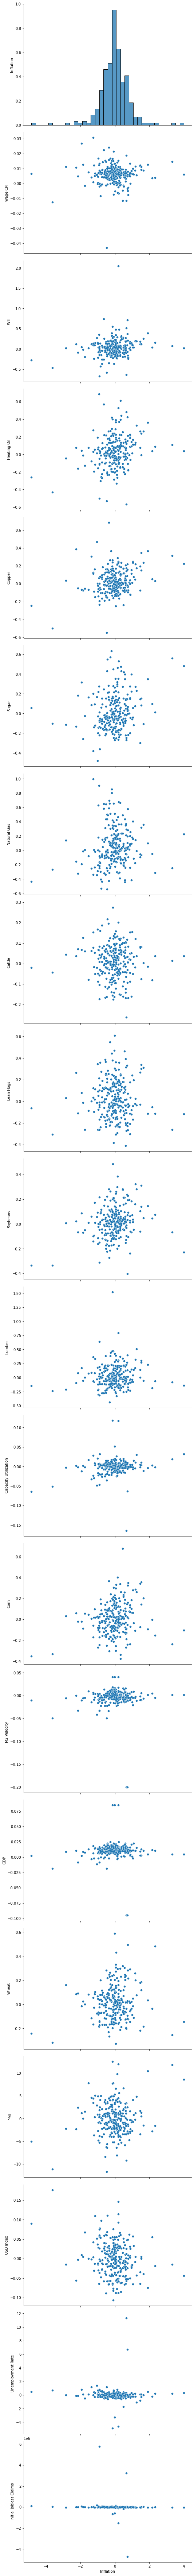

In [128]:
sns.pairplot(QonQ_main_cpi_past,
            y_vars = ['Inflation','Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims'],
            x_vars = ['Inflation'],
             height=5, aspect=1.5,
            )

Let's check this out on a histogram

Text(0, 0.5, 'Probability')

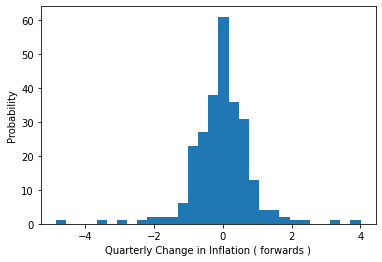

In [129]:
plt.hist(QonQ_main_cpi_past['Inflation'], bins=30)
plt.xlabel('Quarterly Change in Inflation ( forwards )')
plt.ylabel('Probability')

Noticeable outliers; let's check where they are.

In [130]:
cpi_outliers = np.abs(stats.zscore(QonQ_main_cpi_past['Inflation']))
threshold = 3
print(np.where(cpi_outliers >= threshold ))

(array([135, 154, 155, 161, 162], dtype=int64),)


In [131]:
QonQ_main_cpi_past['Inflation'][135],QonQ_main_cpi_past['Inflation'][154],QonQ_main_cpi_past['Inflation'][155],QonQ_main_cpi_past['Inflation'][161],QonQ_main_cpi_past['Inflation'][162]

(-2.84, -4.846, -3.625, 3.322, 4.007)

We will scrape all 5 representing 1.9% of the dataframe.

In [132]:
rows_to_drop = [135, 154, 155, 161, 162]
QonQ_main_cpi_past.drop(QonQ_main_cpi_past.index[rows_to_drop], inplace=True)

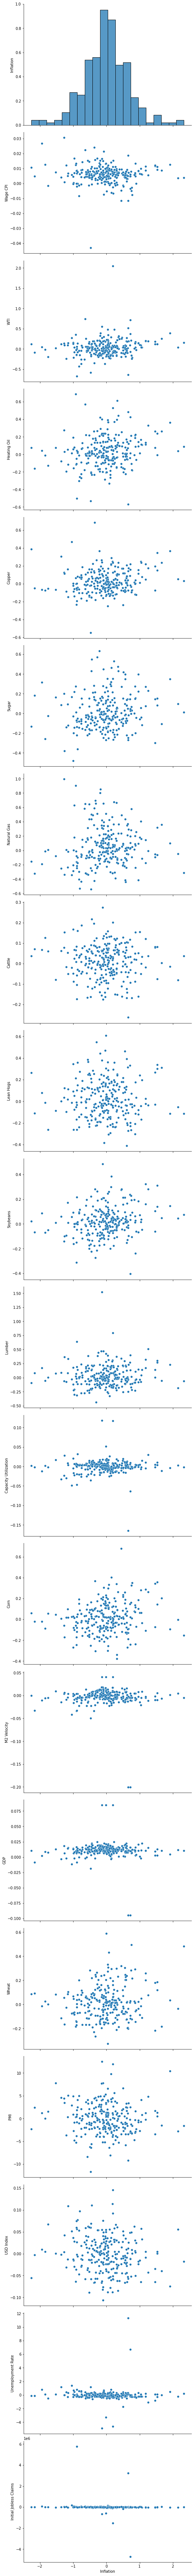

In [133]:
sns.pairplot(QonQ_main_cpi_past,
            y_vars = ['Inflation','Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims'],
            x_vars = ['Inflation'],
             height=5, aspect=1.5,
            )

In [ ]:
plt.hist(QonQ_main_cpi_past['Inflation'], bins=30)
plt.xlabel('Quarterly Change in Inflation ( forwards )')
plt.ylabel('Probability')

In [134]:
QonQ_main_cpi_past.corr(method='pearson')

Inflation  Wage CPI       WTI  Heating Oil    Copper  \
Inflation                1.000000 -0.078771  0.158390     0.180063  0.148539   
Wage CPI                -0.078771  1.000000  0.398407     0.491323  0.293190   
WTI                      0.158390  0.398407  1.000000     0.795155  0.407028   
Heating Oil              0.180063  0.491323  0.795155     1.000000  0.387828   
Copper                   0.148539  0.293190  0.407028     0.387828  1.000000   
Sugar                    0.132407  0.177799  0.183196     0.165222  0.225923   
Natural Gas              0.068245  0.308539  0.237982     0.405631  0.063657   
Cattle                  -0.070833  0.197031  0.150381     0.145592  0.108075   
Lean Hogs               -0.012605  0.105386  0.110716     0.071042  0.139915   
Soybeans                 0.204192  0.113954  0.117700     0.132189  0.174579   
Lumber                   0.047545  0.093830  0.269588     0.120588  0.198265   
Capacity Utilization     0.036484  0.222663  0.404608     0.340534  0.177933   
Corn                     0.171571  0.053884  0.002435     0.015135  0.077892   
M2 Velocity             -0.021785  0.288388  0.163138     0.218212  0.101253   
GDP                     -0.005916  0.272765  0.276807     0.231398  0.123840   
Wheat                    0.113172 -0.023828 -0.044497    -0.030833  0.059237   
PMI                     -0.075959  0.195649  0.384914     0.304015  0.408105   
USD Index               -0.141969 -0.264701 -0.237410    -0.272510 -0.293185   
Unemployment Rate        0.003111 -0.228021 -0.254273    -0.245137 -0.078806   
Initial Jobless Claims  -0.083912 -0.087210 -0.434324    -0.277920 -0.174785   

                           Sugar  Natural Gas    Cattle  Lean Hogs  Soybeans  \
Inflation               0.132407     0.068245 -0.070833  -0.012605  0.204192   
Wage CPI                0.177799     0.308539  0.197031   0.105386  0.113954   
WTI                     0.183196     0.237982  0.150381   0.110716  0.117700   
Heating Oil             0.165222     0.405631  0.145592   0.071042  0.132189   
Copper                  0.225923     0.063657  0.108075   0.139915  0.174579   
Sugar                   1.000000     0.164111  0.025927  -0.067292  0.171362   
Natural Gas             0.164111     1.000000  0.007379   0.007984  0.029480   
Cattle                  0.025927     0.007379  1.000000   0.174839  0.083352   
Lean Hogs              -0.067292     0.007984  0.174839   1.000000  0.180694   
Soybeans                0.171362     0.029480  0.083352   0.180694  1.000000   
Lumber                  0.099663    -0.082385  0.195533   0.153378  0.173458   
Capacity Utilization    0.164096     0.100262  0.315283   0.149704  0.099408   
Corn                    0.109310     0.045301  0.023396   0.210120  0.691423   
M2 Velocity             0.104098     0.077689  0.200541   0.108571  0.014160   
GDP                     0.138388     0.089066  0.246119   0.142409  0.019672   
Wheat                   0.124825    -0.018829  0.003631  -0.001737  0.402931   
PMI                     0.088581     0.020433  0.183842   0.115218  0.136762   
USD Index              -0.128772    -0.217943 -0.035870   0.071310 -0.091914   
Unemployment Rate      -0.128179    -0.058842 -0.284562  -0.121200 -0.052114   
Initial Jobless Claims -0.132007    -0.052784 -0.175493  -0.051301 -0.054328   

                          Lumber  Capacity Utilization      Corn  M2 Velocity  \
Inflation               0.047545              0.036484  0.171571    -0.021785   
Wage CPI                0.093830              0.222663  0.053884     0.288388   
WTI                     0.269588              0.404608  0.002435     0.163138   
Heating Oil             0.120588              0.340534  0.015135     0.218212   
Copper                  0.198265              0.177933  0.077892     0.101253   
Sugar                   0.099663              0.164096  0.109310     0.104098   
Natural Gas            -0.082385              0.100262  0.045301     0.077689   
Cattle        

Looks fairly similar to a normal distribution; I will continue as such.

{'whiskers': [<matplotlib.lines.Line2D at 0x29fd3fdcf70>,
 'caps': [<matplotlib.lines.Line2D at 0x29fd4124160>,
 'boxes': [<matplotlib.lines.Line2D at 0x29fd412b910>],
 'medians': [<matplotlib.lines.Line2D at 0x29fd4124e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x29fd41581c0>],
 'means': []}

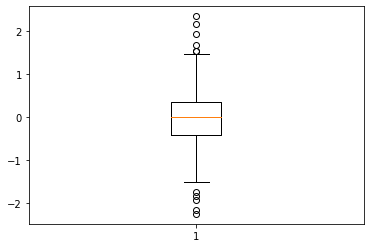

In [135]:
plt.boxplot(QonQ_main_cpi_past['Inflation'])

Text(0.5, 1.0, 'Inflation ( 1 Quarter Forwards ) vs. Variables ( 1 Quarter Backwards)')

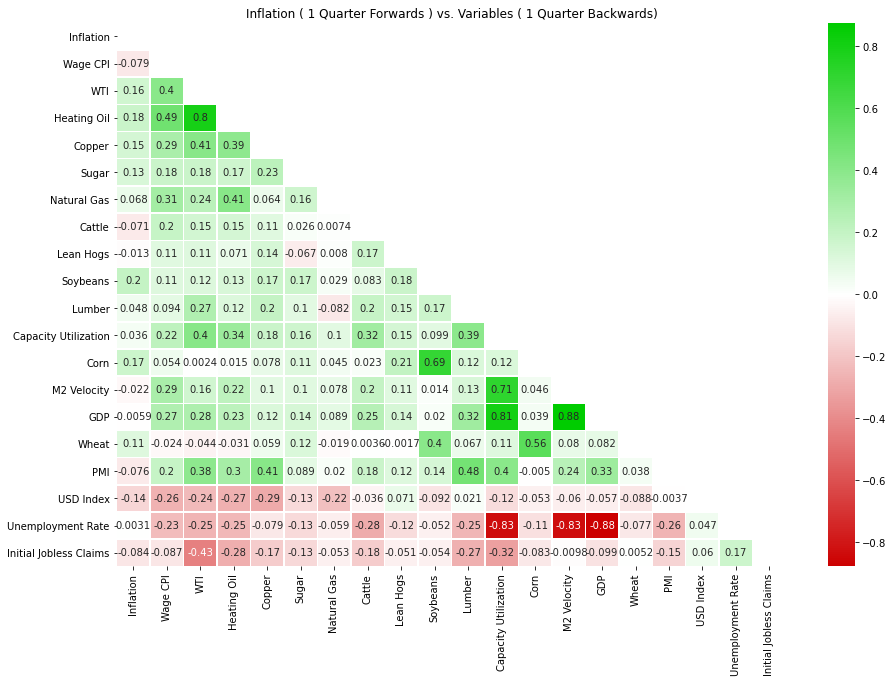

In [136]:
plt.subplots(figsize=(15,10))
matrix = np.triu(QonQ_main_cpi_past.corr())
sns.heatmap(QonQ_main_cpi_past.corr(), mask=matrix, linewidths=.5, cmap=GnRd, annot=True)
plt.title('Inflation ( 1 Quarter Forwards ) vs. Variables ( 1 Quarter Backwards)')

In [ ]:
QonQ_main_cpi_past = QonQ_main_cpi_past.sort_values(by="Date", ascending=True)
QonQ_main_cpi_past_csv = pd.DataFrame(QonQ_main_cpi_past)

QonQ_main_cpi_past_csv.to_excel('./_Capstone_One_Inflation/data/1.0_Segmented_by_periods/QonQ_main_cpi_past.xlsx')
print('Finished')

# 1.3.4   |   Q on Q Comparison w/ Rolling Averages on Daily, Wkly & Mnthly Variables ( w/ Inflation Scraping & no variable scraping )

**This dataframe is being constructed a similar way 1.3.1 was created with the exception that the daily, weekly & monthly variables are taking a rolling average.** The rational with this interest is based on the idea that one of the variables would have had a bad day / week at the end of the term. If so, they may not properly display the impact they may have on inflation.

In [137]:
# ( Complete ) Daily | USD & WTI | removed 24 days from 90 ( i.e. weekends ) but doesn't include holidays
Q_usd_index_roll = Q_usd_index.rolling(66).mean()
Q_wti_roll = Q_wti.rolling(66).mean()

Q_copper_roll = Q_copper.rolling(66).mean()
Q_soybeans_roll = Q_soybeans.rolling(66).mean()
Q_natgas_roll = Q_natgas.rolling(66).mean()
Q_heatoil_roll = Q_heatoil.rolling(66).mean()
Q_corn_roll = Q_corn.rolling(66).mean()
Q_wheat_roll = Q_wheat.rolling(66).mean()
Q_cattle_roll = Q_cattle.rolling(66).mean()
Q_sugar_roll = Q_sugar.rolling(66).mean()
Q_lumber_roll = Q_lumber.rolling(66).mean()
Q_leanhogs_roll = Q_leanhogs.rolling(66).mean()

# ( Complete ) Weekly | Initial Jobless Claims
Q_intjobs_roll = Q_intjobs.rolling(12).mean()

# ( Complete ) Mnthly | Capacity Utilization, Wages, Inflation
Q_caputil_roll = Q_caputil.rolling(3).mean()
Q_wages_roll = Q_wages.rolling(3).mean()
Q_unrate_roll = Q_unrate.rolling(3).mean()
Q_comppmi_roll =Q_comppmi.rolling(3).mean()

Q_cpi = cpi.diff(periods=3)

# ( Complete ) Quarterly | GDP, Velocity of Money
Q_gdp = gdp.pct_change(periods=1)
Q_m2_velo = m2_velo.pct_change(periods=1)

In [138]:
# Building out the variables first with a roll & forward fill
QonQ_vars_roll = pd.concat([Q_wages_roll,Q_wti_roll,Q_heatoil_roll,Q_copper_roll,Q_sugar_roll,
                            Q_natgas_roll,Q_cattle_roll,Q_leanhogs_roll,Q_soybeans_roll,Q_lumber_roll,
                            Q_caputil_roll,Q_corn_roll,Q_m2_velo,Q_gdp,Q_wheat_roll,Q_comppmi_roll,
                            Q_usd_index_roll,Q_unrate_roll,Q_intjobs_roll],
                      axis = 1, ignore_index=False)

QonQ_vars_roll.columns= ['Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims'
                   ]

QonQ_vars_roll.index.names = ["Date"]
QonQ_vars_roll = QonQ_vars_roll.fillna(method='ffill')

# vars_mnth.tail()

In [139]:
QonQ_vars_roll.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14183 entries, 1946-01-01 to 2021-05-07
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Wage CPI                14174 non-null  float64
 1   WTI                     11969 non-null  float64
 2   Heating Oil             12968 non-null  float64
 3   Copper                  10321 non-null  float64
 4   Sugar                   12968 non-null  float64
 5   Natural Gas             9796 non-null   float64
 6   Cattle                  12965 non-null  float64
 7   Lean Hogs               12970 non-null  float64
 8   Soybeans                9880 non-null   float64
 9   Lumber                  12970 non-null  float64
 10  Capacity Utilization    13914 non-null  float64
 11  Corn                    12967 non-null  float64
 12  M2 Velocity             14032 non-null  float64
 13  GDP                     14176 non-null  float64
 14  Wheat                

In [140]:
# As before, working backwards off of Natural Gas to bring the data together
# QonQ_vars_roll['Natural Gas'].tail(9565)

QonQ_vars_roll = QonQ_vars_roll.loc['1991-04-18':today_y_m_d_dash]

In [141]:
QonQ_vars_roll.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9633 entries, 1991-04-18 to 2021-05-07
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Wage CPI                9633 non-null   float64
 1   WTI                     9633 non-null   float64
 2   Heating Oil             9633 non-null   float64
 3   Copper                  9633 non-null   float64
 4   Sugar                   9633 non-null   float64
 5   Natural Gas             9633 non-null   float64
 6   Cattle                  9633 non-null   float64
 7   Lean Hogs               9633 non-null   float64
 8   Soybeans                9633 non-null   float64
 9   Lumber                  9633 non-null   float64
 10  Capacity Utilization    9633 non-null   float64
 11  Corn                    9633 non-null   float64
 12  M2 Velocity             9633 non-null   float64
 13  GDP                     9633 non-null   float64
 14  Wheat                 

In [142]:
QonQ_vars_roll = QonQ_vars_roll.sort_values(by="Date", ascending=False)
QonQ_vars_roll_csv = pd.DataFrame(QonQ_vars_roll)

QonQ_vars_roll_csv.to_excel('./_Capstone_One_Inflation/data/1.0_Segmented_by_periods/QonQ_roll_wout_CPImerge.xlsx')
print('Finished')

Finished


In [143]:
QonQ_vars_roll.describe()

Wage CPI          WTI  Heating Oil       Copper        Sugar  \
count  9633.000000  9633.000000  9633.000000  9633.000000  9633.000000   
mean      0.005515     0.025059     0.022288     0.020502     0.019346   
std       0.005687     0.152328     0.138047     0.119364     0.145402   
min      -0.034864    -0.539073    -0.462821    -0.505766    -0.393969   
25%       0.003931    -0.058506    -0.048390    -0.053042    -0.078617   
50%       0.006276     0.030677     0.020944     0.007002    -0.007340   
75%       0.008171     0.113630     0.107908     0.088883     0.102237   
max       0.023370     0.619696     0.388113     0.530210     0.610680   

       Natural Gas       Cattle    Lean Hogs     Soybeans       Lumber  \
count  9633.000000  9633.000000  9633.000000  9633.000000  9633.000000   
mean      0.034265     0.007620     0.019301     0.015109     0.033444   
std       0.194718     0.067185     0.141076     0.101082     0.160758   
min      -0.398806    -0.215529    -0.331947    -0.359508    -0.319931   
25%      -0.093312    -0.037546    -0.077745    -0.041762    -0.070579   
50%       0.008606     0.012942     0.009772     0.010881     0.020512   
75%       0.162135     0.055722     0.118976     0.069729     0.120631   
max       0.646182     0.256356     0.434222     0.293121     0.933175   

       Capacity Utilization         Corn  M2 Velocity          GDP  \
count           9633.000000  9633.000000  9633.000000  9633.000000   
mean              -0.000263     0.017545    -0.004147     0.010928   
std                0.017871     0.122730     0.022373     0.014104   
min               -0.128528    -0.340215    -0.200145    -0.094662   
25%               -0.004145    -0.052717    -0.007473     0.008557   
50%                0.001860     0.008063    -0.002745     0.011644   
75%                0.006573     0.080742     0.004618     0.015327   
max                0.096035     0.480516     0.040798     0.084535   

             Wheat          PMI    USD Index  Unemployment Rate  \
count  9633.000000  9633.000000  9633.000000        9633.000000   
mean      0.016814     0.181086     0.001533          -0.000055   
std       0.109139     3.007744     0.035262           0.872720   
min      -0.303035   -11.833333    -0.078002          -4.266667   
25%      -0.055196    -1.700000    -0.023525          -0.200000   
50%       0.008138     0.033333     0.001273          -0.100000   
75%       0.077483     1.866667     0.022650           0.066667   
max       0.444586    10.666667     0.120729           9.266667   

       Initial Jobless Claims  
count            9.633000e+03  
mean             3.088775e+03  
std              2.751182e+05  
min             -2.113167e+06  
25%             -1.141667e+04  
50%             -3.416667e+03  
75%              5.416667e+03  
max              3.105333e+06

In [144]:
# PUT IN A BOX PLOT FOR ALL

In [145]:
# PUT IN A SCATTER PLOT ( NOT PAIR PLOT FOR ALL )

In [147]:
# Putting them together with inflation
QonQ_main_roll = Q_cpi.merge(QonQ_vars_roll, how='left', on='Date')

# QonQ_main_roll = QonQ_main_roll[Q_cpi.index.dayofweek < 5]

QonQ_main_roll.columns = ['Inflation','Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims']

QonQ_main_roll = QonQ_main_roll.dropna()

In [148]:
QonQ_main_roll.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 317 entries, 1991-04-30 to 2021-03-31
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Inflation               317 non-null    float64
 1   Wage CPI                317 non-null    float64
 2   WTI                     317 non-null    float64
 3   Heating Oil             317 non-null    float64
 4   Copper                  317 non-null    float64
 5   Sugar                   317 non-null    float64
 6   Natural Gas             317 non-null    float64
 7   Cattle                  317 non-null    float64
 8   Lean Hogs               317 non-null    float64
 9   Soybeans                317 non-null    float64
 10  Lumber                  317 non-null    float64
 11  Capacity Utilization    317 non-null    float64
 12  Corn                    317 non-null    float64
 13  M2 Velocity             317 non-null    float64
 14  GDP                    

# 1.3.4.2 Cleaning the Dataframe for outliers 

In [150]:
QonQ_main_roll.corr(method='pearson')

Inflation  Wage CPI       WTI  Heating Oil    Copper  \
Inflation                1.000000  0.567624  0.525966     0.530277  0.354883   
Wage CPI                 0.567624  1.000000  0.710452     0.726931  0.510510   
WTI                      0.525966  0.710452  1.000000     0.905173  0.564928   
Heating Oil              0.530277  0.726931  0.905173     1.000000  0.543290   
Copper                   0.354883  0.510510  0.564928     0.543290  1.000000   
Sugar                    0.222914  0.232985  0.222753     0.263516  0.298293   
Natural Gas              0.303336  0.403282  0.342880     0.465454  0.169668   
Cattle                   0.151895  0.248921  0.171294     0.227077  0.121802   
Lean Hogs                0.217454  0.242933  0.296165     0.169543  0.190139   
Soybeans                 0.185308  0.245250  0.278671     0.249795  0.262948   
Lumber                   0.188313  0.198741  0.333439     0.215074  0.233156   
Capacity Utilization     0.344571  0.387091  0.479549     0.468664  0.332777   
Corn                     0.255247  0.217403  0.141947     0.134404  0.154522   
M2 Velocity              0.290909  0.338285  0.422210     0.387943  0.262139   
GDP                      0.311592  0.302319  0.467109     0.388746  0.248113   
Wheat                    0.123284  0.143373  0.046643     0.065745  0.153715   
PMI                      0.223416  0.332637  0.482490     0.382470  0.463842   
USD Index               -0.319037 -0.395726 -0.410011    -0.403428 -0.414199   
Unemployment Rate       -0.212892 -0.303321 -0.329494    -0.327318 -0.149512   
Initial Jobless Claims  -0.258247 -0.208078 -0.428096    -0.325632 -0.184965   

                           Sugar  Natural Gas    Cattle  Lean Hogs  Soybeans  \
Inflation               0.222914     0.303336  0.151895   0.217454  0.185308   
Wage CPI                0.232985     0.403282  0.248921   0.242933  0.245250   
WTI                     0.222753     0.342880  0.171294   0.296165  0.278671   
Heating Oil             0.263516     0.465454  0.227077   0.169543  0.249795   
Copper                  0.298293     0.169668  0.121802   0.190139  0.262948   
Sugar                   1.000000     0.233641  0.097576  -0.122711  0.147709   
Natural Gas             0.233641     1.000000  0.142041   0.084801  0.098371   
Cattle                  0.097576     0.142041  1.000000   0.125959  0.078840   
Lean Hogs              -0.122711     0.084801  0.125959   1.000000  0.221683   
Soybeans                0.147709     0.098371  0.078840   0.221683  1.000000   
Lumber                  0.043424    -0.067494  0.252538   0.253938  0.223279   
Capacity Utilization    0.180879     0.263808  0.385597   0.164323  0.168772   
Corn                    0.098098     0.107895  0.067997   0.212481  0.727419   
M2 Velocity             0.127557     0.145199  0.269174   0.114923  0.063982   
GDP                     0.091171     0.141098  0.261511   0.131270  0.083344   
Wheat                   0.086886     0.034893  0.058271  -0.097028  0.458579   
PMI                     0.127041     0.052969  0.194383   0.155357  0.173350   
USD Index              -0.162275    -0.237940 -0.078708  -0.005566 -0.274252   
Unemployment Rate      -0.130829    -0.162468 -0.357223  -0.168897 -0.126436   
Initial Jobless Claims -0.123686    -0.127218 -0.257108  -0.088939 -0.097854   

                          Lumber  Capacity Utilization      Corn  M2 Velocity  \
Inflation               0.188313              0.344571  0.255247     0.290909   
Wage CPI                0.198741              0.387091  0.217403     0.338285   
WTI                     0.333439              0.479549  0.141947     0.422210   
Heating Oil             0.215074              0.468664  0.134404     0.387943   
Copper                  0.233156              0.332777  0.154522     0.262139   
Sugar                   0.043424              0.180879  0.098098     0.127557   
Natural Gas            -0.067494              0.263808  0.107895     0.145199   
Cattle        

Text(0.5, 1.0, 'Quarter on Quarter Comparison ( with Rolling Averages on Daily & Weekly Variables )')

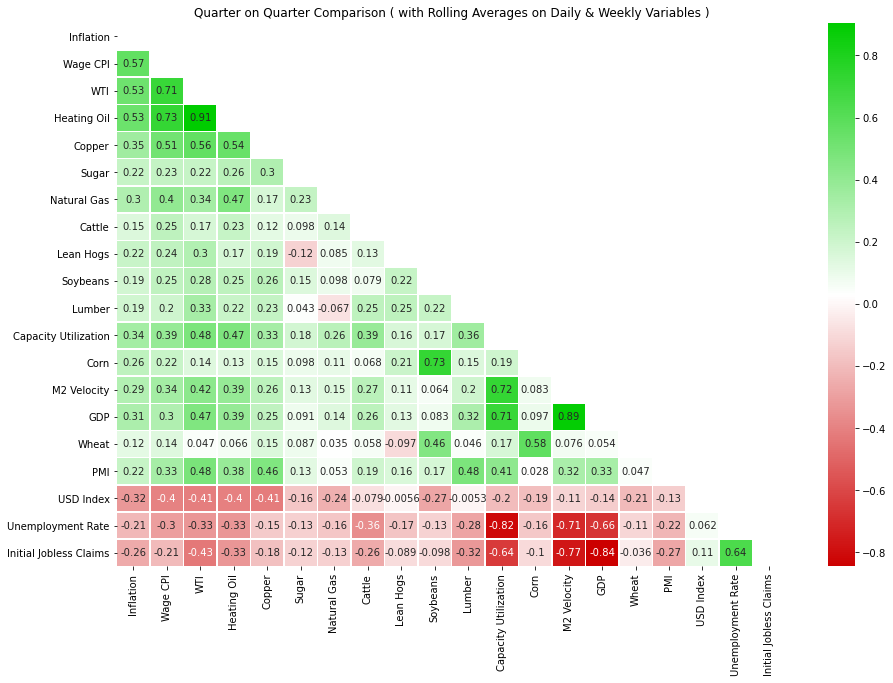

In [151]:
plt.subplots(figsize=(15,10))
matrix = np.triu(QonQ_main_roll.corr())
sns.heatmap(QonQ_main_roll.corr(), mask=matrix, linewidths=.5, cmap=GnRd, annot=True)
plt.title('Quarter on Quarter Comparison ( with Rolling Averages on Daily & Weekly Variables )')

In [153]:
df = QonQ_main_roll.sort_values(by="Date", ascending=False)
df_csv = pd.DataFrame(QonQ_main_roll)

df_csv.to_csv('./_Capstone_One_Inflation/data/1.0_MAIN/inflation_df.csv')
print('finished')


finished


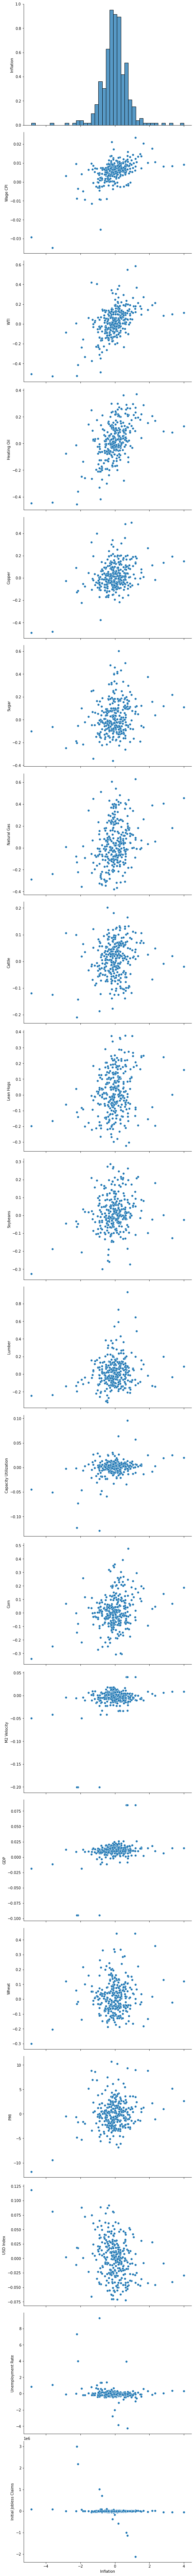

In [154]:
sns.pairplot(QonQ_main_roll,
            y_vars=['Inflation','Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims'],
            x_vars=['Inflation'],
            height=5, aspect=1.5,)

In [155]:
QonQ_main_roll = QonQ_main_roll.sort_values(by="Date", ascending=False)
QonQ_main_roll_csv = pd.DataFrame(QonQ_main_roll)

QonQ_main_roll_csv.to_excel('./_Capstone_One_Inflation/data/1.0_Segmented_by_periods/QonQ_roll_wCPI_merge.xlsx')
print('Finished')

Finished


Text(0, 0.5, 'Probability')

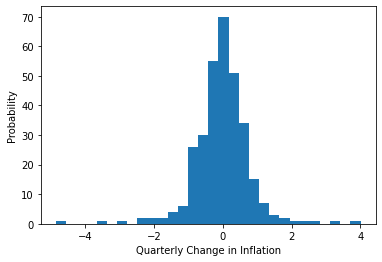

In [156]:
plt.hist(QonQ_main_roll['Inflation'], bins=30)
plt.xlabel('Quarterly Change in Inflation')
plt.ylabel('Probability')

Given the Inflation data hasn't been changed since 1.31; we will scrape anything ± 300 bps

In [157]:
cpi_review = np.abs(stats.zscore(QonQ_main_roll['Inflation']))
threshold = 3
print( np.where( cpi_review > threshold ) )

(array([126, 127, 128, 137, 138, 160], dtype=int64),)


In [158]:
QonQ_main_roll['Inflation'][156],QonQ_main_roll['Inflation'][178],QonQ_main_roll['Inflation'][179],QonQ_main_roll['Inflation'][188],QonQ_main_roll['Inflation'][189],QonQ_main_roll['Inflation'][190]

(0.238,
 -0.5150000000000001,
 -0.21899999999999986,
 -0.11499999999999999,
 -0.44099999999999984,
 -0.06899999999999995)

Dropping those outside ±300 bps

In [159]:
droppingrows = [ 178, 179, 188, 189 ]
QonQ_main_roll.drop(QonQ_main_roll.index[droppingrows], inplace=True)

Text(0, 0.5, 'Probability')

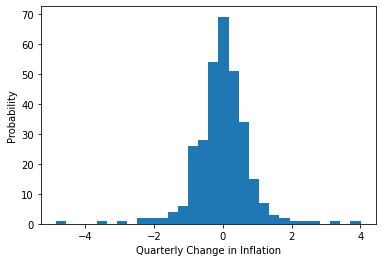

In [160]:
plt.hist(QonQ_main_roll['Inflation'], bins=30)
plt.xlabel('Quarterly Change in Inflation')
plt.ylabel('Probability')

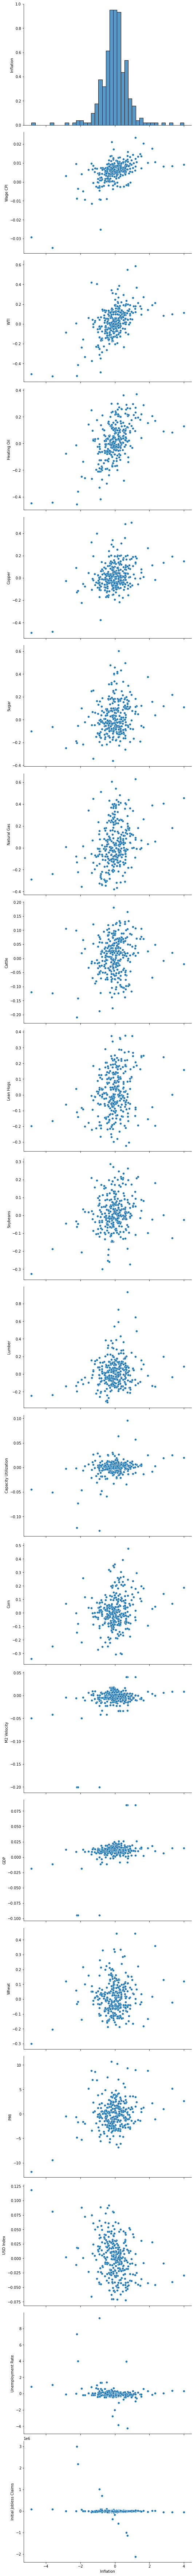

In [162]:
sns.pairplot(QonQ_main_roll,
            y_vars = ['Inflation','Wage CPI','WTI','Heating Oil','Copper','Sugar',
                     'Natural Gas','Cattle','Lean Hogs','Soybeans','Lumber',
                     'Capacity Utilization','Corn','M2 Velocity','GDP','Wheat','PMI',
                     'USD Index','Unemployment Rate','Initial Jobless Claims'],
            x_vars = ['Inflation'],
             height=5, aspect=1.5,
            )

In [163]:
QonQ_main_roll.corr(method='pearson')

Inflation  Wage CPI       WTI  Heating Oil    Copper  \
Inflation                1.000000  0.569104  0.526045     0.532681  0.362202   
Wage CPI                 0.569104  1.000000  0.712881     0.730108  0.517464   
WTI                      0.526045  0.712881  1.000000     0.906154  0.568969   
Heating Oil              0.532681  0.730108  0.906154     1.000000  0.542095   
Copper                   0.362202  0.517464  0.568969     0.542095  1.000000   
Sugar                    0.223426  0.231364  0.224117     0.265575  0.303320   
Natural Gas              0.306080  0.403867  0.343713     0.464004  0.164373   
Cattle                   0.160949  0.256826  0.174035     0.224682  0.107449   
Lean Hogs                0.217364  0.240946  0.298362     0.173158  0.197928   
Soybeans                 0.193677  0.260506  0.281512     0.246258  0.249489   
Lumber                   0.187893  0.200227  0.334349     0.218028  0.239303   
Capacity Utilization     0.349683  0.388464  0.482342     0.468071  0.327430   
Corn                     0.255729  0.222055  0.140502     0.132652  0.152147   
M2 Velocity              0.296206  0.339857  0.424904     0.386999  0.255984   
GDP                      0.314741  0.302402  0.468865     0.388517  0.245558   
Wheat                    0.123399  0.147295  0.044979     0.063635  0.151424   
PMI                      0.229939  0.343488  0.486353     0.380140  0.455797   
USD Index               -0.332554 -0.403340 -0.418335    -0.402802 -0.402472   
Unemployment Rate       -0.214116 -0.304705 -0.329520    -0.326457 -0.147081   
Initial Jobless Claims  -0.258888 -0.208674 -0.428260    -0.325685 -0.185179   

                           Sugar  Natural Gas    Cattle  Lean Hogs  Soybeans  \
Inflation               0.223426     0.306080  0.160949   0.217364  0.193677   
Wage CPI                0.231364     0.403867  0.256826   0.240946  0.260506   
WTI                     0.224117     0.343713  0.174035   0.298362  0.281512   
Heating Oil             0.265575     0.464004  0.224682   0.173158  0.246258   
Copper                  0.303320     0.164373  0.107449   0.197928  0.249489   
Sugar                   1.000000     0.234497  0.102849  -0.125887  0.159423   
Natural Gas             0.234497     1.000000  0.138644   0.086712  0.095021   
Cattle                  0.102849     0.138644  1.000000   0.137032  0.053167   
Lean Hogs              -0.125887     0.086712  0.137032   1.000000  0.241410   
Soybeans                0.159423     0.095021  0.053167   0.241410  1.000000   
Lumber                  0.043328    -0.064514  0.261620   0.253521  0.232452   
Capacity Utilization    0.181486     0.260488  0.382781   0.166804  0.165667   
Corn                    0.101519     0.108267  0.065553   0.217780  0.732827   
M2 Velocity             0.128354     0.141490  0.261150   0.117963  0.056436   
GDP                     0.090912     0.138870  0.259113   0.132306  0.082301   
Wheat                   0.090145     0.034699  0.054266  -0.093161  0.457273   
PMI                     0.134425     0.047984  0.178000   0.167932  0.145744   
USD Index              -0.166493    -0.230781 -0.056104  -0.011529 -0.262229   
Unemployment Rate      -0.131800    -0.161447 -0.358514  -0.171037 -0.123578   
Initial Jobless Claims -0.124060    -0.127054 -0.259474  -0.089704 -0.098143   

                          Lumber  Capacity Utilization      Corn  M2 Velocity  \
Inflation               0.187893              0.349683  0.255729     0.296206   
Wage CPI                0.200227              0.388464  0.222055     0.339857   
WTI                     0.334349              0.482342  0.140502     0.424904   
Heating Oil             0.218028              0.468071  0.132652     0.386999   
Copper                  0.239303              0.327430  0.152147     0.255984   
Sugar                   0.043328              0.181486  0.101519     0.128354   
Natural Gas            -0.064514              0.260488  0.108267     0.141490   
Cattle        

{'whiskers': [<matplotlib.lines.Line2D at 0x29fdfbe6190>,
 'caps': [<matplotlib.lines.Line2D at 0x29fdfbe6730>,
 'boxes': [<matplotlib.lines.Line2D at 0x29fded5a460>],
 'medians': [<matplotlib.lines.Line2D at 0x29fdfbe6df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29fdfbf4190>],
 'means': []}

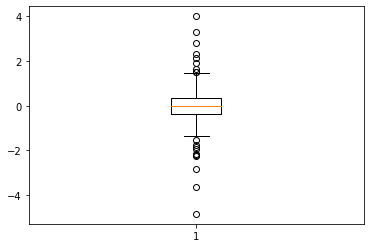

In [164]:
plt.boxplot(QonQ_main_roll['Inflation'])

Text(0.5, 1.0, 'Quarter on Quarter Comparison ( with Rolling Averages on Daily, Weekly & Monthly Data )')

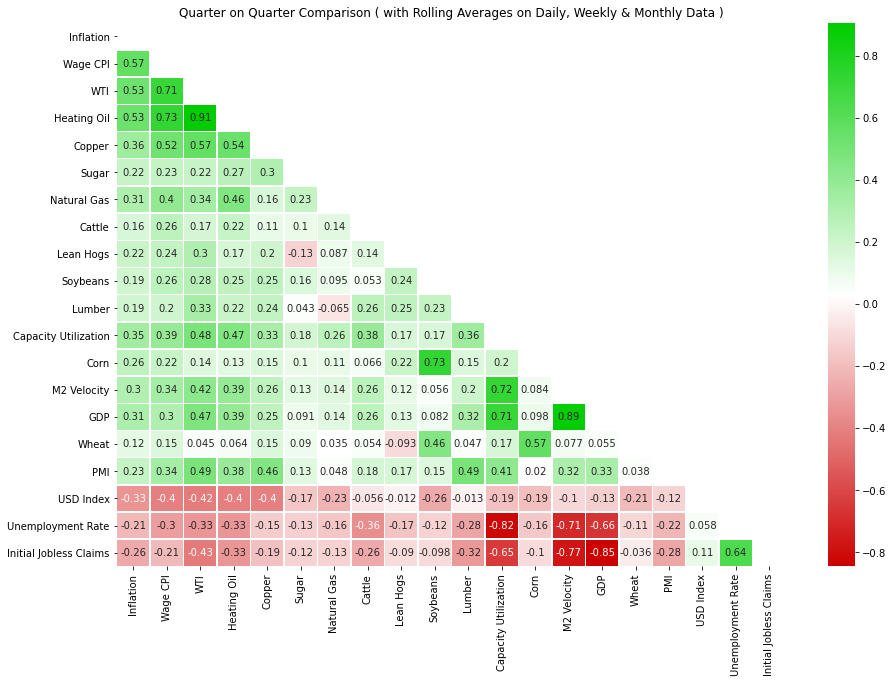

In [165]:
plt.subplots(figsize=(15,10))
matrix = np.triu(QonQ_main_roll.corr())
sns.heatmap(QonQ_main_roll.corr(), mask=matrix, linewidths=.5, cmap=GnRd, annot=True)
plt.title('Quarter on Quarter Comparison ( with Rolling Averages on Daily, Weekly & Monthly Data )')

In [172]:
QonQ_main_roll = QonQ_main_roll.sort_values(by="Date", ascending=False)
QonQ_main_roll_csv = pd.DataFrame(QonQ_main_roll)

QonQ_main_roll_csv.to_excel('./_Capstone_One_Inflation/data/1.0_Segmented_by_periods/QonQ_main_roll.xlsx')
print('Finished')

Finished


# 1.4 Summary

# 1.4.1 Looking into Natural Gas

**Natural Gas was one of the variables which confined the length / depth of the dataframe.** Here we will ascertain whether or not we could remove it for the following possible reasons:
   * It's influence on Inflation is accounted for with other fossil fuels 
   * It's influence by itself is notable

In [586]:
# Creating "new quarterly variables"

Q_wti_2 = Q_wti 
Q_heatoil_2 = Q_heatoil
Q_natgas_2 = Q_natgas
Q_cpi_2 = Q_cpi

In [587]:
fos_fuel_main = pd.concat([Q_wti_2,Q_heatoil_2,Q_natgas_2],
                         axis=1,ignore_index=False)

fos_fuel_main.columns = ['WTI','Heating Oil','Natural Gas']
fos_fuel_main.index.names = ["Date"]
fos_fuel_main = fos_fuel_main.fillna(method='ffill')

fos_fuel = Q_cpi_2.merge(fos_fuel_main,
                        how='left',on="Date")

fos_fuel.columns =['Inflation','WTI','Heating Oil','Natural Gas']

fos_fuel = fos_fuel.dropna()

Comparing the fossil fuels together to inflation.

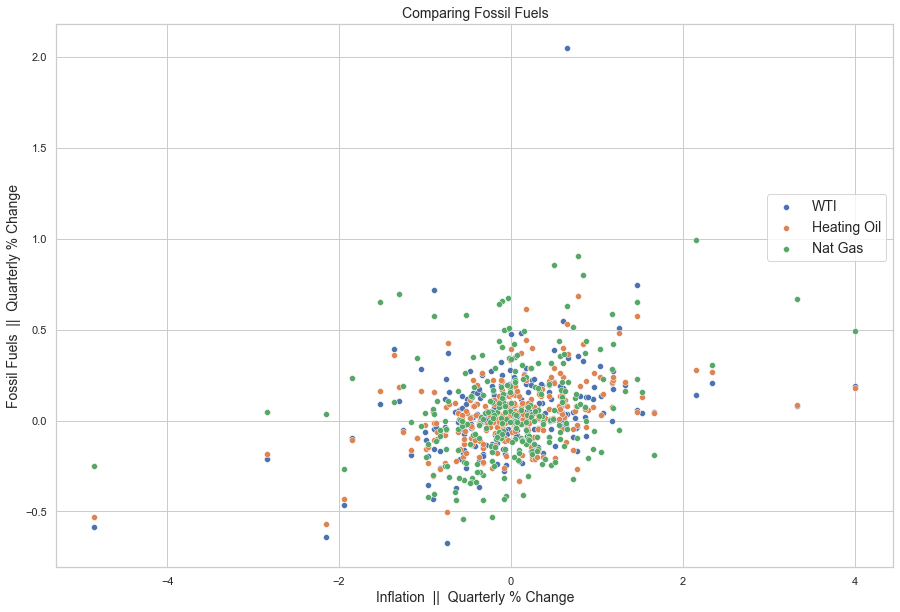

In [588]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=fos_fuel['Inflation'],y=fos_fuel['WTI'])
sns.scatterplot(x=fos_fuel['Inflation'],y=fos_fuel['Heating Oil'])
sns.scatterplot(x=fos_fuel['Inflation'],y=fos_fuel['Natural Gas'])
sns.set(style='whitegrid',)
plt.ylabel('Fossil Fuels  ||  Quarterly % Change', fontsize=14)
plt.xlabel('Inflation  ||  Quarterly % Change', fontsize=14)
plt.legend(['WTI','Heating Oil','Nat Gas'], scatterpoints=1,bbox_to_anchor=(1, 0.7),fontsize=14)
plt.title('Comparing Fossil Fuels', fontsize=14)
plt.show()

There appears to be one (1) outlier in WTI ( which was seen before ) which we will remove for further review.

In [589]:
wti_check = np.abs(stats.zscore(fos_fuel['WTI']))
threshold = 3
print(np.where( wti_check > threshold) )

(array([  2, 248, 249, 250, 251], dtype=int64),)


In [590]:
fos_fuel['WTI'][2],fos_fuel['WTI'][248],fos_fuel['WTI'][249],fos_fuel['WTI'][250],fos_fuel['WTI'][251]

(0.743196437407224,
 -0.6712463199214916,
 -0.6386522809010032,
 0.7178602243313201,
 2.046721929163527)

In [591]:
wtidrop_row = [251]
fos_fuel.drop(fos_fuel.index[wtidrop_row], inplace=True)

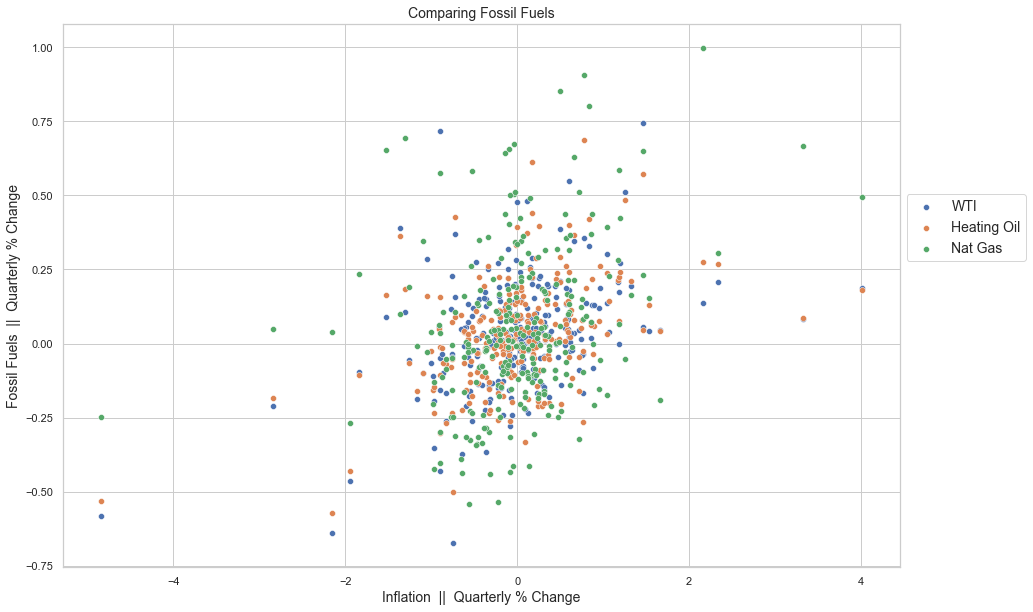

In [592]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=fos_fuel['Inflation'],y=fos_fuel['WTI'])
sns.scatterplot(x=fos_fuel['Inflation'],y=fos_fuel['Heating Oil'])
sns.scatterplot(x=fos_fuel['Inflation'],y=fos_fuel['Natural Gas'])
sns.set(style='whitegrid',)
plt.ylabel('Fossil Fuels  ||  Quarterly % Change', fontsize=14)
plt.xlabel('Inflation  ||  Quarterly % Change', fontsize=14)
plt.legend(['WTI','Heating Oil','Nat Gas'], scatterpoints=1,bbox_to_anchor=(1, 0.7),fontsize=14)
plt.title('Comparing Fossil Fuels', fontsize=14)
plt.show()

Visually these appear quite correlated or in other words possibly accounted for with WTI & Heating Oil.

Text(0.5, 1.0, 'Fossil Fuels Heatmap)')

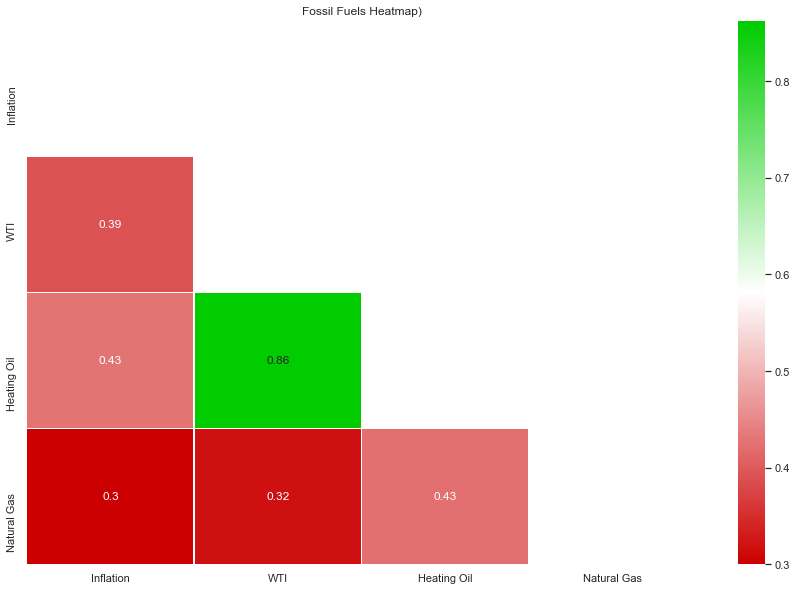

In [593]:
plt.subplots(figsize=(15,10))
matrix = np.triu(fos_fuel.corr())
sns.heatmap(fos_fuel.corr(), mask=matrix, linewidths=.5, cmap=GnRd, annot=True)
plt.title('Fossil Fuels Heatmap)')

It does not appear to be as correlated as WTI & Heating Oil are to each other.

# 1.4.2 Taking a look at other possible variables which limit size / depth

We unfortunately need to reassign the data to a new variables as they already been cut by Natural Gas's limitations

In [594]:
# Daily Data
two_usd_index = quandl.get('CHRIS/ICE_DX1')
two_wti = quandl.get('CHRIS/CME_CL1')
two_copper = investpy.get_commodity_historical_data(commodity='Copper', country='United States', from_date='01/01/1978', to_date=today_d_m_y_dash)
two_soybeans = investpy.get_commodity_historical_data(commodity='US Soybeans', from_date='01/01/1978', to_date=today_d_m_y_dash)
two_natgas = investpy.get_commodity_historical_data(commodity='Natural Gas', from_date='01/01/1978', to_date=today_d_m_y_dash)
two_heatoil = investpy.get_commodity_historical_data(commodity='Heating Oil', from_date='01/01/1978', to_date=today_d_m_y_dash)
two_corn = investpy.get_commodity_historical_data(commodity='US Corn', from_date='01/01/1978', to_date=today_d_m_y_dash)
two_wheat = investpy.get_commodity_historical_data(commodity='US Wheat', from_date='01/01/1978', to_date=today_d_m_y_dash)
two_cattle = investpy.get_commodity_historical_data(commodity='Live Cattle', from_date='01/01/1978', to_date=today_d_m_y_dash)
two_sugar = investpy.get_commodity_historical_data(commodity='US Sugar #11', from_date='01/01/1978', to_date=today_d_m_y_dash)
two_lumber = investpy.get_commodity_historical_data(commodity='Lumber', from_date='01/01/1978', to_date=today_d_m_y_dash)
two_leanhogs = investpy.get_commodity_historical_data(commodity='Lean Hogs', from_date='01/01/1978', to_date=today_d_m_y_dash)

# Weekly Data
two_int_job_claims = quandl.get('FRED/ICSA')    # Hasn't been factored in yet

# Monthly Data
two_cpi = quandl.get('RATEINF/INFLATION_USA')
two_wages_cpi = fred.get_series('CWSR0000SA0')
two_cap_util = fred.get_series('TCU')
two_unrate = quandl.get('FRED/UNRATE')          # Hasn't been factored in yet


# Quarterly Data
two_m2_velo = fred.get_series('M2V')
two_gdp = fred.get_series('GDP')


We will push them together again.

In [595]:
new_df = pd.concat([two_cpi,two_wages_cpi,two_wti['Last'],two_heatoil['Close'],two_copper['Close'],two_sugar['Close'],
                    two_natgas['Close'],two_cattle['Close'],two_leanhogs['Close'],two_soybeans['Close'],two_lumber['Close'],
                     two_cap_util,two_corn['Close'],two_gdp,two_m2_velo,two_wheat['Close'],two_usd_index['Settle'],
                    two_unrate,two_int_job_claims],
                    axis = 1, ignore_index=False)

new_df = new_df.fillna(method='ffill')
new_df.columns = ['Inflation','Wages CPI','WTI','Heating Oil','Copper','Sugar','Natural Gas','Cattle',
                   'Lean Hogs','Soybeans','Lumber','Capacity Utilization','Corn','GDP','M2 Velocity','Wheat',
                   'USD Index','Unemployment Rate','Initial Jobless Claims']
new_df['Inflation'].index
new_df.index.names = ["Date"]

new_df = new_df[new_df.index.dayofweek < 5]

new_df = new_df.sort_values(by="Date", ascending=False)

# I will sometimes take a look to ensure it is working properly
# main_df.tail()
# main_df.head()


In [596]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11451 entries, 2021-03-02 to 1914-03-31
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Inflation               11451 non-null  float64
 1   Wages CPI               11165 non-null  float64
 2   WTI                     9773 non-null   float64
 3   Heating Oil             10600 non-null  float64
 4   Copper                  8416 non-null   float64
 5   Sugar                   10600 non-null  float64
 6   Natural Gas             7983 non-null   float64
 7   Cattle                  10595 non-null  float64
 8   Lean Hogs               10600 non-null  float64
 9   Soybeans                8049 non-null   float64
 10  Lumber                  10600 non-null  float64
 11  Capacity Utilization    10821 non-null  float64
 12  Corn                    10600 non-null  float64
 13  GDP                     11165 non-null  float64
 14  M2 Velocity          

As per above the the "other variables" which may be consider to be discontinued to increase the size of the database would be:
   * Copper
   * Soybeans
   * Wheat

As per below, I ( in Excel ) pulled together the findings from this notebook for comparative purposes. To better explain, please find below the explaination of the column headers:
   * QoQ     ||  1.3.1 Q on Q Comparison
   * Mom     ||  1.3.2 Monthly Changes
   * QfoQ    ||  1.3.3 Quarterly Change | Variables ( past ) & Inflation ( forwards )
   * QoQ(av) ||  1.3.4 Q on Q Comparison w/ Rolling Averages on Daily, Wkly & Mnthly Variables
   * MAX  || The highest of the above
   * MIN  || The lowest of the above
   * RANK  || The ranking therein of the positively correlated & negatively correlated

As per below, Copper, Soybeans & Wheat's correlations to inflation are in the middle of the rankings ( Copper & Wheat ) & at the end ( Wheat ). Further consideration may be required. 

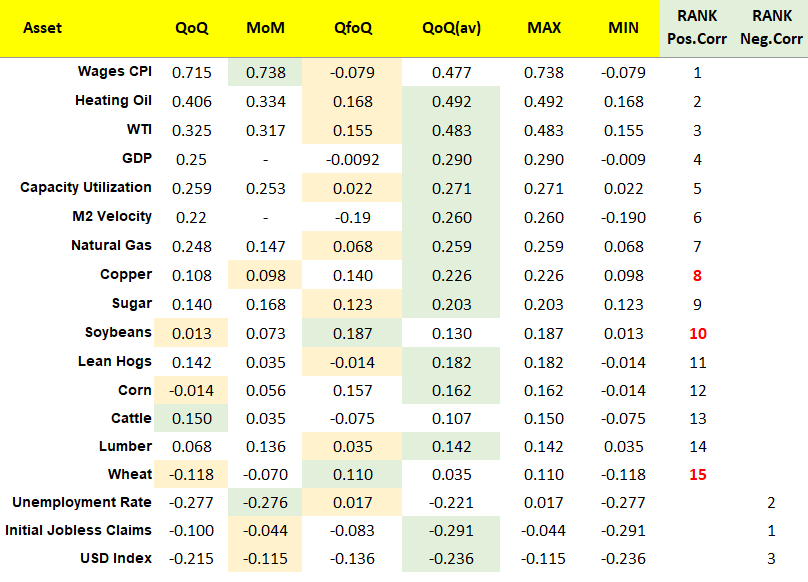

There is some variation between what works best but incorporating a rolling average on the variables played out well with the exception of the below:
   * Wages CPI
   * Soybeans
   * Cattle
   * Wheat
   * Unemployment Rate

Two of the above are also under consideration for removal

# 1.4.3 Scraping the Variables as well ( individually )

**All of the previous review was based on only scraping** `Inflation`. In this section, we will remove `Natural Gas` but keep `Soybeans`, `Wheat` & `Copper`.

We will scrape remaining variables.

We will use the Quarter on Quarter with rolling averages approach ( 1.3.4 ) & **we will scrape individually; meaning, we will return to the original data ( i.e. the beginning ) & scrape from those before we concatenate them together.** We will concatenate those 'cleaned' dataframes & apply the forward fill approach.

We will reassign them to a new variable based on the same structure.

In [597]:
Q_usd_index_2 = usd_index['Settle'].pct_change(periods=66)
Q_wti_2 = wti['Last'].pct_change(periods=66)

Q_copper_2 = copper['Close'].pct_change(periods=66)
Q_soybeans_2 = soybeans['Close'].pct_change(periods=66)
Q_heatoil_2 = heatoil['Close'].pct_change(periods=66)
Q_corn_2 = corn['Close'].pct_change(periods=66)
Q_wheat_2 = wheat['Close'].pct_change(periods=66)
Q_cattle_2 = cattle['Close'].pct_change(periods=66)
Q_sugar_2 = sugar['Close'].pct_change(periods=66)
Q_lumber_2 = lumber['Close'].pct_change(periods=66)
Q_leanhogs_2 = leanhogs['Close'].pct_change(periods=66)

# ( Complete ) Weekly | Initial Jobless Claims
Q_intjobs_2 = int_job_claims.diff(periods=12)

# ( Complete ) Mnthly | Capacity Utilization, Wages, Inflation
Q_caputil_2 = cap_util.pct_change(periods=3)
Q_wages_2 = wages_cpi.pct_change(periods=3)
Q_cpi_2 = cpi.diff(periods=3)
Q_unrate_2 = unrate.diff(periods=3)

# ( Complete ) Quarterly | GDP, Velocity of Money
Q_gdp_2 = gdp.pct_change(periods=1)
Q_m2_velo_2 = m2_velo.pct_change(periods=1)


In [598]:
# ( Complete ) Daily | USD & WTI | removed 24 days from 90 ( i.e. weekends ) but doesn't include holidays
Q_usd_index_roll_2 = Q_usd_index_2.rolling(66).mean()
Q_wti_roll_2 = Q_wti_2.rolling(66).mean()

Q_copper_roll_2 = Q_copper_2.rolling(66).mean()
Q_soybeans_roll_2 = Q_soybeans_2.rolling(66).mean()
Q_heatoil_roll_2 = Q_heatoil_2.rolling(66).mean()
Q_corn_roll_2 = Q_corn_2.rolling(66).mean()
Q_wheat_roll_2 = Q_wheat_2.rolling(66).mean()
Q_cattle_roll_2 = Q_cattle_2.rolling(66).mean()
Q_sugar_roll_2 = Q_sugar_2.rolling(66).mean()
Q_lumber_roll_2 = Q_lumber_2.rolling(66).mean()
Q_leanhogs_roll_2 = Q_leanhogs_2.rolling(66).mean()

# ( Complete ) Weekly | Initial Jobless Claims
Q_intjobs_roll_2 = Q_intjobs_2.rolling(12).mean()

# ( Complete ) Mnthly | Capacity Utilization, Wages, Inflation
Q_caputil_roll_2 = Q_caputil_2.rolling(3).mean()
Q_wages_roll_2 = Q_wages_2.rolling(3).mean()
Q_unrate_roll_2 = Q_unrate_2.rolling(3).mean()

# ( Complete ) Quarterly | GDP, Velocity of Money
Q_gdp_2 = Q_gdp_2.pct_change(periods=1)
Q_m2_velo_2 = Q_m2_velo_2.pct_change(periods=1)

In [599]:
# we need to create seperate inflation variables to compare each variable independantly
Q_cpi_usd_index_roll = cpi.diff(periods=3)
Q_cpi_wti_roll_2 = cpi.diff(periods=3)

Q_cpi_copper_roll_2 = cpi.diff(periods=3)
Q_cpi_soybeans_roll_2 = cpi.diff(periods=3)
Q_cpi_heatoil_roll_2 = cpi.diff(periods=3)
Q_cpi_corn_roll_2 = cpi.diff(periods=3)
Q_cpi_wheat_roll_2 = cpi.diff(periods=3)
Q_cpi_cattle_roll_2 = cpi.diff(periods=3)
Q_cpi_sugar_roll_2 = cpi.diff(periods=3)
Q_cpi_lumber_roll_2 = cpi.diff(periods=3)
Q_cpi_leanhogs_roll_2 = cpi.diff(periods=3)

Q_cpi_intjobs_roll_2 = cpi.diff(periods=3)

Q_cpi_caputil_roll_2 = cpi.diff(periods=3)
Q_cpi_wages_roll_2 = cpi.diff(periods=3)
Q_cpi_unrate_roll_2 = cpi.diff(periods=3)

Q_cpi_gdp_2 = cpi.diff(periods=3)
Q_cpi_m2_velo_2 = cpi.diff(periods=3)


**Let's now look for outliers individually on each before we concatenate them together.**

Let's start with `WTI`.

In [600]:
# Putting WTI together with inflation
QonQ_main_roll_WTI = Q_cpi_wti_roll_2.merge(Q_wti_roll_2, how='left', on='Date')

# QonQ_main_roll = QonQ_main_roll[Q_cpi.index.dayofweek < 5]

QonQ_main_roll_WTI.columns = ['Inflation',
                              'WTI']

QonQ_main_roll_WTI = QonQ_main_roll_WTI.dropna()

Text(0.5, 0, 'WTI Quarterly Change')

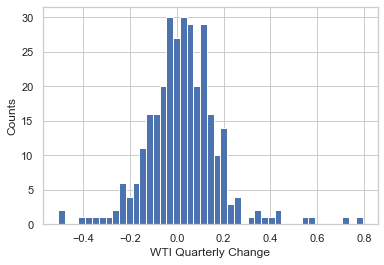

In [601]:
plt.hist(QonQ_main_roll_WTI['WTI'], density=False, bins=45)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('WTI Quarterly Change')

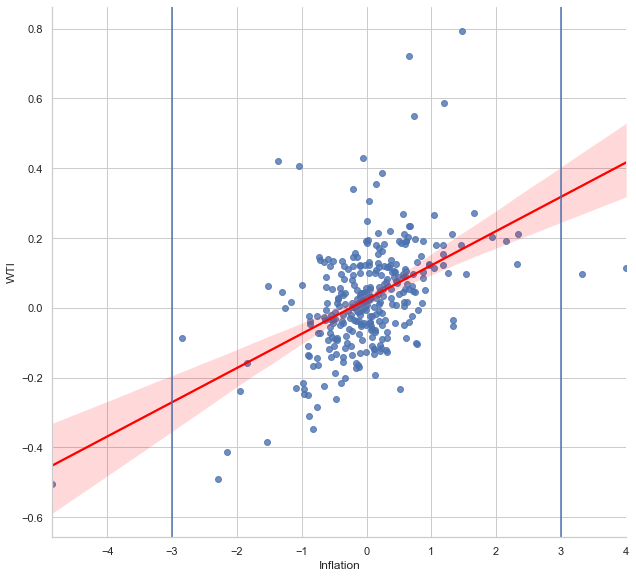

In [602]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="WTI",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_WTI, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')


As a reminder, as we go through this process, ±300 bps on `Inflation` will be removed ( the lines above ). 

In [603]:
wti_outliers = np.abs(stats.zscore(QonQ_main_roll_WTI['WTI']))
thresh = 3
print(np.where( wti_outliers >= thresh ))

(array([ 21,  58,  59, 209, 307, 308], dtype=int64),)


In [604]:
QonQ_main_roll_WTI['WTI'][21],QonQ_main_roll_WTI['WTI'][58],QonQ_main_roll_WTI['WTI'][59],QonQ_main_roll_WTI['WTI'][209],QonQ_main_roll_WTI['WTI'][307],QonQ_main_roll_WTI['WTI'][308]

(-0.4916561934217437,
 0.7937089275231227,
 0.7208014136969375,
 -0.5062255494981958,
 0.5864625150063545,
 0.5504017628029214)

We will proceed withe the assumption of ±60% can be our boundaries.

In [605]:
wti_drop = [ 58, 59 ]
QonQ_main_roll_WTI.drop(QonQ_main_roll_WTI.index[wti_drop], inplace=True)

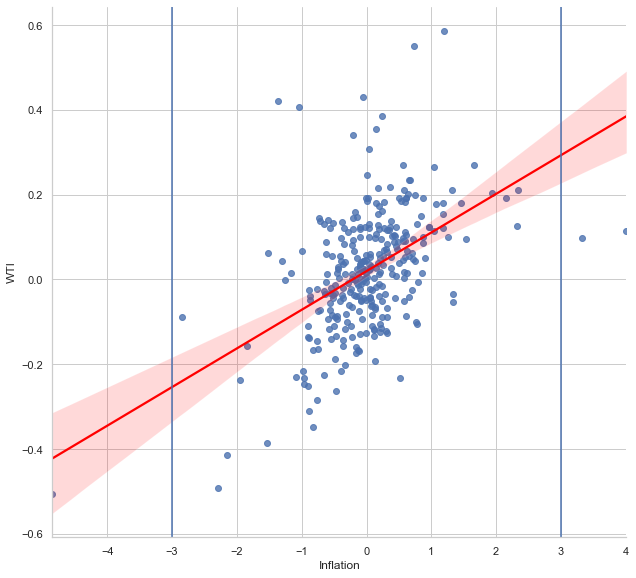

In [606]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="WTI",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_WTI, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')


Let's check out the histogram again.

Text(0.5, 0, 'WTI Quarterly Change')

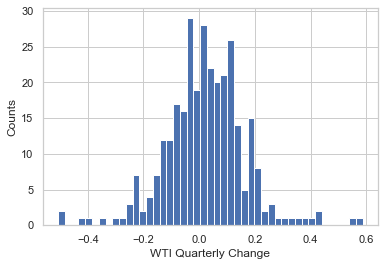

In [607]:
plt.hist(QonQ_main_roll_WTI['WTI'], density=False, bins=45)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('WTI Quarterly Change')

Let's work with it; next `Lumber`.

In [608]:

QonQ_main_roll_Lumber = Q_cpi_lumber_roll_2.merge(Q_lumber_roll_2, how='left', on='Date')

# QonQ_main_roll = QonQ_main_roll[Q_cpi.index.dayofweek < 5]

QonQ_main_roll_Lumber.columns = ['Inflation',
                              'Lumber']

QonQ_main_roll_Lumber = QonQ_main_roll_Lumber.dropna()

Text(0.5, 0, 'Lumber Quarterly Change')

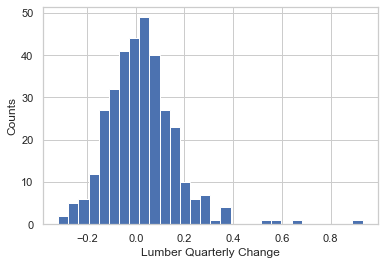

In [609]:
plt.hist(QonQ_main_roll_Lumber['Lumber'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Lumber Quarterly Change')

Outliers appear to be +0.4; let's confirm.

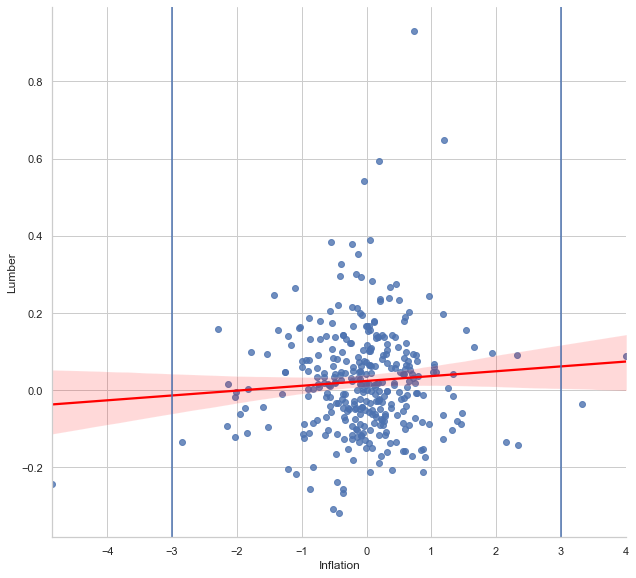

In [610]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Lumber",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_Lumber, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')


In [611]:
wood_outliers = np.abs(stats.zscore(QonQ_main_roll_Lumber['Lumber']))
thresh = 3
print(np.where( wood_outliers >= thresh ))

(array([105, 106, 336, 337], dtype=int64),)


In [612]:
QonQ_main_roll_Lumber['Lumber'][105],QonQ_main_roll_Lumber['Lumber'][106],QonQ_main_roll_Lumber['Lumber'][336],QonQ_main_roll_Lumber['Lumber'][337]

(0.5930780274077718,
 0.5426370098414417,
 0.6477095249025613,
 0.9311827220702612)

In [613]:
wood_drop = [105, 106, 336, 337]
QonQ_main_roll_Lumber.drop(QonQ_main_roll_Lumber.index[wood_drop], inplace=True)

Dropped. Lets see how it looks.

Text(0.5, 0, 'Lumber Quarterly Change')

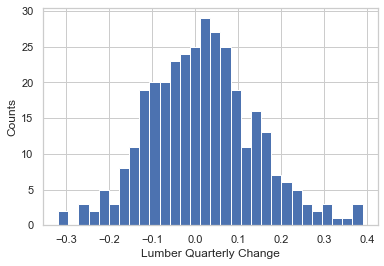

In [614]:
plt.hist(QonQ_main_roll_Lumber['Lumber'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Lumber Quarterly Change')

Looks normally distributed. Let's investigate a scatter.

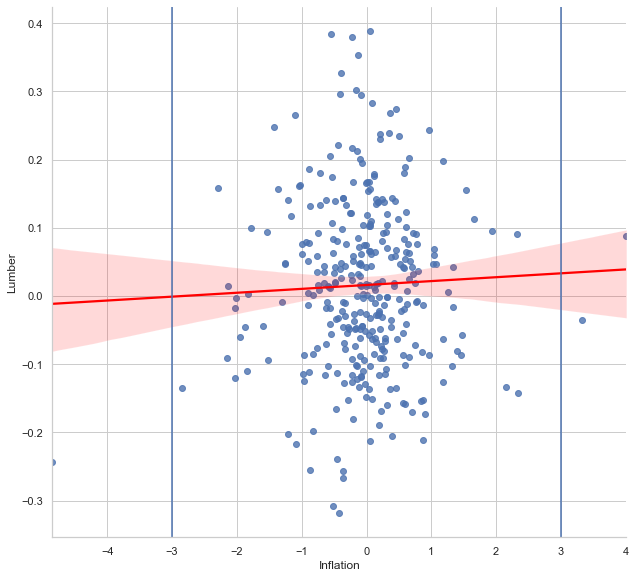

In [615]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Lumber",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_Lumber, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')


You may go further but I believe this may work so we will continue.

Next up, `Sugar`.

In [616]:
# Putting it together with inflation
QonQ_main_roll_sugar = Q_cpi_sugar_roll_2.merge(Q_sugar_roll_2, how='left', on='Date')

# QonQ_main_roll = QonQ_main_roll[Q_cpi.index.dayofweek < 5]

QonQ_main_roll_sugar.columns = ['Inflation',
                              'Sugar']

QonQ_main_roll_sugar = QonQ_main_roll_sugar.dropna()

Text(0.5, 0, 'Sugar Quarterly Change')

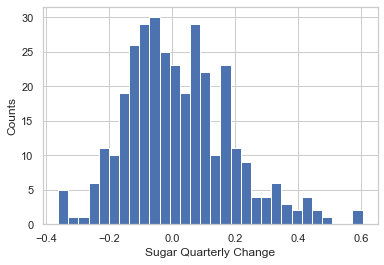

In [617]:
plt.hist(QonQ_main_roll_sugar['Sugar'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Sugar Quarterly Change')

There's some outliers but not as many. Let's see

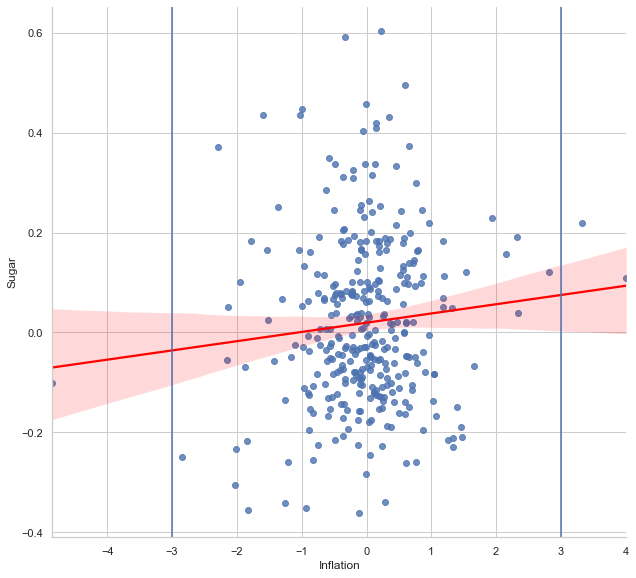

In [618]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Sugar",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_sugar, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')


Let's see what the zscore says.

In [619]:
sugar_outliers = np.abs(stats.zscore(QonQ_main_roll_sugar['Sugar']))
thresh = 3
print(np.where( sugar_outliers >= thresh ))

(array([ 41, 163], dtype=int64),)


Let me guess; at or near 0.6?

In [620]:
QonQ_main_roll_sugar['Sugar'][41],QonQ_main_roll_sugar['Sugar'][163]

(0.5912219460788073, 0.6041389971704523)

Makes sense; let's drop them.

In [621]:
sugar_high = [41, 163]
QonQ_main_roll_sugar.drop(QonQ_main_roll_sugar.index[sugar_high], inplace=True)

Text(0.5, 0, 'Sugar Quarterly Change')

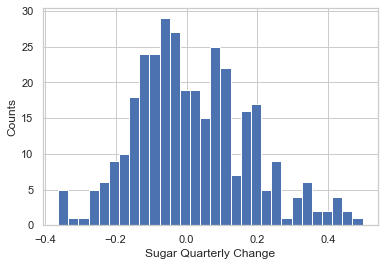

In [622]:
plt.hist(QonQ_main_roll_sugar['Sugar'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Sugar Quarterly Change')

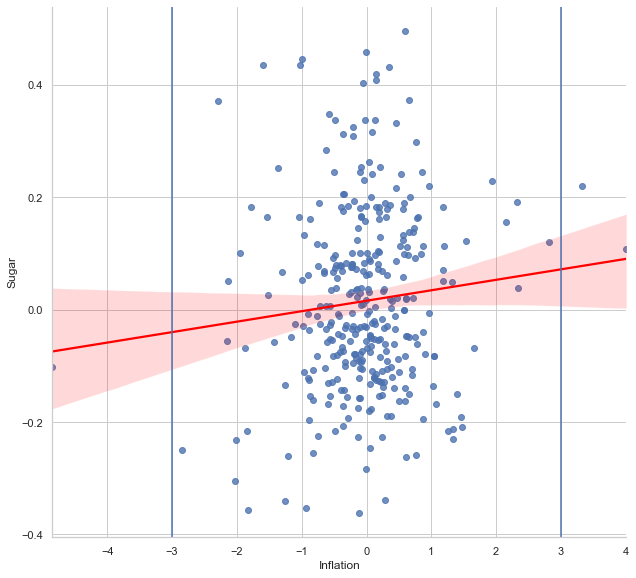

In [623]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Sugar",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_sugar, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

Next up, `Wheat`.

In [624]:
# Putting it together with inflation
QonQ_main_roll_wheat = Q_cpi_wheat_roll_2.merge(Q_wheat_roll_2, how='left', on='Date')

# QonQ_main_roll = QonQ_main_roll[Q_cpi.index.dayofweek < 5]

QonQ_main_roll_wheat.columns = ['Inflation',
                              'Wheat']

QonQ_main_roll_wheat = QonQ_main_roll_wheat.dropna()

Text(0.5, 0, 'Wheat Quarterly Change')

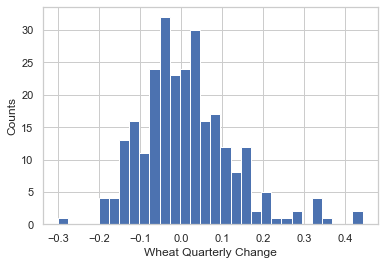

In [625]:
plt.hist(QonQ_main_roll_wheat['Wheat'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Wheat Quarterly Change')

Outliers look to be +40%; let's take a look at a scatter plot.

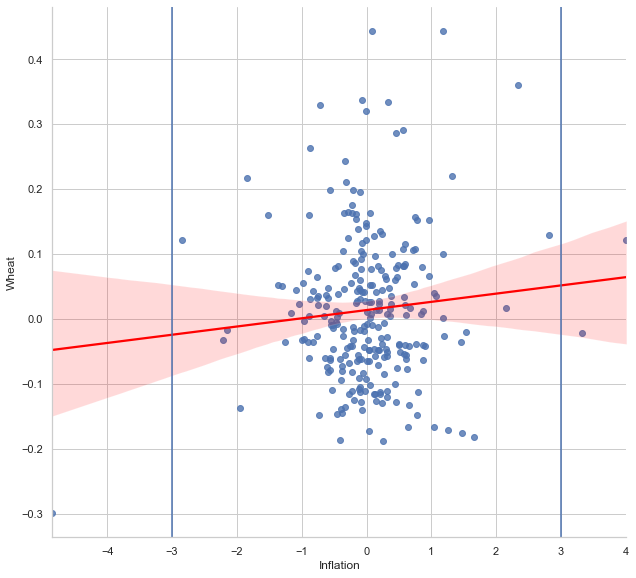

In [626]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Wheat",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_wheat, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

In [627]:
wheat_out = np.abs(stats.zscore(QonQ_main_roll_wheat['Wheat']))
thresh = 3
print(np.where(wheat_out >= thresh))

(array([141, 142, 167], dtype=int64),)


In [628]:
QonQ_main_roll_wheat['Wheat'][141],QonQ_main_roll_wheat['Wheat'][142],QonQ_main_roll_wheat['Wheat'][167]

(0.4426094099481728, 0.3599306322614149, 0.4434118078615357)

Let's keep it simple at the 40% threshold.

In [629]:
wheat_drop = [ 141, 167 ]
QonQ_main_roll_wheat.drop(QonQ_main_roll_wheat.index[wheat_drop], inplace=True)

Text(0.5, 0, 'Wheat Quarterly Change')

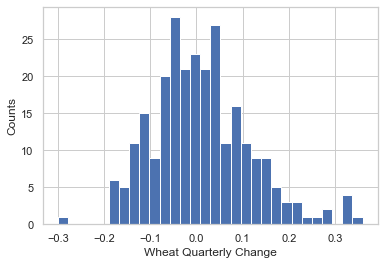

In [630]:
plt.hist(QonQ_main_roll_wheat['Wheat'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Wheat Quarterly Change')

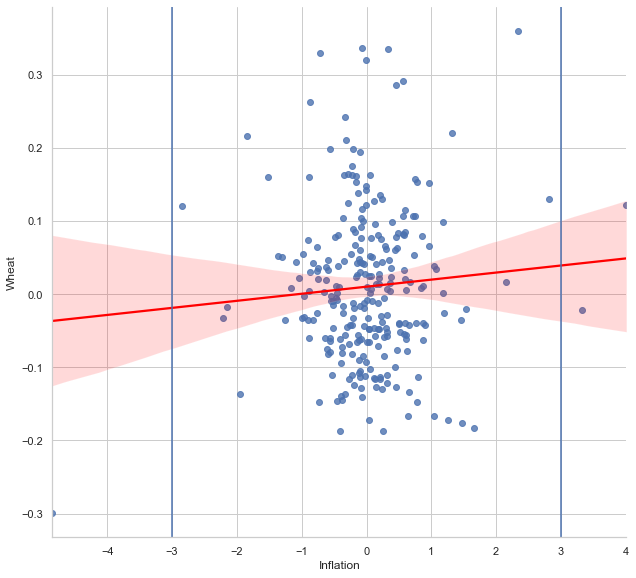

In [631]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Wheat",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_wheat, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

`Wheat` looks "ok" so let's move to the next one; `Copper`.

In [632]:
# Putting it together with inflation
QonQ_main_roll_copper = Q_cpi_copper_roll_2.merge(Q_copper_roll_2, how='left', on='Date')

# QonQ_main_roll = QonQ_main_roll[Q_cpi.index.dayofweek < 5]

QonQ_main_roll_copper.columns = ['Inflation',
                              'Copper']

QonQ_main_roll_copper = QonQ_main_roll_copper.dropna()

Text(0.5, 0, 'Copper Quarterly Change')

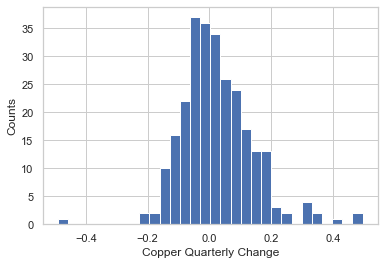

In [633]:
plt.hist(QonQ_main_roll_copper['Copper'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Copper Quarterly Change')

The noticeable outliers are ±40%; let's take a look on a scatter plot.

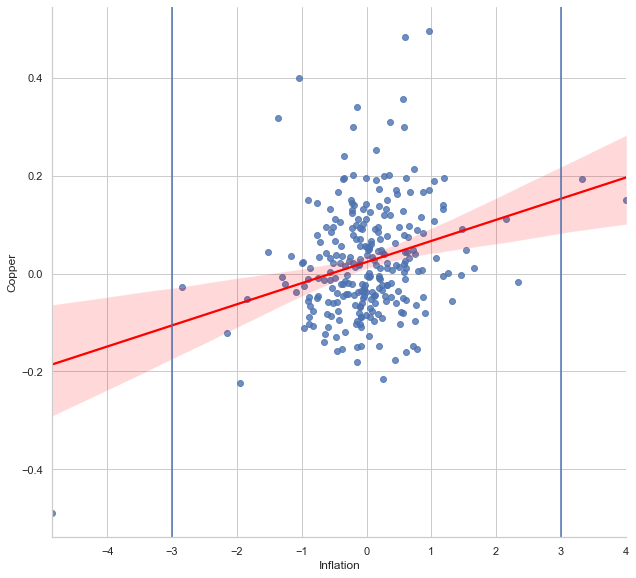

In [634]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Copper",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_copper, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

One of the outliers ( negative ) falls into the `Inflation` drop territory but we will still probably see it & drop it here.

In [635]:
cop_out = np.abs(stats.zscore(QonQ_main_roll_copper['Copper']))
cop_thresh = 3
print(np.where( cop_out >= cop_thresh ))

(array([143, 144, 165, 168], dtype=int64),)


In [636]:
QonQ_main_roll_copper['Copper'][143],QonQ_main_roll_copper['Copper'][144],QonQ_main_roll_copper['Copper'][165],QonQ_main_roll_copper['Copper'][168]

(0.4964666602693851,
 0.48450253345546795,
 -0.4901995166095401,
 0.3999030509117332)

In [637]:
cop_drop = [ 143, 144, 165 ]
QonQ_main_roll_copper.drop(QonQ_main_roll_copper.index[cop_drop], inplace=True)

Text(0.5, 0, 'Copper Quarterly Change')

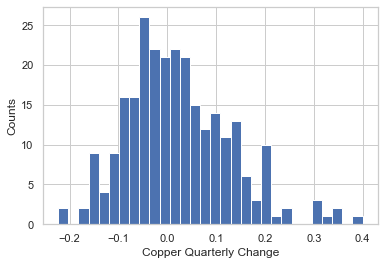

In [638]:
plt.hist(QonQ_main_roll_copper['Copper'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Copper Quarterly Change')

Good here.

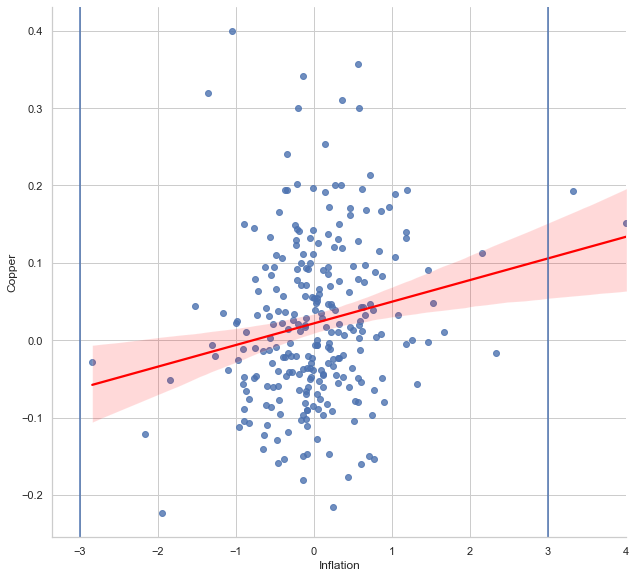

In [639]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Copper",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_copper, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

Let's work with that. Next is `Corn`

In [640]:
# Putting it together with inflation
QonQ_main_roll_corn = Q_cpi_corn_roll_2.merge(Q_corn_roll_2, how='left', on='Date')

# QonQ_main_roll = QonQ_main_roll[Q_cpi.index.dayofweek < 5]

QonQ_main_roll_corn.columns = ['Inflation',
                              'Corn']

QonQ_main_roll_corn = QonQ_main_roll_corn.dropna()

Text(0.5, 0, 'Corn Quarterly Change')

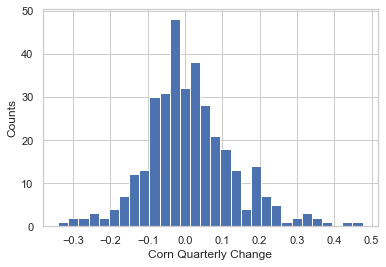

In [641]:
plt.hist(QonQ_main_roll_corn['Corn'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Corn Quarterly Change')

The histogram looks reasonably normal but with a slight lean. Let's see the scatter plot.

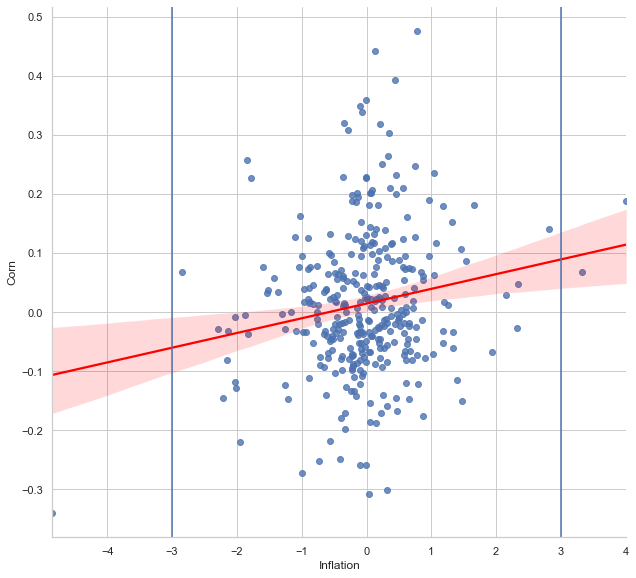

In [642]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Corn",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_corn, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

Let's see the z score

In [643]:
corn_out = np.abs(stats.zscore(QonQ_main_roll_corn['Corn']))
corn_thresh = 3
print(np.where( corn_out >= corn_thresh ))

(array([ 65, 218, 219], dtype=int64),)


In [644]:
QonQ_main_roll_corn['Corn'][65],QonQ_main_roll_corn['Corn'][218],QonQ_main_roll_corn['Corn'][219]

(0.44161962704009616, 0.4758691606867668, 0.39327156574826805)

Let's work off a ±30% protocal & only eliminate 2 of the above.

In [645]:
corn_drop = [ 65, 218 ]
QonQ_main_roll_corn.drop(QonQ_main_roll_corn.index[ corn_drop ], inplace=True)

Text(0.5, 0, 'Corn Quarterly Change')

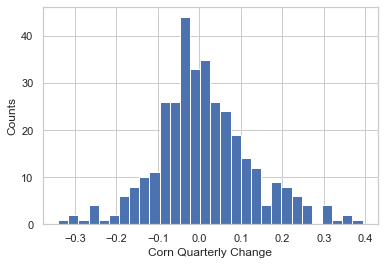

In [646]:
plt.hist(QonQ_main_roll_corn['Corn'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Corn Quarterly Change')

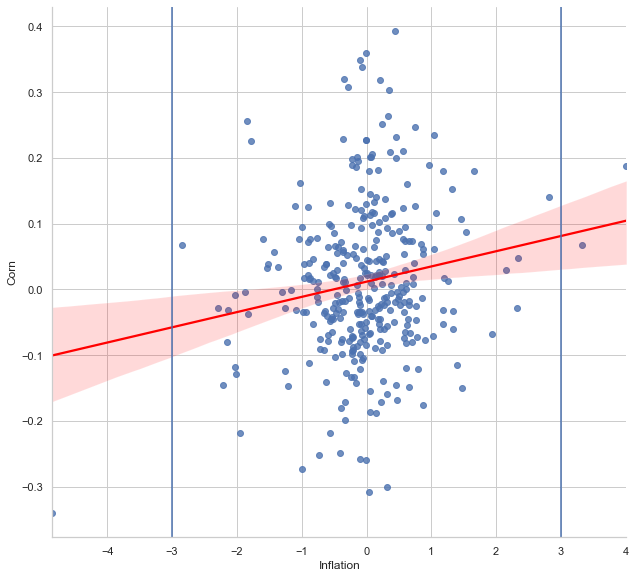

In [647]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Corn",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_corn, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

Not perfect but let's move on to the next one; `Cattle`.

In [648]:
# Putting it together with inflation
QonQ_main_roll_cattle = Q_cpi_cattle_roll_2.merge(Q_cattle_roll_2, how='left', on='Date')

# QonQ_main_roll = QonQ_main_roll[Q_cpi.index.dayofweek < 5]

QonQ_main_roll_cattle.columns = ['Inflation',
                              'Cattle']

QonQ_main_roll_cattle = QonQ_main_roll_cattle.dropna()

Text(0.5, 0, 'Cattle Quarterly Change')

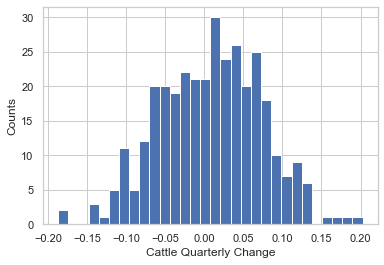

In [649]:
plt.hist(QonQ_main_roll_cattle['Cattle'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Cattle Quarterly Change')

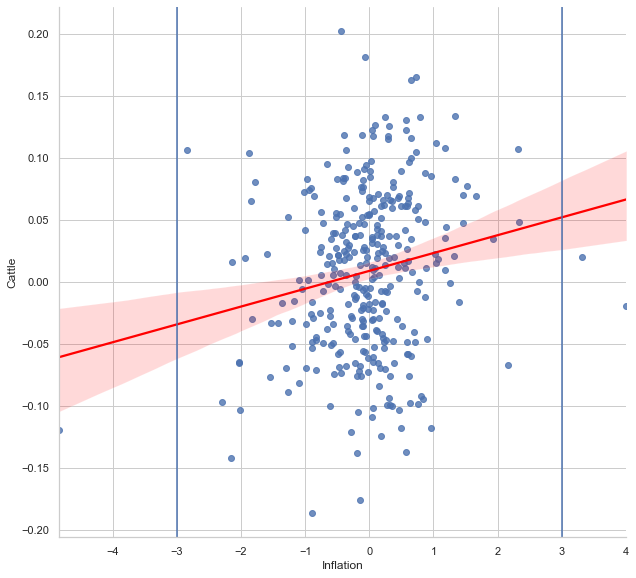

In [650]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Cattle",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_cattle, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

In [651]:
cat_out = np.abs(stats.zscore(QonQ_main_roll_cattle['Cattle']))
cat_thresh = 3
print(np.where( cat_out >= cat_thresh ))

(array([], dtype=int64),)


Next we will look at the `USD Index`.

In [652]:
# Putting it together with inflation
QonQ_main_roll_dixie = Q_cpi_usd_index_roll.merge(Q_usd_index_roll_2, how='left', on='Date')

# QonQ_main_roll = QonQ_main_roll[Q_cpi.index.dayofweek < 5]

QonQ_main_roll_dixie.columns = ['Inflation',
                              'US Dollar Index']

QonQ_main_roll_dixie = QonQ_main_roll_dixie.dropna()

Text(0.5, 0, 'US Dollar Index Quarterly Change')

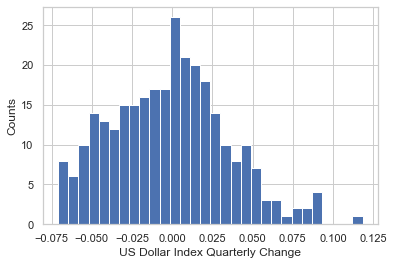

In [653]:
plt.hist(QonQ_main_roll_dixie['US Dollar Index'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('US Dollar Index Quarterly Change')

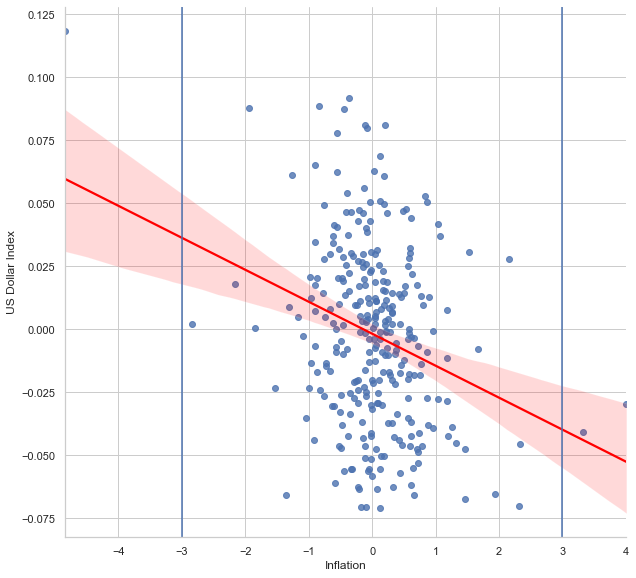

In [654]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="US Dollar Index",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_dixie, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

In [655]:
dixie_out = np.abs(stats.zscore(QonQ_main_roll_dixie['US Dollar Index']))
dixie_thresh = 3
print(np.where( dixie_out >= dixie_thresh ))

(array([190], dtype=int64),)


In [656]:
QonQ_main_roll_dixie['US Dollar Index'][190]

0.11842859058956058

That falls under the `Inflation` scrapping zone so we will keep it & move on.

Moving over to `Soybeans`.

In [657]:
# Putting it together with inflation
QonQ_main_roll_soybeans = Q_cpi_soybeans_roll_2.merge(Q_soybeans_roll_2, how='left', on='Date')

# QonQ_main_roll = QonQ_main_roll[Q_cpi.index.dayofweek < 5]

QonQ_main_roll_soybeans.columns = ['Inflation',
                              'Soybeans']

QonQ_main_roll_soybeans = QonQ_main_roll_soybeans.dropna()

Text(0.5, 0, 'Soybeans Quarterly Change')

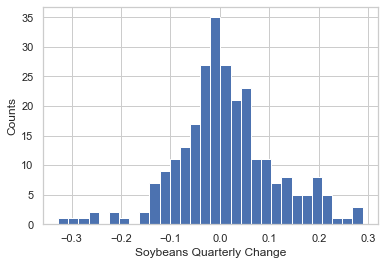

In [658]:
plt.hist(QonQ_main_roll_soybeans['Soybeans'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Soybeans Quarterly Change')

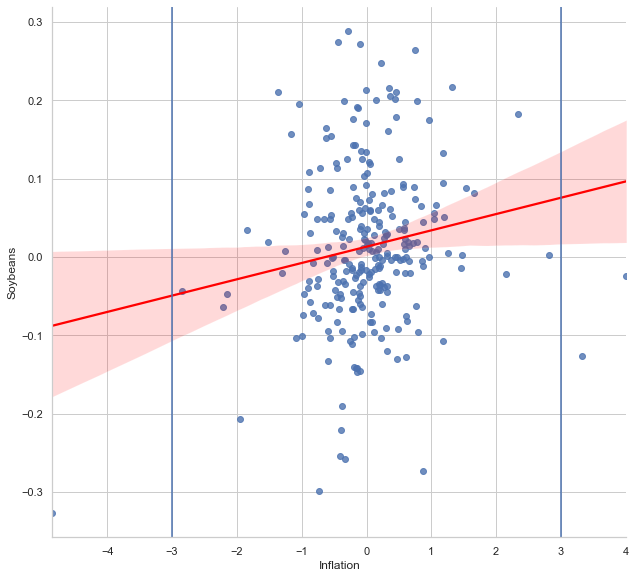

In [659]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Soybeans",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_soybeans, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

In [660]:
soy_out = np.abs(stats.zscore(QonQ_main_roll_soybeans['Soybeans']))
soy_thresh = 3
print(np.where( soy_out >= soy_thresh ))

(array([115, 152], dtype=int64),)


In [661]:
QonQ_main_roll_soybeans['Soybeans'][115],QonQ_main_roll_soybeans['Soybeans'][152]

(-0.2992754451037921, -0.3272563691460246)

Although I'm not happy with the results from `Soybeans`, one of the observations above ( -32% ) will be removed with `Inflation` scrapping while the other may push for an aggressive range. I will remove the one that will otherwise be removed with `Inflation` for now.

In [662]:
soy_to_drop = [ 152 ]
QonQ_main_roll_soybeans.drop(QonQ_main_roll_soybeans.index[soy_to_drop], inplace=True)

Text(0.5, 0, 'Soybeans Quarterly Change')

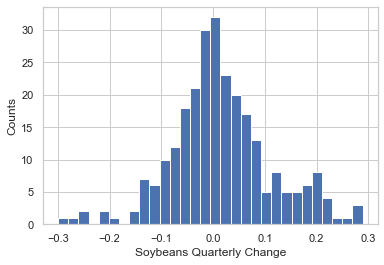

In [663]:
plt.hist(QonQ_main_roll_soybeans['Soybeans'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Soybeans Quarterly Change')

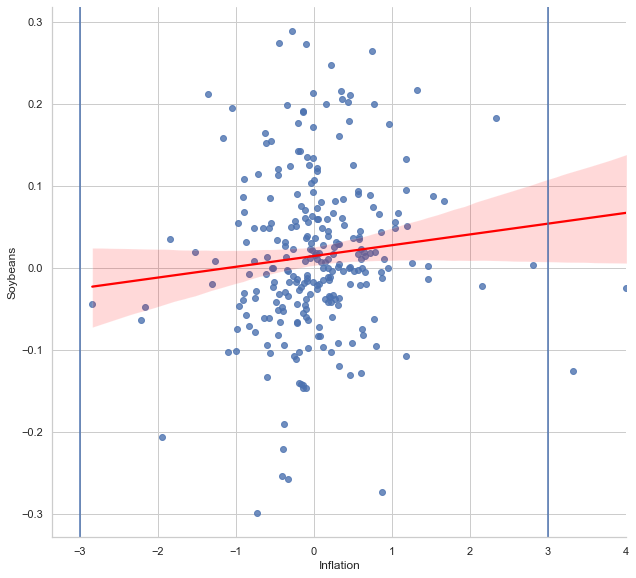

In [664]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Soybeans",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_soybeans, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

Moving over to `Heating Oil`.

In [665]:
# Putting it together with inflation
QonQ_main_roll_heatoil = Q_cpi_heatoil_roll_2.merge(Q_heatoil_roll_2, how='left', on='Date')

# QonQ_main_roll = QonQ_main_roll[Q_cpi.index.dayofweek < 5]

QonQ_main_roll_heatoil.columns = ['Inflation',
                              'Heating Oil']

QonQ_main_roll_heatoil = QonQ_main_roll_heatoil.dropna()

Text(0.5, 0, 'Heating Oil Quarterly Change')

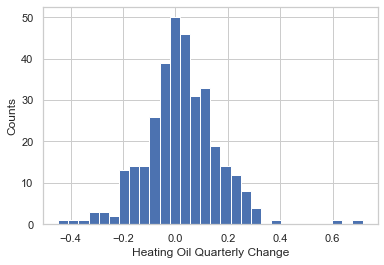

In [666]:
plt.hist(QonQ_main_roll_heatoil['Heating Oil'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Heating Oil Quarterly Change')

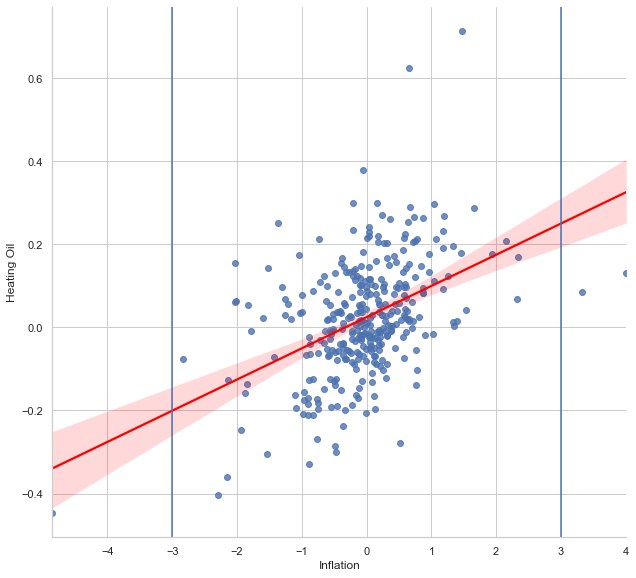

In [667]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Heating Oil",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_heatoil, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

In [668]:
heat_out = np.abs(stats.zscore(QonQ_main_roll_heatoil['Heating Oil']))
heat_thresh = 3
print(np.where( heat_out >= heat_thresh ))

(array([ 46,  83,  84, 234], dtype=int64),)


In [669]:
QonQ_main_roll_heatoil['Heating Oil'][46],QonQ_main_roll_heatoil['Heating Oil'][83],QonQ_main_roll_heatoil['Heating Oil'][84],QonQ_main_roll_heatoil['Heating Oil'][234]

(-0.40332337041169564,
 0.7145361267622342,
 0.6241707144189736,
 -0.4473949131373653)

One of the these falls into `Inflation` scrapping zone while the other are notable outliers so we will remove them.

In [670]:
heatoil_drop = [ 46,  83,  84, 234 ]
QonQ_main_roll_heatoil.drop(QonQ_main_roll_heatoil.index[heatoil_drop], inplace=True)

Text(0.5, 0, 'Heating Oil Quarterly Change')

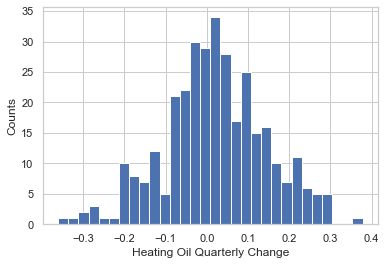

In [671]:
plt.hist(QonQ_main_roll_heatoil['Heating Oil'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Heating Oil Quarterly Change')

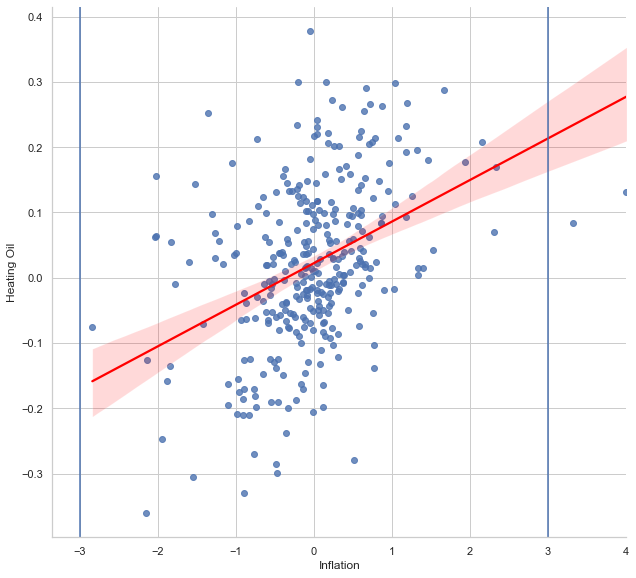

In [672]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Heating Oil",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_heatoil, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

Some others may be deemed as outliers but we will work with these based on a ±40% protocal

Next is `Lean Hogs`.

In [673]:
# Putting it together with inflation
QonQ_main_roll_hogs = Q_cpi_leanhogs_roll_2.merge(Q_leanhogs_roll_2, how='left', on='Date')

# QonQ_main_roll = QonQ_main_roll[Q_cpi.index.dayofweek < 5]

QonQ_main_roll_hogs.columns = ['Inflation',
                              'Lean Hogs']

QonQ_main_roll_hogs = QonQ_main_roll_hogs.dropna()

Text(0.5, 0, 'Lean Hogs Quarterly Change')

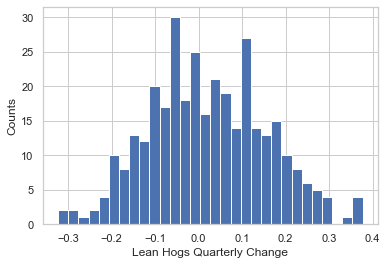

In [674]:
plt.hist(QonQ_main_roll_hogs['Lean Hogs'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Lean Hogs Quarterly Change')

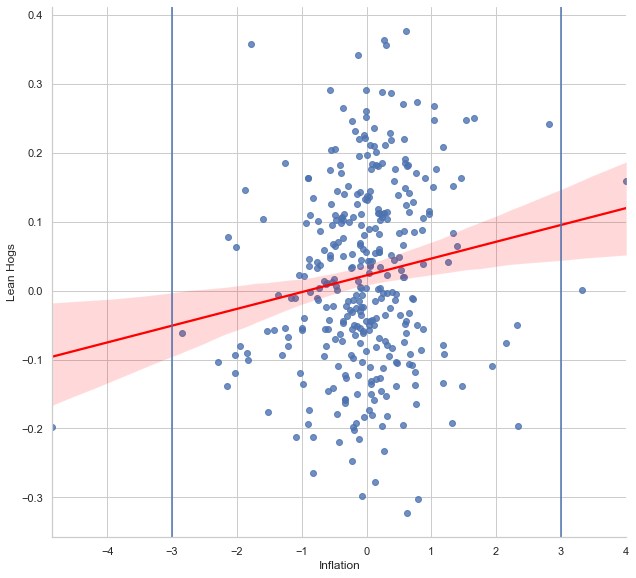

In [675]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Lean Hogs",
                 height=8, aspect=1.1,
                 data=QonQ_main_roll_hogs, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

In [676]:
hogs_out = np.abs(stats.zscore(QonQ_main_roll_hogs['Lean Hogs']))
hogs_thresh = 3
print(np.where( hogs_out >= hogs_thresh ))

(array([], dtype=int64),)


In [677]:
QonQ_main_roll_hogs['Lean Hogs'].min(),QonQ_main_roll_hogs['Lean Hogs'].max()

(-0.32285296003078745, 0.37670594668494467)

Although I'm not impressed with it's contribution as a whole we will keep `Lean Hogs` as is.

We will continue with no removals.

**The remaining variables require us to concat them together and then seperate them with inflation individually.**

In [678]:
# ( Complete ) Weekly | Initial Jobless Claims
Q_intjobs_3 = int_job_claims.diff(periods=12)

# ( Complete ) Mnthly | Capacity Utilization, Wages, Inflation
Q_caputil_3 = cap_util.pct_change(periods=3)
Q_wages_3 = wages_cpi.pct_change(periods=3)
Q_cpi_3 = cpi.diff(periods=3)
Q_unrate_3 = unrate.diff(periods=3)

# ( Complete ) Quarterly | GDP, Velocity of Money
Q_gdp_3 = gdp.pct_change(periods=1)
Q_m2_velo_3 = m2_velo.pct_change(periods=1)


In [679]:
# ( Complete ) Weekly | Initial Jobless Claims
Q_intjobs_roll_3 = Q_intjobs_3.rolling(12).mean()

# ( Complete ) Mnthly | Capacity Utilization, Wages, Inflation
Q_caputil_roll_3 = Q_caputil_3.rolling(3).mean()
Q_wages_roll_3 = Q_wages_3.rolling(3).mean()
Q_unrate_roll_3 = Q_unrate_3.rolling(3).mean()

# ( Complete ) Quarterly | GDP, Velocity of Money
Q_gdp_3 = Q_gdp_3.pct_change(periods=1)
Q_m2_velo_3 = Q_m2_velo_3.pct_change(periods=1)

In [680]:
# Building out the variables first with a roll & forward fill
QonQ_vars_roll_3 = pd.concat([Q_intjobs_roll_3,Q_caputil_roll_3,Q_wages_roll_3,Q_unrate_roll_3,
                            Q_gdp_3,Q_m2_velo_3
                      ],
                      axis = 1, ignore_index=False)

QonQ_vars_roll_3.columns= ['Initial Jobless Claims','Capacity Utilization','Wages CPI',
                         'Unemployment Rate','GDP','M2 Velocity'
                   ]

QonQ_vars_roll_3.index.names = ["Date"]
QonQ_vars_roll_3 = QonQ_vars_roll_3.fillna(method='ffill')

# vars_mnth.tail()

In [681]:
QonQ_vars_roll_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3625 entries, 1946-01-01 to 2021-02-20
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Initial Jobless Claims  3353 non-null   float64
 1   Capacity Utilization    3356 non-null   float64
 2   Wages CPI               3616 non-null   float64
 3   Unemployment Rate       3604 non-null   float64
 4   GDP                     3615 non-null   float64
 5   M2 Velocity             3471 non-null   float64
dtypes: float64(6)
memory usage: 198.2 KB


In [682]:
QonQ_vars_roll_3['Initial Jobless Claims'].tail(3355)

Date
1967-06-03             NaN
1967-06-10             NaN
1967-06-17    14416.666667
1967-06-24     6750.000000
1967-07-01    -1416.666667
                  ...     
2021-01-23   -58250.000000
2021-01-30   -17083.333333
2021-02-06    13166.666667
2021-02-13    25750.000000
2021-02-20    41666.666667
Name: Initial Jobless Claims, Length: 3355, dtype: float64

In [683]:
QonQ_vars_roll_3 = QonQ_vars_roll_3.loc['1967-06-17':today_y_m_d_dash]
QonQ_vars_roll_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3353 entries, 1967-06-17 to 2021-02-20
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Initial Jobless Claims  3353 non-null   float64
 1   Capacity Utilization    3353 non-null   float64
 2   Wages CPI               3353 non-null   float64
 3   Unemployment Rate       3353 non-null   float64
 4   GDP                     3353 non-null   float64
 5   M2 Velocity             3353 non-null   float64
dtypes: float64(6)
memory usage: 183.4 KB


In [684]:
# Putting them together with inflation
QonQ_main_cpi_roll = Q_cpi_wages_roll_2.merge(QonQ_vars_roll_3, how='left', on='Date')

# QonQ_main_roll = QonQ_main_roll[Q_cpi.index.dayofweek < 5]

QonQ_main_cpi_roll.columns = ['Inflation','Initial Jobless Claims','Capacity Utilization','Wages CPI',
                         'Unemployment Rate','GDP','M2 Velocity']

QonQ_main_cpi_roll = QonQ_main_cpi_roll.dropna()

In [685]:
QonQ_main_cpi_roll.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 1967-09-30 to 2020-10-31
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Inflation               93 non-null     float64
 1   Initial Jobless Claims  93 non-null     float64
 2   Capacity Utilization    93 non-null     float64
 3   Wages CPI               93 non-null     float64
 4   Unemployment Rate       93 non-null     float64
 5   GDP                     93 non-null     float64
 6   M2 Velocity             93 non-null     float64
dtypes: float64(7)
memory usage: 5.8 KB


Now to pull each into a seperate dataframe to assess individually.

In [686]:
# This is where you will pull later
cpi_caputil = QonQ_main_cpi_roll[['Inflation','Capacity Utilization']].copy()
cpi_wagescpi = QonQ_main_cpi_roll[['Inflation','Wages CPI']].copy()
cpi_unemp_rate = QonQ_main_cpi_roll[['Inflation','Unemployment Rate']].copy()
cpi_gdp_new = QonQ_main_cpi_roll[['Inflation','GDP']].copy()
cpi_velo_money = QonQ_main_cpi_roll[['Inflation','M2 Velocity']].copy()
cpi_intjobs = QonQ_main_cpi_roll[['Inflation','Initial Jobless Claims']].copy()

Now we will play with `Capacity Utilization`.

Text(0.5, 0, 'Capacity Utilization Change')

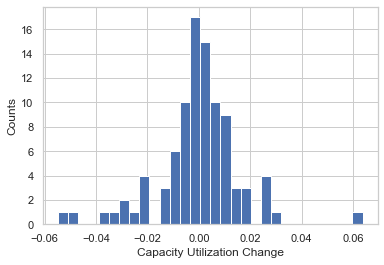

In [687]:
plt.hist(cpi_caputil['Capacity Utilization'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Capacity Utilization Change')

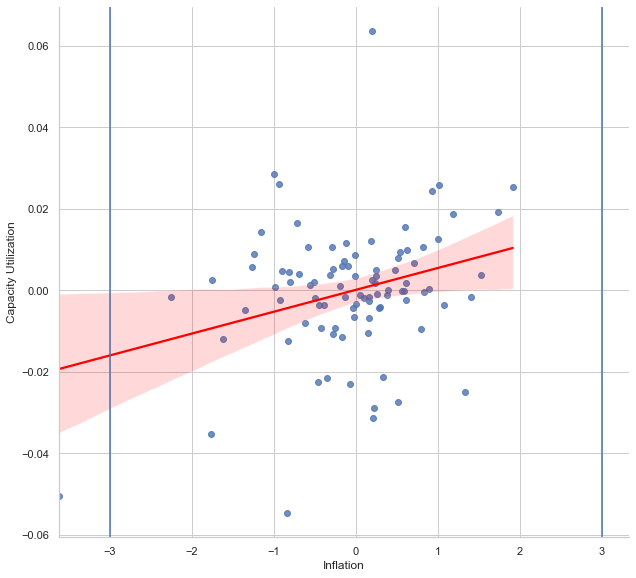

In [688]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Capacity Utilization",
                 height=8, aspect=1.1,
                 data=cpi_caputil, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

Fairly clear that ±4% may be the boundaries; let's check.

In [689]:
caputil_outliers = np.abs(stats.zscore(cpi_caputil['Capacity Utilization']))
cap_thresh = 3
print(np.where( caputil_outliers >= cap_thresh ))

(array([70, 71, 92], dtype=int64),)


In [690]:
cpi_caputil['Capacity Utilization'][70],cpi_caputil['Capacity Utilization'][71],cpi_caputil['Capacity Utilization'][92]

(-0.0505237359421928, -0.054713257511720105, 0.06370140548844809)

One of them is a little hard to see & would be removed whe `Inflation` is scaled but we will remove all.

In [691]:
drop_cap_rows = [ 70, 71, 92 ]
cpi_caputil.drop(cpi_caputil.index[drop_cap_rows], inplace=True)

Text(0.5, 0, 'Capacity Utilization Change')

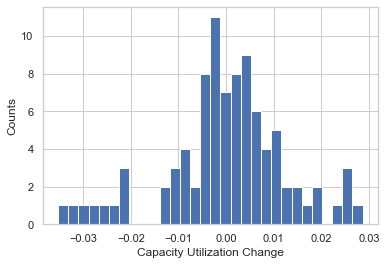

In [692]:
plt.hist(cpi_caputil['Capacity Utilization'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Capacity Utilization Change')

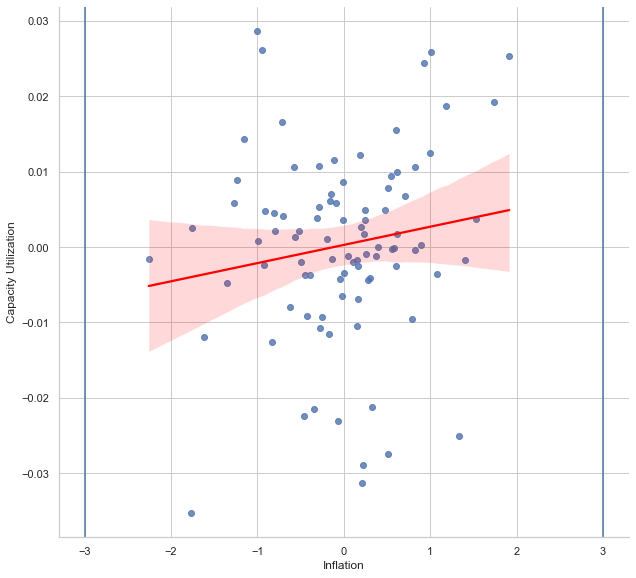

In [693]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Capacity Utilization",
                 height=8, aspect=1.1,
                 data=cpi_caputil, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

In [694]:
cpi_caputil['Capacity Utilization'].min(),cpi_caputil['Capacity Utilization'].max()

(-0.03527496871399027, 0.028656210202382182)

Let's proceed; next `Wages CPI`

Text(0.5, 0, 'Wages CPI Change')

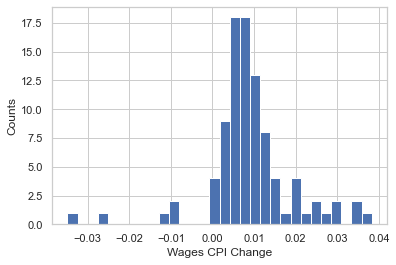

In [695]:
plt.hist(cpi_wagescpi['Wages CPI'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Wages CPI Change')

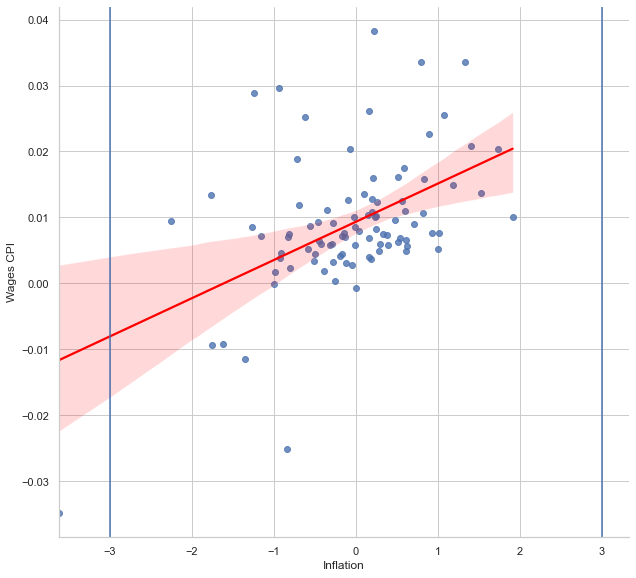

In [696]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Wages CPI",
                 height=8, aspect=1.1,
                 data=cpi_wagescpi, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

In [697]:
cpi_wagescpi['Wages CPI'].min(),cpi_wagescpi['Wages CPI'].max()

(-0.03486444203390904, 0.038299324597635964)

I believe this is workable; next `Unemployment`

Text(0.5, 0, 'Unemployment Rate Change')

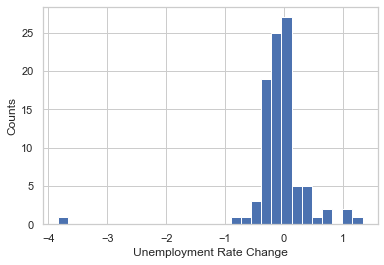

In [698]:
plt.hist(cpi_unemp_rate['Unemployment Rate'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Unemployment Rate Change')

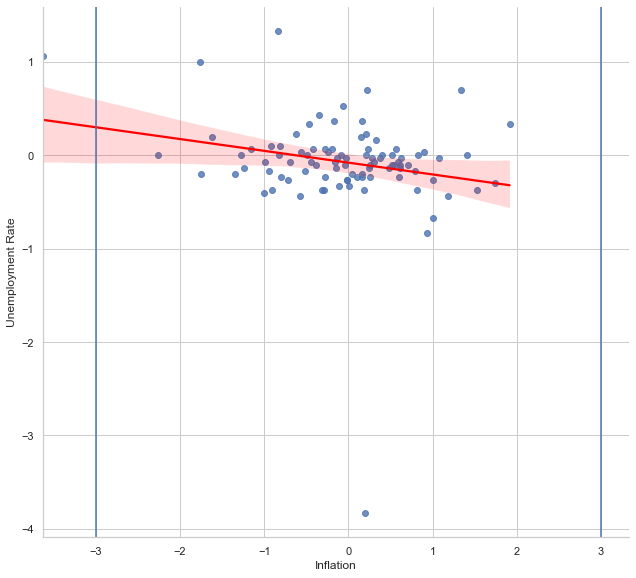

In [699]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Unemployment Rate",
                 height=8, aspect=1.1,
                 data=cpi_unemp_rate, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

One obvious outlier; let's continue.

In [700]:
unempl_outliers = np.abs(stats.zscore(cpi_unemp_rate['Unemployment Rate']))
cap_thresh = 3
print(np.where( unempl_outliers >= cap_thresh ))

(array([92], dtype=int64),)


In [701]:
cpi_unemp_rate['Unemployment Rate'][92]

-3.833333333333331

In [702]:
drop_unempl_rows = [ 92 ]
cpi_unemp_rate.drop(cpi_unemp_rate.index[drop_unempl_rows], inplace=True)

Text(0.5, 0, 'Unemployment Rate Change')

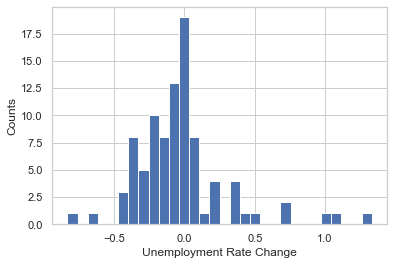

In [703]:
plt.hist(cpi_unemp_rate['Unemployment Rate'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Unemployment Rate Change')

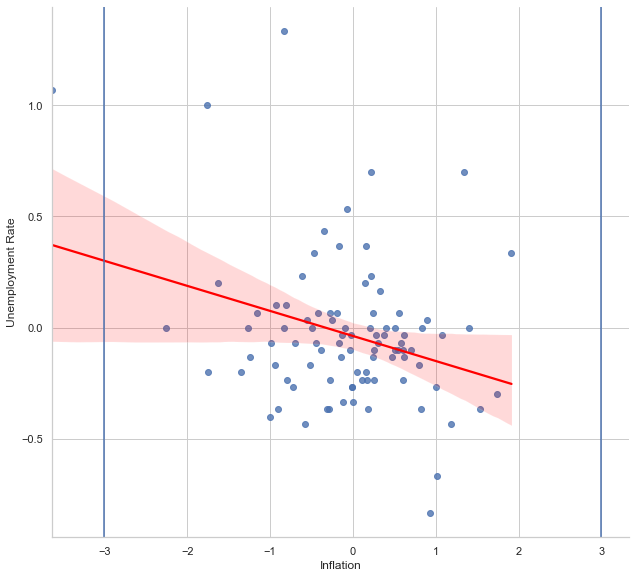

In [704]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Unemployment Rate",
                 height=8, aspect=1.1,
                 data=cpi_unemp_rate, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

Visually there may be "some" albeit let's check.

In [705]:
unempl_outliers = np.abs(stats.zscore(cpi_unemp_rate['Unemployment Rate']))
cap_thresh = 3
print(np.where( unempl_outliers >= cap_thresh ))

(array([13, 70, 71], dtype=int64),)


In [706]:
cpi_unemp_rate['Unemployment Rate'][13],cpi_unemp_rate['Unemployment Rate'][70],cpi_unemp_rate['Unemployment Rate'][71]

(1.0000000000000007, 1.066666666666667, 1.333333333333334)

Establishing a ±1% may be fitting; we will scrape the last 2.

In [707]:
unem_drop = [ 70, 71 ]
cpi_unemp_rate.drop(cpi_unemp_rate.index[unem_drop], inplace=True)

Text(0.5, 0, 'Unemployment Rate Change')

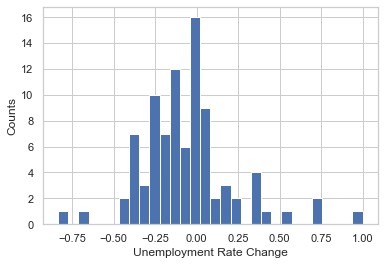

In [708]:
plt.hist(cpi_unemp_rate['Unemployment Rate'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Unemployment Rate Change')

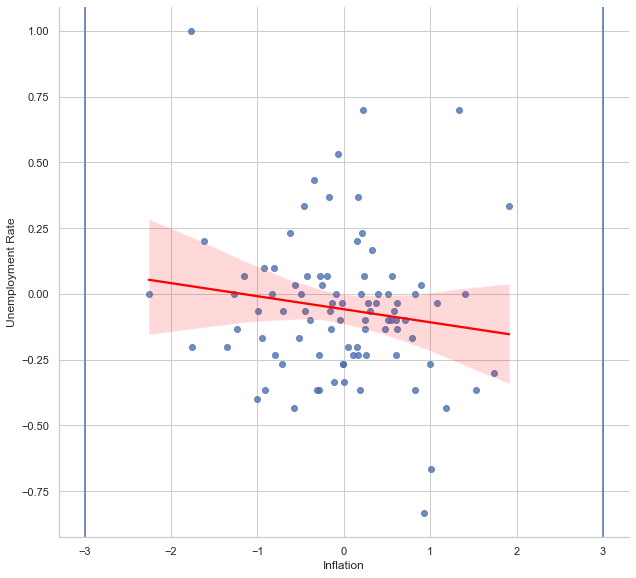

In [709]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Unemployment Rate",
                 height=8, aspect=1.1,
                 data=cpi_unemp_rate, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

In [710]:
cpi_unemp_rate['Unemployment Rate'].min(),cpi_unemp_rate['Unemployment Rate'].max()

(-0.8333333333333325, 1.0000000000000007)

Next `M2 Velocity`

In [711]:
cpi_velo_money.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 1967-09-30 to 2020-10-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Inflation    93 non-null     float64
 1   M2 Velocity  93 non-null     float64
dtypes: float64(2)
memory usage: 4.7 KB


In [712]:
cpi_velo_money['M2 Velocity'].sort_values()

Date
1986-05-31         -inf
1985-11-30         -inf
1998-10-31         -inf
2006-09-30         -inf
1970-01-31   -17.009024
                ...    
1968-11-30     1.671291
2020-02-29     2.098925
1970-10-31     3.801733
2001-03-31     5.879636
2009-10-31     6.491218
Name: M2 Velocity, Length: 93, dtype: float64

In [713]:
cpi_velo_money = cpi_velo_money.replace([np.inf, -np.inf], np.nan)
cpi_velo_money = cpi_velo_money.dropna()

In [714]:
cpi_velo_money['M2 Velocity'].sort_values()

Date
1970-01-31   -17.009024
1970-02-28   -17.009024
1997-05-31    -8.506900
2002-08-31    -7.323703
1973-03-31    -4.512552
                ...    
1968-11-30     1.671291
2020-02-29     2.098925
1970-10-31     3.801733
2001-03-31     5.879636
2009-10-31     6.491218
Name: M2 Velocity, Length: 89, dtype: float64

Text(0.5, 0, 'M2 Velocity Change')

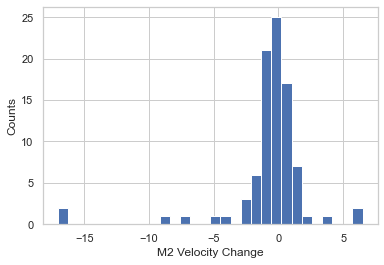

In [715]:
plt.hist(cpi_velo_money['M2 Velocity'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('M2 Velocity Change')

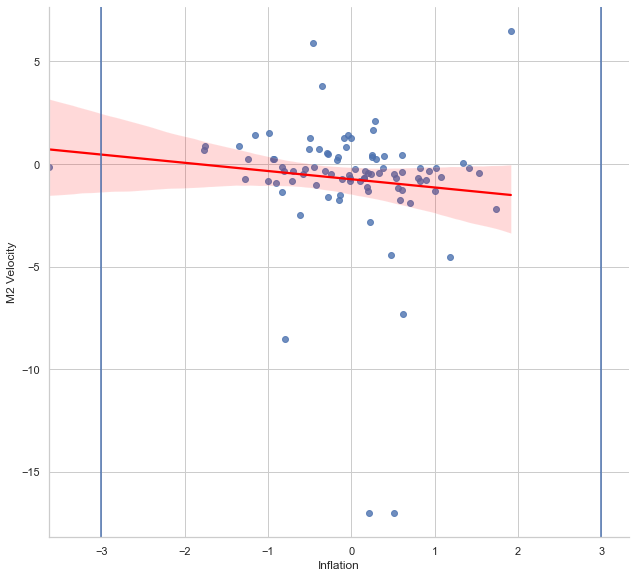

In [716]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="M2 Velocity",
                 height=8, aspect=1.1,
                 data=cpi_velo_money, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

In [717]:
money_velo_outliers = np.abs(stats.zscore(cpi_velo_money['M2 Velocity']))
velo_thresh = 3
print(np.where( money_velo_outliers >= velo_thresh ))

(array([4, 5], dtype=int64),)


In [718]:
cpi_velo_money['M2 Velocity'][4],cpi_velo_money['M2 Velocity'][5]

(-17.009024252677573, -17.009024252677573)

In [719]:
velo_drop = [ 4, 5 ]
cpi_velo_money.drop(cpi_velo_money.index[velo_drop], inplace=True)

Text(0.5, 0, 'M2 Velocity Change')

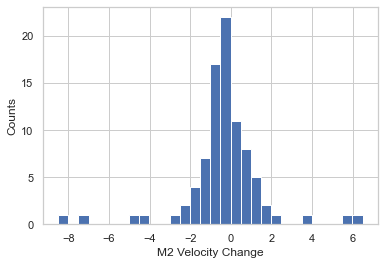

In [720]:
plt.hist(cpi_velo_money['M2 Velocity'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('M2 Velocity Change')

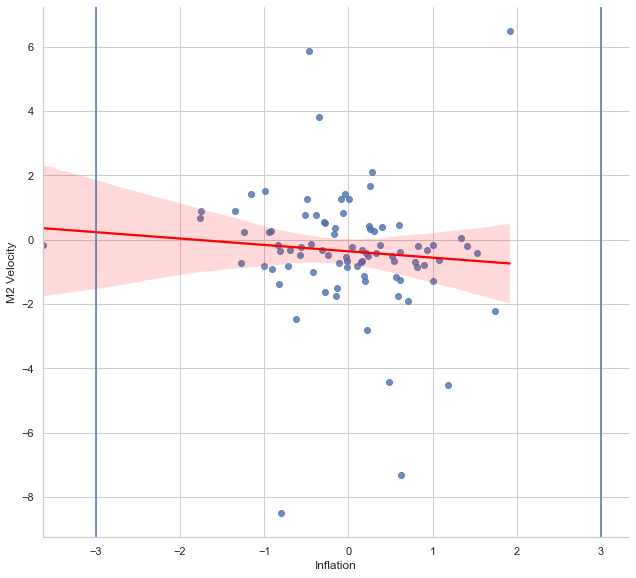

In [721]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="M2 Velocity",
                 height=8, aspect=1.1,
                 data=cpi_velo_money, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

In [722]:
money_velo_outliers = np.abs(stats.zscore(cpi_velo_money['M2 Velocity']))
velo_thresh = 3
print(np.where( money_velo_outliers >= velo_thresh ))

(array([47, 52, 54, 66], dtype=int64),)


In [723]:
cpi_velo_money['M2 Velocity'][47],cpi_velo_money['M2 Velocity'][52],cpi_velo_money['M2 Velocity'][54],cpi_velo_money['M2 Velocity'][66]

(-8.506899724010609, 5.879635828089331, -7.323703328265002, 6.491217798594918)

I feel comfortable dropping these.

In [724]:
velo_drop = [ 47, 52, 54, 66 ]
cpi_velo_money.drop(cpi_velo_money.index[velo_drop], inplace=True)

Text(0.5, 0, 'M2 Velocity Change')

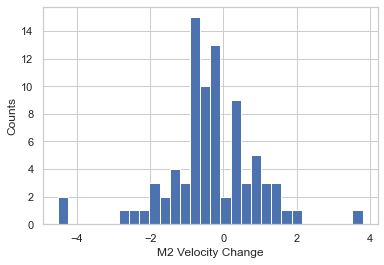

In [725]:
plt.hist(cpi_velo_money['M2 Velocity'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('M2 Velocity Change')

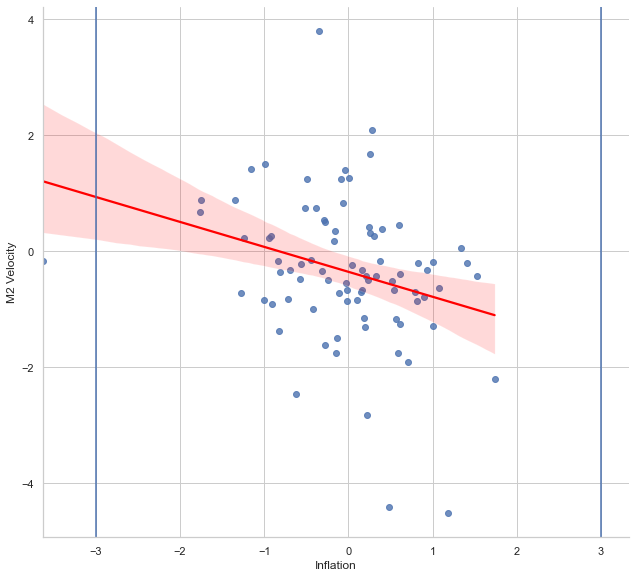

In [726]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="M2 Velocity",
                 height=8, aspect=1.1,
                 data=cpi_velo_money, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

I will take a look at where these are.

In [727]:
money_velo_outliers = np.abs(stats.zscore(cpi_velo_money['M2 Velocity']))
velo_thresh = 3
print(np.where( money_velo_outliers >= velo_thresh ))

(array([4, 6, 7], dtype=int64),)


In [728]:
cpi_velo_money['M2 Velocity'][4],cpi_velo_money['M2 Velocity'][6],cpi_velo_money['M2 Velocity'][7]

(3.8017332095326237, -4.414478651119822, -4.51255230125515)

Let's drop these.

In [729]:
velo_drop = [ 4, 6, 7 ]
cpi_velo_money.drop(cpi_velo_money.index[velo_drop], inplace=True)

Text(0.5, 0, 'M2 Velocity Change')

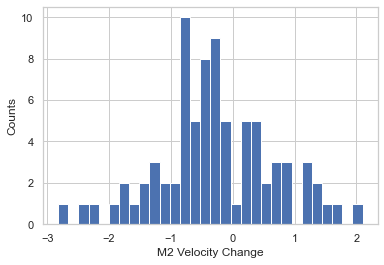

In [730]:
plt.hist(cpi_velo_money['M2 Velocity'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('M2 Velocity Change')

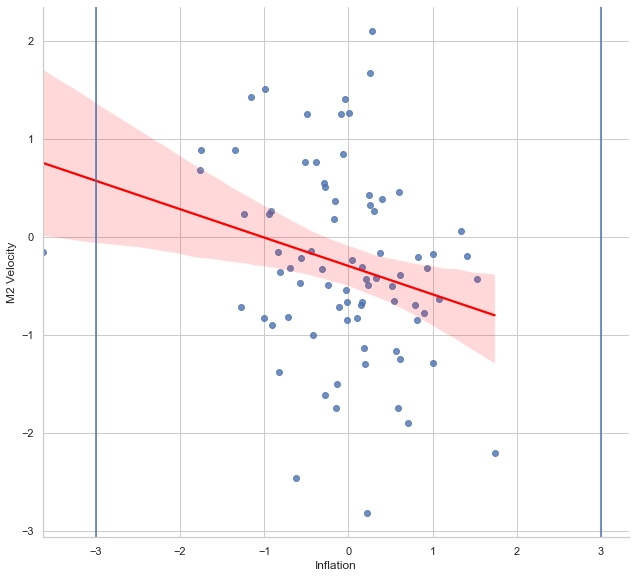

In [731]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="M2 Velocity",
                 height=8, aspect=1.1,
                 data=cpi_velo_money, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

In [732]:
cpi_velo_money['M2 Velocity'].min(),cpi_velo_money['M2 Velocity'].max()

(-2.8215623327982877, 2.0989247311827866)

I find it strange that these are negatively correlated but we will work with these.

Next `GDP`

Text(0.5, 0, 'GDP Change')

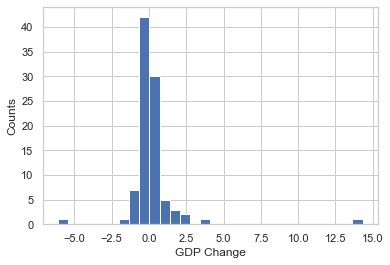

In [733]:
plt.hist(cpi_gdp_new['GDP'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('GDP Change')

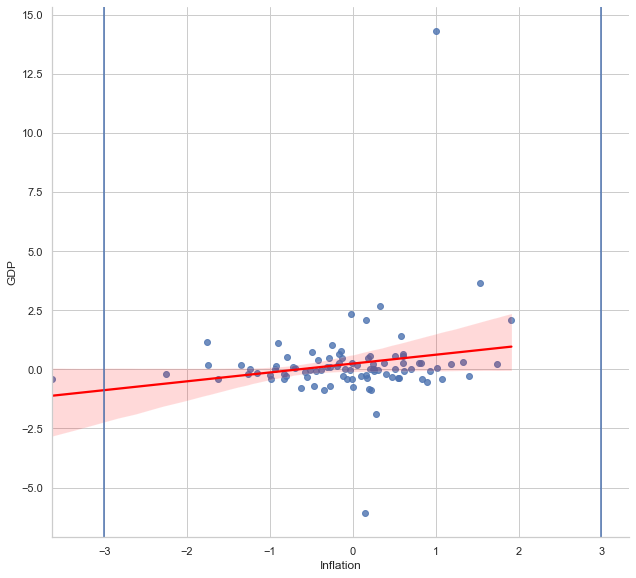

In [734]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="GDP",
                 height=8, aspect=1.1,
                 data=cpi_gdp_new, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

Obvious outliers; let's investigate futher.

In [735]:
gdp_outliers = np.abs(stats.zscore(cpi_gdp_new['GDP']))
cap_thresh = 3
print(np.where( gdp_outliers >= cap_thresh ))

(array([69, 80], dtype=int64),)


In [736]:
cpi_gdp_new['GDP'][69],cpi_gdp_new['GDP'][80]

(-6.084806692182221, 14.311552961833272)

In [737]:
gdp_drop= [ 69, 80 ]
cpi_gdp_new.drop(cpi_gdp_new.index[gdp_drop], inplace=True)

Text(0.5, 0, 'GDP Change')

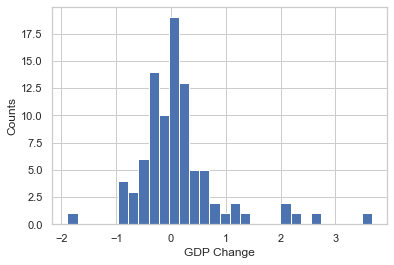

In [738]:
plt.hist(cpi_gdp_new['GDP'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('GDP Change')

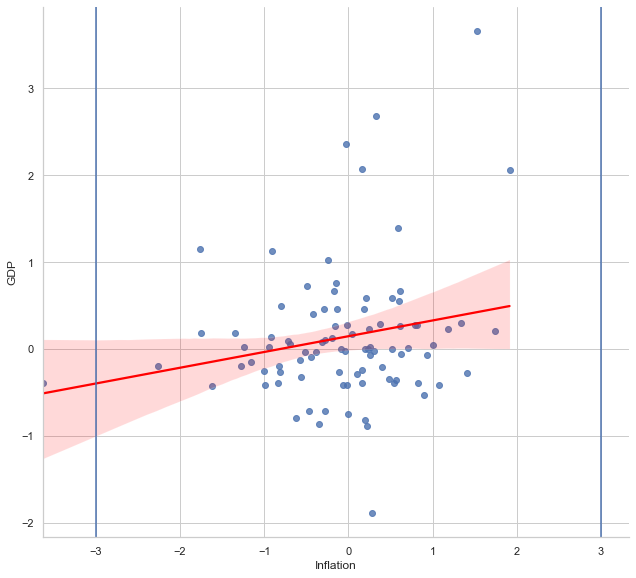

In [739]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="GDP",
                 height=8, aspect=1.1,
                 data=cpi_gdp_new, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

Let's take one more look.

In [740]:
gdp_outlierz = np.abs(stats.zscore(cpi_gdp_new['GDP']))
cap_thresh = 3
print(np.where( gdp_outlierz >= cap_thresh ))

(array([58, 73], dtype=int64),)


In [741]:
cpi_gdp_new['GDP'][58],cpi_gdp_new['GDP'][73]

(2.6787120209768776, 3.6624858059001975)

If we dropped the first it would be difficult to clearly set the boundaries. In the spirit of not overfitting we will only clear the outlier +3.

In [742]:
gdp_droping = [ 73 ]
cpi_gdp_new.drop(cpi_gdp_new.index[gdp_droping], inplace=True)

Text(0.5, 0, 'GDP Change')

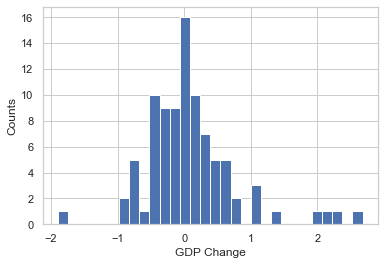

In [743]:
plt.hist(cpi_gdp_new['GDP'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('GDP Change')

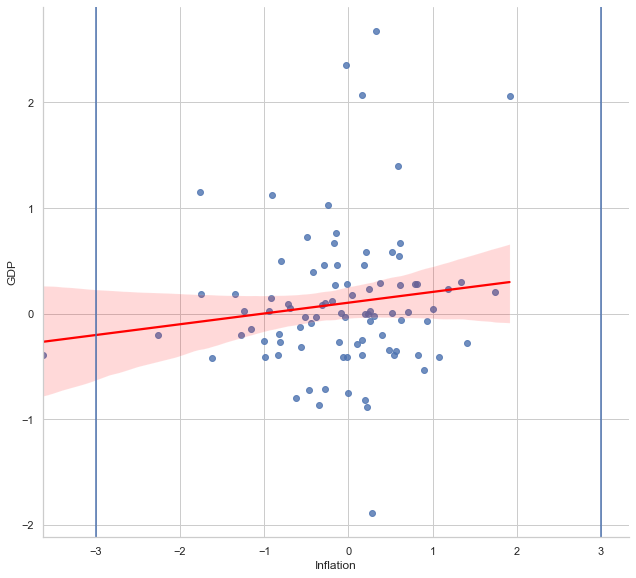

In [744]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="GDP",
                 height=8, aspect=1.1,
                 data=cpi_gdp_new, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

In [745]:
cpi_gdp_new['GDP'].min()

-1.8909183066642323

Not supper beautiful but let's work with this; next & final `Initial Jobless Claims`

Text(0.5, 0, 'Initial Jobless Claims')

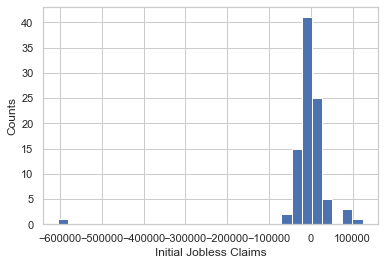

In [746]:
plt.hist(cpi_intjobs['Initial Jobless Claims'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Initial Jobless Claims')

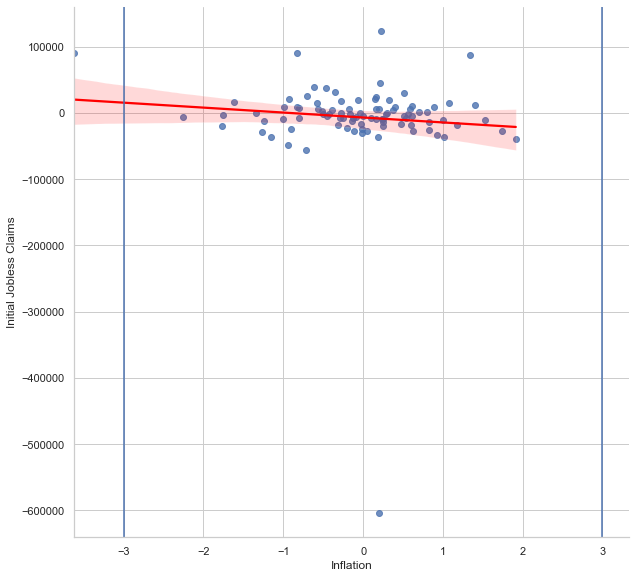

In [747]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Initial Jobless Claims",
                 height=8, aspect=1.1,
                 data=cpi_intjobs, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

Let's go.

In [748]:
intjob_outliers = np.abs(stats.zscore(cpi_intjobs['Initial Jobless Claims']))
cap_thresh = 3
print(np.where( intjob_outliers >= cap_thresh ))

(array([92], dtype=int64),)


In [749]:
cpi_intjobs['Initial Jobless Claims'][92]

-604333.3333333334

In [750]:
intjobs_droping = [ 92 ]
cpi_intjobs.drop(cpi_intjobs.index[intjobs_droping], inplace=True)

Text(0.5, 0, 'Initial Jobless Claims')

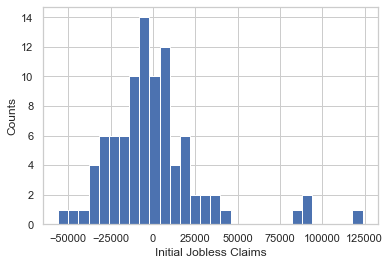

In [751]:
plt.hist(cpi_intjobs['Initial Jobless Claims'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Initial Jobless Claims')

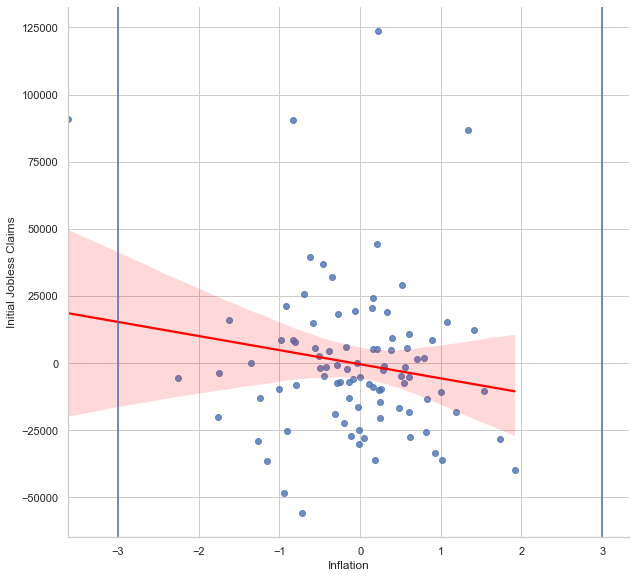

In [752]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Initial Jobless Claims",
                 height=8, aspect=1.1,
                 data=cpi_intjobs, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

In [753]:
intjob_outliers_2 = np.abs(stats.zscore(cpi_intjobs['Initial Jobless Claims']))
cap_thresh = 3
print(np.where( intjob_outliers_2 >= cap_thresh ))

(array([12, 21, 70, 71], dtype=int64),)


In [754]:
cpi_intjobs['Initial Jobless Claims'][12],cpi_intjobs['Initial Jobless Claims'][21],cpi_intjobs['Initial Jobless Claims'][70],cpi_intjobs['Initial Jobless Claims'][71]

(86666.66666666667, 123750.0, 90916.66666666667, 90500.0)

Unlike previous variables, I am happy to remove all listed above. Please also note, one does fall outside the `Inflation` scraping range but we will still remove.

In [755]:
intjobs_droping = [ 12, 21, 70, 71 ]
cpi_intjobs.drop(cpi_intjobs.index[intjobs_droping], inplace=True)

Text(0.5, 0, 'Initial Jobless Claims')

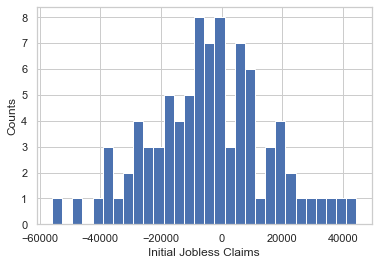

In [756]:
plt.hist(cpi_intjobs['Initial Jobless Claims'], density=False, bins=30)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Initial Jobless Claims')

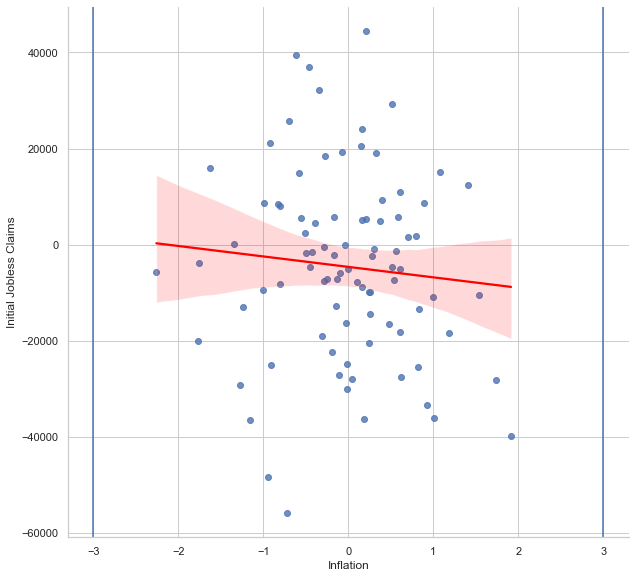

In [757]:
sns.set_color_codes()
sns.lmplot(x="Inflation", y="Initial Jobless Claims",
                 height=8, aspect=1.1,
                 data=cpi_intjobs, line_kws={'color': 'red'})
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.axvline(-3, 0, 1, label='pyplot vertical line')

In [758]:
cpi_intjobs['Initial Jobless Claims'].min()

-55916.666666666664

We have already scraped 5 so I will work with the above.

Now that they have been individually addressed, the next step is to merge all of the variables together with a forward fill.

First the variables but to obtain them individually we need to remove cpi from each.

In [759]:
# The recently completed ones

cpi_wagescpi_var = cpi_wagescpi[['Wages CPI']].copy()
cpi_caputil_var = cpi_caputil[['Capacity Utilization']].copy()
cpi_unemp_rate_var = cpi_unemp_rate[['Unemployment Rate']].copy()
cpi_gdp_new_var = cpi_gdp_new[['GDP']].copy()
cpi_intjobs_var = cpi_intjobs[['Initial Jobless Claims']].copy()
cpi_velo_money_vars = cpi_velo_money[['M2 Velocity']].copy()

In [760]:
# The completed ones before

QonQ_main_roll_WTI_var = QonQ_main_roll_WTI[['WTI']].copy()
QonQ_main_roll_Lumber_var = QonQ_main_roll_Lumber[['Lumber']].copy()
QonQ_main_roll_sugar_var = QonQ_main_roll_sugar[['Sugar']].copy()
QonQ_main_roll_wheat_var = QonQ_main_roll_wheat[['Wheat']].copy()
QonQ_main_roll_copper_var = QonQ_main_roll_copper[['Copper']].copy()
QonQ_main_roll_corn_var = QonQ_main_roll_corn[['Corn']].copy()
QonQ_main_roll_cattle_var = QonQ_main_roll_cattle[['Cattle']].copy()
QonQ_main_roll_dixie_var = QonQ_main_roll_dixie[['US Dollar Index']].copy()
QonQ_main_roll_soybeans_var = QonQ_main_roll_soybeans[['Soybeans']].copy()
QonQ_main_roll_heatoil_var = QonQ_main_roll_heatoil[['Heating Oil']].copy()
QonQ_main_roll_hogs_var = QonQ_main_roll_hogs[['Lean Hogs']].copy()

In [761]:
# Building out the variables first with a roll & forward fill

QonQ_vars_roll_post = pd.concat([QonQ_main_roll_heatoil_var,QonQ_main_roll_WTI_var,cpi_wagescpi_var,
                                 cpi_gdp_new_var,cpi_caputil_var,cpi_velo_money_vars,QonQ_main_roll_copper_var,QonQ_main_roll_sugar_var,
                                 QonQ_main_roll_hogs_var,QonQ_main_roll_corn_var,QonQ_main_roll_Lumber_var,
                                 QonQ_main_roll_soybeans_var,QonQ_main_roll_cattle_var,QonQ_main_roll_wheat_var,
                                 cpi_unemp_rate_var,QonQ_main_roll_dixie_var,cpi_intjobs_var
                       ],
                       axis = 1, ignore_index=False)
 
QonQ_vars_roll_post.columns= ['Heating Oil','WTI','Wages CPI','GDP','Capacity Utilization','M2 Velocity',
                              'Copper','Sugar','Lean Hogs','Corn','Lumber','Soybeans','Cattle','Wheat','Unemployment Rate',
                              'USD Index','Initial Jobless Claims'                              
                    ]

QonQ_vars_roll_post.index.names = ["Date"]
QonQ_vars_roll_post = QonQ_vars_roll_post.fillna(method='ffill')

# vars_mnth.tail()

In [762]:
QonQ_vars_roll_post.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 446 entries, 1967-09-30 to 2021-01-31
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heating Oil             424 non-null    float64
 1   WTI                     393 non-null    float64
 2   Wages CPI               446 non-null    float64
 3   GDP                     446 non-null    float64
 4   Capacity Utilization    446 non-null    float64
 5   M2 Velocity             446 non-null    float64
 6   Copper                  337 non-null    float64
 7   Sugar                   424 non-null    float64
 8   Lean Hogs               424 non-null    float64
 9   Corn                    424 non-null    float64
 10  Lumber                  424 non-null    float64
 11  Soybeans                322 non-null    float64
 12  Cattle                  424 non-null    float64
 13  Wheat                   322 non-null    float64
 14  Unemployment Rate      

Take a look at your minimum which is `Soybeans` to loc the dataframe.

In [763]:
QonQ_vars_roll_post['Soybeans'].tail(324)

Date
1990-05-31         NaN
1990-06-30         NaN
1990-07-31    0.048360
1990-08-31    0.005202
1990-10-31    0.002314
                ...   
2020-09-30    0.088687
2020-10-31    0.088687
2020-11-30    0.189713
2020-12-31    0.212504
2021-01-31    0.247356
Name: Soybeans, Length: 324, dtype: float64

In [764]:
QonQ_vars_roll_post = QonQ_vars_roll_post.loc['1990-07-31':today_y_m_d_dash]

In [765]:
QonQ_vars_roll_post.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 322 entries, 1990-07-31 to 2021-01-31
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heating Oil             322 non-null    float64
 1   WTI                     322 non-null    float64
 2   Wages CPI               322 non-null    float64
 3   GDP                     322 non-null    float64
 4   Capacity Utilization    322 non-null    float64
 5   M2 Velocity             322 non-null    float64
 6   Copper                  322 non-null    float64
 7   Sugar                   322 non-null    float64
 8   Lean Hogs               322 non-null    float64
 9   Corn                    322 non-null    float64
 10  Lumber                  322 non-null    float64
 11  Soybeans                322 non-null    float64
 12  Cattle                  322 non-null    float64
 13  Wheat                   322 non-null    float64
 14  Unemployment Rate      

We will start anew with cpi.

In [766]:
Q_cpi_master = cpi.diff(periods=3)

Let's merge them together.

In [767]:
QonQ_roll_appended = Q_cpi_master.merge(QonQ_vars_roll_post, how='left', on='Date')

QonQ_roll_appended.columns = ['Inflation','Heating Oil','WTI','Wages CPI','GDP','Capacity Utilization','M2 Velocity',
                              'Copper','Sugar','Lean Hogs','Corn','Lumber','Soybeans','Cattle','Wheat','Unemployment Rate',
                              'USD Index','Initial Jobless Claims']

QonQ_roll_appended = QonQ_roll_appended.dropna()

In [768]:
QonQ_roll_appended.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 322 entries, 1990-07-31 to 2021-01-31
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Inflation               322 non-null    float64
 1   Heating Oil             322 non-null    float64
 2   WTI                     322 non-null    float64
 3   Wages CPI               322 non-null    float64
 4   GDP                     322 non-null    float64
 5   Capacity Utilization    322 non-null    float64
 6   M2 Velocity             322 non-null    float64
 7   Copper                  322 non-null    float64
 8   Sugar                   322 non-null    float64
 9   Lean Hogs               322 non-null    float64
 10  Corn                    322 non-null    float64
 11  Lumber                  322 non-null    float64
 12  Soybeans                322 non-null    float64
 13  Cattle                  322 non-null    float64
 14  Wheat                  

Before we scrape `Inflation` we will take a look at how they currently correlate.

In [769]:
QonQ_roll_appended.corr(method='pearson')

Inflation  Heating Oil       WTI  Wages CPI       GDP  \
Inflation                1.000000     0.462869  0.485937   0.225119  0.061122   
Heating Oil              0.462869     1.000000  0.889394   0.196032  0.051520   
WTI                      0.485937     0.889394  1.000000   0.150995  0.038997   
Wages CPI                0.225119     0.196032  0.150995   1.000000  0.099726   
GDP                      0.061122     0.051520  0.038997   0.099726  1.000000   
Capacity Utilization     0.219150     0.191818  0.128480   0.147486 -0.111757   
M2 Velocity             -0.044030    -0.224271 -0.128444  -0.201308 -0.202357   
Copper                   0.281975     0.472324  0.511066   0.015212 -0.011301   
Sugar                    0.191750     0.231459  0.196207  -0.067596 -0.127804   
Lean Hogs                0.190010     0.123184  0.262108   0.170086  0.053458   
Corn                     0.231359     0.051853  0.102442   0.153932 -0.078642   
Lumber                   0.147605     0.113983  0.224374   0.038169  0.074362   
Soybeans                 0.171792     0.187893  0.243731   0.047912 -0.084747   
Cattle                   0.125391     0.196083  0.143890   0.190243 -0.067794   
Wheat                    0.116677     0.022571  0.043843   0.154746 -0.048005   
Unemployment Rate       -0.034698     0.036093  0.050177   0.028019  0.265087   
USD Index               -0.339413    -0.411348 -0.426752  -0.144636  0.055919   
Initial Jobless Claims  -0.211457    -0.138566 -0.143070  -0.244507 -0.068591   

                        Capacity Utilization  M2 Velocity    Copper     Sugar  \
Inflation                           0.219150    -0.044030  0.281975  0.191750   
Heating Oil                         0.191818    -0.224271  0.472324  0.231459   
WTI                                 0.128480    -0.128444  0.511066  0.196207   
Wages CPI                           0.147486    -0.201308  0.015212 -0.067596   
GDP                                -0.111757    -0.202357 -0.011301 -0.127804   
Capacity Utilization                1.000000    -0.053340  0.219757  0.134090   
M2 Velocity                        -0.053340     1.000000 -0.163868 -0.181769   
Copper                              0.219757    -0.163868  1.000000  0.303537   
Sugar                               0.134090    -0.181769  0.303537  1.000000   
Lean Hogs                           0.097880    -0.141773  0.186354 -0.134373   
Corn                                0.177976     0.046092  0.093419  0.098062   
Lumber                              0.000903     0.043581  0.204477 -0.028633   
Soybeans                            0.065932     0.097030  0.232222  0.155339   
Cattle                              0.183961    -0.194198  0.107460  0.069136   
Wheat                               0.206248     0.136593  0.115383  0.110030   
Unemployment Rate                  -0.437515     0.010970  0.071452 -0.030207   
USD Index                          -0.059104    -0.027828 -0.377438 -0.146019   
Initial Jobless Claims             -0.657022     0.013826 -0.137522 -0.075647   

                        Lean Hogs      Corn    Lumber  Soybeans    Cattle  \
Inflation                0.190010  0.231359  0.147605  0.171792  0.125391   
Heating Oil              0.123184  0.051853  0.113983  0.187893  0.196083   
WTI                      0.262108  0.102442  0.224374  0.243731  0.143890   
Wages CPI                0.170086  0.153932  0.038169  0.047912  0.190243   
GDP                      0.053458 -0.078642  0.074362 -0.084747 -0.067794   
Capacity Utilization     0.097880  0.177976  0.000903  0.065932  0.183961   
M2 Velocity             -0.141773  0.046092  0.043581  0.097030 -0.194198   
Copper                   0.186354  0.093419  0.204477  0.232222  0.107460   
Sugar                   -0.134373  0.098062 -0.028633  0.155339  0.069136   
Lean Hogs                1.000000  0.244356  0.275766  0.229591  0.104644   
Corn                     0.244356  1.000000  0.126829  0.715416  0.044792   
Lumber              

Text(0.5, 1.0, 'Quarter on Quarter Comparison ( with Rolling Averages on Daily & Weekly Variables )')

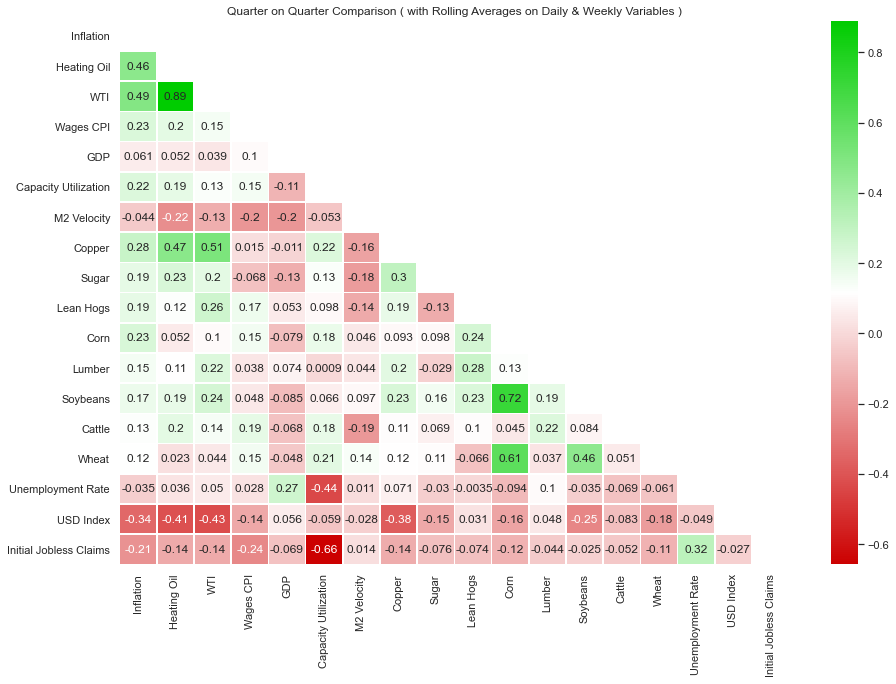

In [770]:
plt.subplots(figsize=(15,10))
matrix = np.triu(QonQ_roll_appended.corr())
sns.heatmap(QonQ_roll_appended.corr(), mask=matrix, linewidths=.5, cmap=GnRd, annot=True)
plt.title('Quarter on Quarter Comparison ( with Rolling Averages on Daily & Weekly Variables )')

We will now scrape `Inflation`.

Text(0, 0.5, 'Probability')

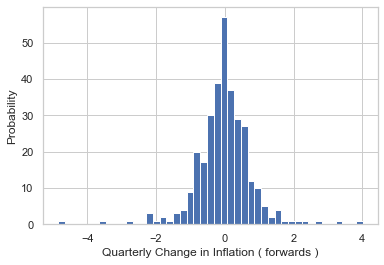

In [771]:
plt.hist(QonQ_roll_appended['Inflation'], bins=45)
plt.xlabel('Quarterly Change in Inflation ( forwards )')
plt.ylabel('Probability')

In [772]:
inf_out = np.abs(stats.zscore(QonQ_roll_appended['Inflation']))
inf_thresh = 3
print(np.where( inf_out >= inf_thresh ))

(array([163, 185, 186, 195, 196, 197], dtype=int64),)


The previous engagement with `Inflation` was ±300 bps; I would image it to be the same.

In [773]:
QonQ_roll_appended['Inflation'][163],QonQ_roll_appended['Inflation'][185],QonQ_roll_appended['Inflation'][186],QonQ_roll_appended['Inflation'][195],QonQ_roll_appended['Inflation'][196],QonQ_roll_appended['Inflation'][197]

(-2.84, -4.846, -3.625, 3.322, 4.007, 2.8089999999999997)

In [774]:
infl_drop = [ 185, 186, 195, 196 ]
QonQ_roll_appended.drop(QonQ_roll_appended.index[infl_drop], inplace=True)

Text(0, 0.5, 'Probability')

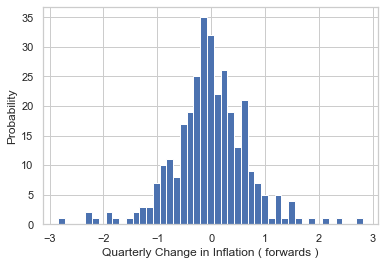

In [775]:
plt.hist(QonQ_roll_appended['Inflation'], bins=45)
plt.xlabel('Quarterly Change in Inflation ( forwards )')
plt.ylabel('Probability')

Let's see how well this approach panned out.

In [776]:
QonQ_roll_appended.corr(method='pearson')

Inflation  Heating Oil       WTI  Wages CPI       GDP  \
Inflation                1.000000     0.456372  0.444642   0.172434 -0.024130   
Heating Oil              0.456372     1.000000  0.890181   0.172097  0.037525   
WTI                      0.444642     0.890181  1.000000   0.101088  0.022908   
Wages CPI                0.172434     0.172097  0.101088   1.000000  0.082306   
GDP                     -0.024130     0.037525  0.022908   0.082306  1.000000   
Capacity Utilization     0.135035     0.172883  0.099957   0.126447 -0.160603   
M2 Velocity             -0.065294    -0.232354 -0.141988  -0.214203 -0.205973   
Copper                   0.209001     0.454515  0.487022  -0.031024 -0.040284   
Sugar                    0.166749     0.222212  0.184131  -0.091493 -0.149228   
Lean Hogs                0.154092     0.103719  0.238985   0.154130  0.044188   
Corn                     0.138725     0.011082  0.039388   0.112778 -0.105606   
Lumber                   0.096956     0.089702  0.190165   0.005323  0.070297   
Soybeans                 0.151124     0.167832  0.210419   0.017303 -0.079930   
Cattle                   0.082978     0.176844  0.108116   0.172142 -0.073012   
Wheat                    0.017605    -0.017398 -0.021662   0.116394 -0.063718   
Unemployment Rate       -0.060246     0.047950  0.079531   0.045154  0.245145   
USD Index               -0.256995    -0.384975 -0.380445  -0.095287  0.084108   
Initial Jobless Claims  -0.107904    -0.111909 -0.105616  -0.225499 -0.026371   

                        Capacity Utilization  M2 Velocity    Copper     Sugar  \
Inflation                           0.135035    -0.065294  0.209001  0.166749   
Heating Oil                         0.172883    -0.232354  0.454515  0.222212   
WTI                                 0.099957    -0.141988  0.487022  0.184131   
Wages CPI                           0.126447    -0.214203 -0.031024 -0.091493   
GDP                                -0.160603    -0.205973 -0.040284 -0.149228   
Capacity Utilization                1.000000    -0.056361  0.189799  0.115855   
M2 Velocity                        -0.056361     1.000000 -0.172345 -0.184250   
Copper                              0.189799    -0.172345  1.000000  0.291367   
Sugar                               0.115855    -0.184250  0.291367  1.000000   
Lean Hogs                           0.082507    -0.146410  0.167154 -0.145241   
Corn                                0.149811     0.041221  0.048157  0.082202   
Lumber                             -0.016019     0.039580  0.182589 -0.038548   
Soybeans                            0.065861     0.093367  0.218207  0.155027   
Cattle                              0.178011    -0.201173  0.084143  0.060967   
Wheat                               0.189039     0.133996  0.076625  0.098670   
Unemployment Rate                  -0.482983     0.015688  0.076299 -0.037948   
USD Index                          -0.020466    -0.021549 -0.342734 -0.129010   
Initial Jobless Claims             -0.638577     0.016928 -0.097208 -0.053406   

                        Lean Hogs      Corn    Lumber  Soybeans    Cattle  \
Inflation                0.154092  0.138725  0.096956  0.151124  0.082978   
Heating Oil              0.103719  0.011082  0.089702  0.167832  0.176844   
WTI                      0.238985  0.039388  0.190165  0.210419  0.108116   
Wages CPI                0.154130  0.112778  0.005323  0.017303  0.172142   
GDP                      0.044188 -0.105606  0.070297 -0.079930 -0.073012   
Capacity Utilization     0.082507  0.149811 -0.016019  0.065861  0.178011   
M2 Velocity             -0.146410  0.041221  0.039580  0.093367 -0.201173   
Copper                   0.167154  0.048157  0.182589  0.218207  0.084143   
Sugar                   -0.145241  0.082202 -0.038548  0.155027  0.060967   
Lean Hogs                1.000000  0.221620  0.260734  0.215185  0.089772   
Corn                     0.221620  1.000000  0.093141  0.713458  0.012839   
Lumber              

Text(0.5, 1.0, 'Quarter on Quarter Comparison ( with Rolling Averages on Daily & Weekly Variables )')

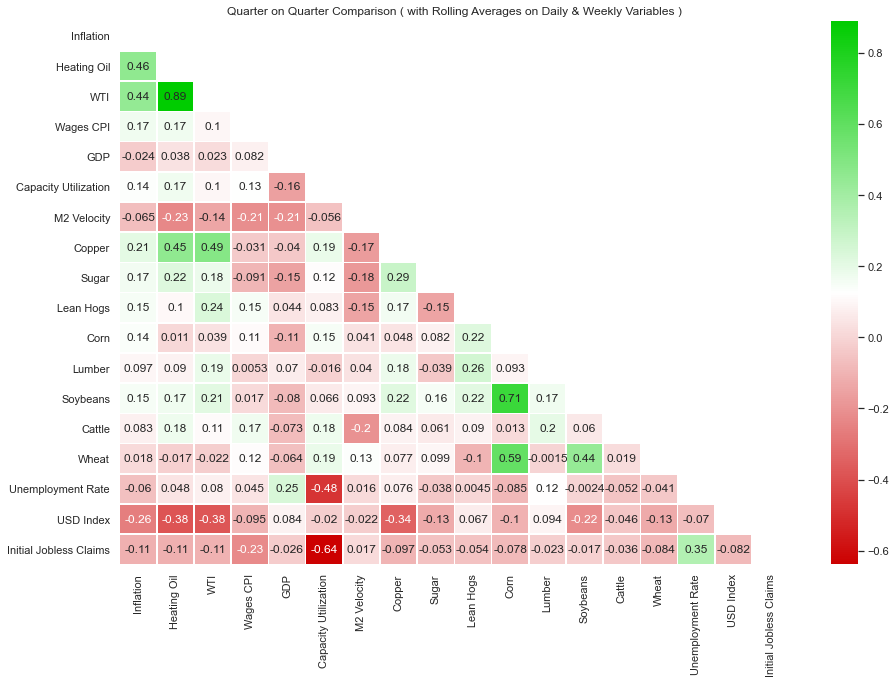

In [777]:
plt.subplots(figsize=(15,10))
matrix = np.triu(QonQ_roll_appended.corr())
sns.heatmap(QonQ_roll_appended.corr(), mask=matrix, linewidths=.5, cmap=GnRd, annot=True)
plt.title('Quarter on Quarter Comparison ( with Rolling Averages on Daily & Weekly Variables )')

With the only exception of the `USD Index`, all variables are posting less favorable results than the previous engagement ( 1.3.4 ). 

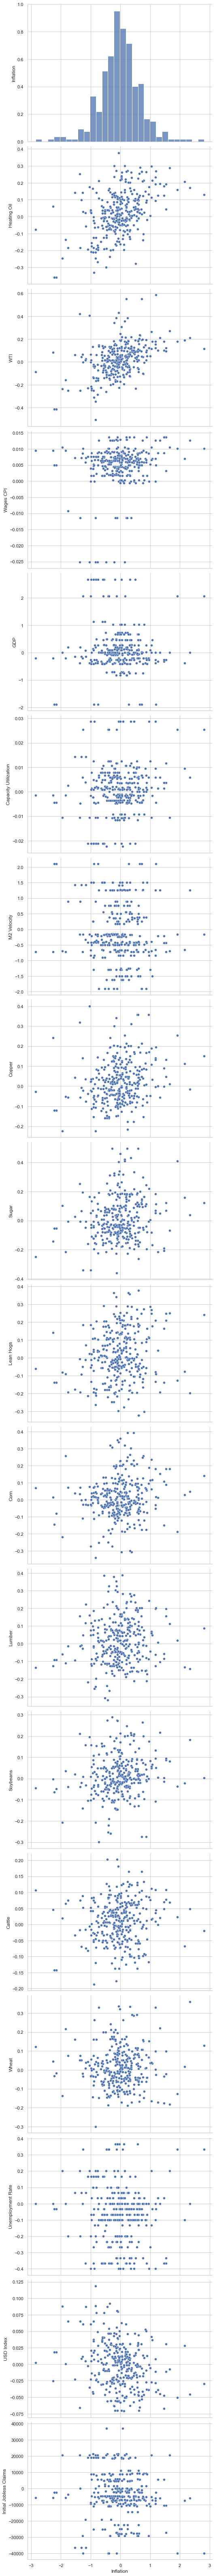

In [778]:
sns.pairplot(QonQ_roll_appended,
            y_vars=['Inflation','Heating Oil','WTI','Wages CPI','GDP','Capacity Utilization','M2 Velocity',
                              'Copper','Sugar','Lean Hogs','Corn','Lumber','Soybeans','Cattle','Wheat','Unemployment Rate',
                              'USD Index','Initial Jobless Claims'], 
             x_vars=['Inflation'],
             height=5, aspect=1.5,
            )

Both before & after herein is worse. There looks to be duplicate values & the approach did not work. 

**Think of a better approach.**

# 1.4.4 Scraping the Variables before they concat ( individually )

In this section, we will be doing the same process as 1.3.4 with the following changes:
   * We will first scrape the variables before we concat with a forward fill
   * We will remove `Natural Gas` given it's strong correlation to `WTI` & `Heating Oil`
   * We will introduce **some new variables** to potentially better or position; notably:
     * PMI Composite Index
     * **xx**


In [779]:
# We will officially start from the beginning
# Daily Data
usd_index_pre = quandl.get('CHRIS/ICE_DX1')
wti_pre = quandl.get('CHRIS/CME_CL1')
copper_pre = investpy.get_commodity_historical_data(commodity='Copper', country='United States', from_date='01/01/1978', to_date=today_d_m_y_dash)
soybeans_pre = investpy.get_commodity_historical_data(commodity='US Soybeans', from_date='01/01/1978', to_date=today_d_m_y_dash)
heatoil_pre = investpy.get_commodity_historical_data(commodity='Heating Oil', from_date='01/01/1978', to_date=today_d_m_y_dash)
corn_pre = investpy.get_commodity_historical_data(commodity='US Corn', from_date='01/01/1978', to_date=today_d_m_y_dash)
wheat_pre = investpy.get_commodity_historical_data(commodity='US Wheat', from_date='01/01/1978', to_date=today_d_m_y_dash)
cattle_pre = investpy.get_commodity_historical_data(commodity='Live Cattle', from_date='01/01/1978', to_date=today_d_m_y_dash)
sugar_pre = investpy.get_commodity_historical_data(commodity='US Sugar #11', from_date='01/01/1978', to_date=today_d_m_y_dash)
lumber_pre = investpy.get_commodity_historical_data(commodity='Lumber', from_date='01/01/1978', to_date=today_d_m_y_dash)
leanhogs_pre = investpy.get_commodity_historical_data(commodity='Lean Hogs', from_date='01/01/1978', to_date=today_d_m_y_dash)

# Weekly Data
int_job_claims_pre = quandl.get('FRED/ICSA')    # Hasn't been factored in yet

# Monthly Data
cpi_pre = quandl.get('RATEINF/INFLATION_USA')
wages_cpi_pre = fred.get_series('CWSR0000SA0')
cap_util_pre = fred.get_series('TCU')
unrate_pre = quandl.get('FRED/UNRATE')          # Hasn't been factored in yet
comppmi_pre = quandl.get('ISM/MAN_PMI')

# Quarterly Data
m2_velo_pre = fred.get_series('M2V')
gdp_pre = fred.get_series('GDP')


In [780]:
# ( Complete ) Daily | USD & WTI | removed 24 days from 90 ( i.e. weekends ) but doesn't include holidays
Q_usd_index_pre = usd_index_pre['Settle'].pct_change(periods=66)
Q_wti_pre = wti_pre['Last'].pct_change(periods=66)

Q_copper_pre = copper_pre['Close'].pct_change(periods=66)
Q_soybeans_pre = soybeans_pre['Close'].pct_change(periods=66)
Q_heatoil_pre = heatoil_pre['Close'].pct_change(periods=66)
Q_corn_pre = corn_pre['Close'].pct_change(periods=66)
Q_wheat_pre = wheat_pre['Close'].pct_change(periods=66)
Q_cattle_pre = cattle_pre['Close'].pct_change(periods=66)
Q_sugar_pre = sugar_pre['Close'].pct_change(periods=66)
Q_lumber_pre = lumber_pre['Close'].pct_change(periods=66)
Q_leanhogs_pre = leanhogs_pre['Close'].pct_change(periods=66)

# ( Complete ) Weekly | Initial Jobless Claims
Q_intjobs_pre = int_job_claims_pre.diff(periods=12)

# ( Complete ) Mnthly | Capacity Utilization, Wages, Inflation
Q_caputil_pre = cap_util_pre.pct_change(periods=3)
Q_wages_pre = wages_cpi_pre.pct_change(periods=3)
Q_cpi_pre = cpi_pre.diff(periods=-3)
Q_unrate_pre = unrate_pre.diff(periods=3)
Q_comppmi_pre = comppmi_pre.pct_change(periods=3)


# ( Complete ) Quarterly | GDP, Velocity of Money
Q_gdp_pre = gdp_pre.pct_change(periods=1)
Q_m2_velo_pre = m2_velo_pre.pct_change(periods=1)

In [781]:
# ( Complete ) Daily | USD & WTI | removed 24 days from 90 ( i.e. weekends ) but doesn't include holidays
Q_usd_index_roll_pre = Q_usd_index_pre.rolling(66).mean()
Q_wti_roll_pre = Q_wti_pre.rolling(66).mean()

Q_copper_roll_pre = Q_copper_pre.rolling(66).mean()
Q_soybeans_roll_pre = Q_soybeans_pre.rolling(66).mean()
Q_heatoil_roll_pre = Q_heatoil_pre.rolling(66).mean()
Q_corn_roll_pre = Q_corn_pre.rolling(66).mean()
Q_wheat_roll_pre = Q_wheat_pre.rolling(66).mean()
Q_cattle_roll_pre = Q_cattle_pre.rolling(66).mean()
Q_sugar_roll_pre = Q_sugar_pre.rolling(66).mean()
Q_lumber_roll_pre = Q_lumber_pre.rolling(66).mean()
Q_leanhogs_roll_pre = Q_leanhogs_pre.rolling(66).mean()

# ( Complete ) Weekly | Initial Jobless Claims
Q_intjobs_roll_pre = Q_intjobs_pre.rolling(12).mean()

# ( Complete ) Mnthly | Capacity Utilization, Wages, Inflation
Q_caputil_roll_pre = Q_caputil_pre.rolling(3).mean()
Q_wages_roll_pre = Q_wages_pre.rolling(3).mean()
Q_unrate_roll_pre = Q_unrate_pre.rolling(3).mean()
Q_comppmi_roll_pre = Q_comppmi_pre.rolling(3).mean()

Q_cpi = Q_cpi_pre.diff(periods=3)

# ( Complete ) Quarterly | GDP, Velocity of Money
Q_gdp_pre = Q_gdp_pre.pct_change(periods=1)
Q_m2_velo_pre = Q_m2_velo_pre.pct_change(periods=1)

We shall start the top & work our way down. First `US Dollar Index`

In [782]:
len(Q_usd_index_roll_pre)

9012

Text(0, 0.5, 'Probability')

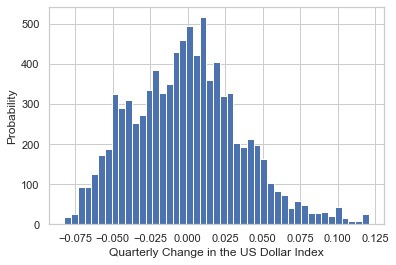

In [783]:
plt.hist(Q_usd_index_roll_pre, bins=45)
plt.xlabel('Quarterly Change in the US Dollar Index')
plt.ylabel('Probability')

In [784]:
pre_usd_out = np.abs(stats.zscore(Q_usd_index_roll_pre, axis=0, nan_policy='omit'))
pre_usd_out_thresh = 3
print(np.where( pre_usd_out >= pre_usd_out_thresh ))
usd_list = np.where( pre_usd_out >= pre_usd_out_thresh )

(array([5848, 5849, 5850, 5851, 5852, 5853, 5854, 5855, 5856, 5857, 5858,
       5859, 5860, 5861, 5862, 5863, 5864, 5865, 5866, 5867, 5868, 5869,
       5870, 5871, 5872, 5873, 5874, 5875, 5876, 5877, 5878, 5879, 5880,
       5881, 5882, 5883, 5884, 5885, 5886], dtype=int64),)


In [785]:
for i in usd_list:
    print(Q_usd_index_roll_pre[i])

Date
2008-11-18    0.109481
2008-11-19    0.110774
2008-11-20    0.112019
2008-11-21    0.113525
2008-11-24    0.114433
2008-11-25    0.115001
2008-11-26    0.115547
2008-11-27    0.116224
2008-11-28    0.117112
2008-12-01    0.118038
2008-12-02    0.118822
2008-12-03    0.119503
2008-12-04    0.120121
2008-12-05    0.120691
2008-12-08    0.120729
2008-12-09    0.120400
2008-12-10    0.120263
2008-12-11    0.119764
2008-12-12    0.118991
2008-12-15    0.118577
2008-12-16    0.118301
2008-12-17    0.117919
2008-12-18    0.117221
2008-12-19    0.117168
2008-12-22    0.117138
2008-12-23    0.117672
2008-12-24    0.118143
2008-12-26    0.118416
2008-12-29    0.118494
2008-12-30    0.118539
2008-12-31    0.118429
2009-01-02    0.117721
2009-01-05    0.117059
2009-01-06    0.115898
2009-01-07    0.114819
2009-01-08    0.113030
2009-01-09    0.111734
2009-01-12    0.110641
2009-01-13    0.109551
Name: Settle, dtype: float64


In [786]:
# The below confirms the above is correct
# Q_usd_index_roll_pre[5848],Q_usd_index_roll_pre[5849],Q_usd_index_roll_pre[5850],Q_usd_index_roll_pre[5851],Q_usd_index_roll_pre[5852],Q_usd_index_roll_pre[5853],Q_usd_index_roll_pre[5854],Q_usd_index_roll_pre[5855],Q_usd_index_roll_pre[5856],Q_usd_index_roll_pre[5857],Q_usd_index_roll_pre[5858],Q_usd_index_roll_pre[5859],Q_usd_index_roll_pre[5860],Q_usd_index_roll_pre[5861],Q_usd_index_roll_pre[5862],Q_usd_index_roll_pre[5863],Q_usd_index_roll_pre[5864],Q_usd_index_roll_pre[5865],Q_usd_index_roll_pre[5866],Q_usd_index_roll_pre[5867],Q_usd_index_roll_pre[5868],Q_usd_index_roll_pre[5869],Q_usd_index_roll_pre[5870],Q_usd_index_roll_pre[5871],Q_usd_index_roll_pre[5872],Q_usd_index_roll_pre[5873],Q_usd_index_roll_pre[5874],Q_usd_index_roll_pre[5875],Q_usd_index_roll_pre[5876],Q_usd_index_roll_pre[5877],Q_usd_index_roll_pre[5878],Q_usd_index_roll_pre[5879],Q_usd_index_roll_pre[5880],Q_usd_index_roll_pre[5881],Q_usd_index_roll_pre[5882],Q_usd_index_roll_pre[5883],Q_usd_index_roll_pre[5884],Q_usd_index_roll_pre[5885],Q_usd_index_roll_pre[5886]

In [787]:
pre_usd_drop = [ usd_list ]
Q_usd_index_roll_pre.drop(Q_usd_index_roll_pre.index[usd_list], inplace=True)

Text(0, 0.5, 'Probability')

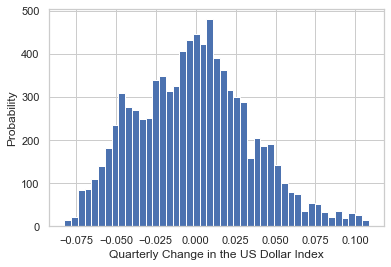

In [788]:
plt.hist(Q_usd_index_roll_pre, bins=45)
plt.xlabel('Quarterly Change in the US Dollar Index')
plt.ylabel('Probability')

In [789]:
pre_usd_out = np.abs(stats.zscore(Q_usd_index_roll_pre, axis=0, nan_policy='omit'))
pre_usd_out_thresh = 3
print(np.where( pre_usd_out >= pre_usd_out_thresh ))
usd_list = np.where( pre_usd_out >= pre_usd_out_thresh )

(array([1404, 1405, 1406, 5845, 5846, 5847, 5848, 5849], dtype=int64),)


In [790]:
for i in usd_list:
    print(Q_usd_index_roll_pre[i])

Date
1991-06-19    0.105591
1991-06-20    0.105623
1991-06-21    0.105617
2008-11-13    0.105910
2008-11-14    0.107199
2008-11-17    0.108321
2009-01-14    0.107694
2009-01-15    0.106168
Name: Settle, dtype: float64


More or less the same with the exception of June '91; let's proceed.

In [791]:
pre_usd_drop = [ 1404, 1405, 1406, 5845, 5846, 5847, 5848, 5849 ]
Q_usd_index_roll_pre.drop(Q_usd_index_roll_pre.index[pre_usd_drop], inplace=True)

Text(0, 0.5, 'Probability')

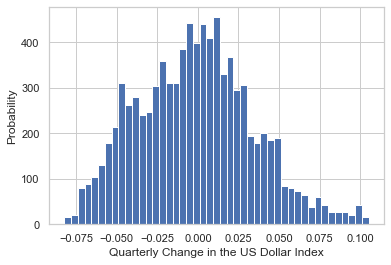

In [792]:
plt.hist(Q_usd_index_roll_pre, bins=45)
plt.xlabel('Quarterly Change in the US Dollar Index')
plt.ylabel('Probability')

In [793]:
pre_usd_out = np.abs(stats.zscore(Q_usd_index_roll_pre, axis=0, nan_policy='omit'))
pre_usd_out_thresh = 3
print(np.where( pre_usd_out >= pre_usd_out_thresh ))
usd_list = np.where( pre_usd_out >= pre_usd_out_thresh )

(array([1403, 1404], dtype=int64),)


In [794]:
Q_usd_index_roll_pre[1403],Q_usd_index_roll_pre[5839]

(0.10532609742611646, 0.10104845143183606)

In [795]:
pre_usd_drop_2 = [ 1403, 5839 ]
Q_usd_index_roll_pre.drop(Q_usd_index_roll_pre.index[pre_usd_drop_2], inplace=True)

Text(0, 0.5, 'Probability')

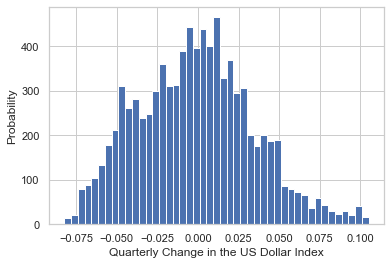

In [796]:
plt.hist(Q_usd_index_roll_pre, bins=45)
plt.xlabel('Quarterly Change in the US Dollar Index')
plt.ylabel('Probability')

In [797]:
pre_usd_out = np.abs(stats.zscore(Q_usd_index_roll_pre, axis=0, nan_policy='omit'))
pre_usd_out_thresh = 3
print(np.where( pre_usd_out >= pre_usd_out_thresh ))
usd_list = np.where( pre_usd_out >= pre_usd_out_thresh )

(array([1403, 1404], dtype=int64),)


In [798]:
Q_usd_index_roll_pre[1403],Q_usd_index_roll_pre[1404]

(0.105178604905243, 0.10496416544561284)

Similar to the previous rounds so we will continue to drop

In [799]:
pre_usd_drop_2 = [ 1403, 1404 ]
Q_usd_index_roll_pre.drop(Q_usd_index_roll_pre.index[pre_usd_drop_2], inplace=True)

Text(0, 0.5, 'Probability')

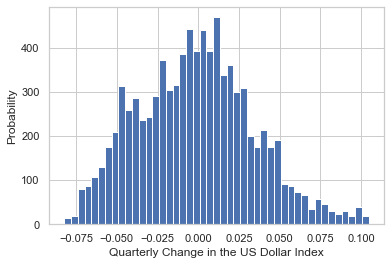

In [800]:
plt.hist(Q_usd_index_roll_pre, bins=45)
plt.xlabel('Quarterly Change in the US Dollar Index')
plt.ylabel('Probability')

In [801]:
pre_usd_out = np.abs(stats.zscore(Q_usd_index_roll_pre, axis=0, nan_policy='omit'))
pre_usd_out_thresh = 3
print(np.where( pre_usd_out >= pre_usd_out_thresh ))
usd_list = np.where( pre_usd_out >= pre_usd_out_thresh )

(array([], dtype=int64),)


In [802]:
print('We removed,', round(((( 9011 - len(Q_usd_index_roll_pre) ) / 9011 ) * 100),2),'% of the dataset; thats acceptable')

We removed, 0.55 % of the dataset; thats acceptable


Next `WTI`

In [803]:
len(Q_wti_roll_pre)

9529

Text(0, 0.5, 'Probability')

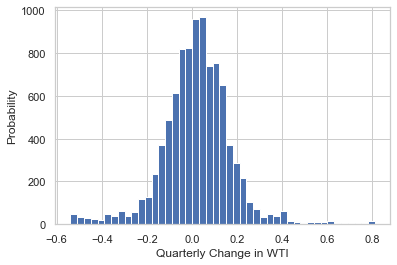

In [804]:
plt.hist(Q_wti_roll_pre, bins=45)
plt.xlabel('Quarterly Change in WTI')
plt.ylabel('Probability')

Noticable outliers on both ends.

In [805]:
pre_wti_out = np.abs(stats.zscore(Q_wti_roll_pre, axis=0, nan_policy='omit'))
pre_wti_out_thresh = 3
print(np.where( pre_wti_out >= pre_wti_out_thresh ))
wti_list = np.where( pre_wti_out >= pre_usd_out_thresh )

(array([ 761,  762,  763,  764,  765,  766,  767,  768,  769,  770,  771,
        772,  773,  774,  775,  776,  777,  778,  779,  780,  781,  782,
        783,  784, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895,
       1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906,
       1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917,
       1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 6455, 6456, 6457, 6458, 6459, 6460,
       6461, 6462, 6463, 6464, 6465, 6466, 6467, 6468, 6469, 6470, 6471,
       6472, 6473, 6474, 6475, 6476, 6477, 6478, 6479, 6480, 6481, 6482,
       6483, 6484, 6485, 6486, 6487, 6488, 6489, 6490, 6491, 6492, 6493,
       6494, 6495, 6496, 6497, 6498, 6499, 6500, 6501, 6502, 6503, 6504,
       6505, 6506, 6507, 6508, 6509, 6510, 9324, 9325, 9326, 9327, 9328,
       9329, 9330, 9331, 9332, 9333, 9334, 9335, 9

In [806]:
for w in wti_list:
    print(Q_wti_roll_pre[w].sort_values())

Date
2009-01-20   -0.539073
2009-01-16   -0.538327
2009-01-21   -0.538000
2009-01-15   -0.536456
2009-01-22   -0.536156
                ...   
1990-11-08    0.802827
1990-11-07    0.807654
1990-11-02    0.808804
1990-11-05    0.810872
1990-11-06    0.811333
Name: Last, Length: 204, dtype: float64


Looks like the fallout of the previous recession & the early 90's; similar to the `US Dollar Index`

In [807]:
Q_wti_roll_pre.drop(Q_wti_roll_pre.index[wti_list], inplace=True)

Text(0, 0.5, 'Probability')

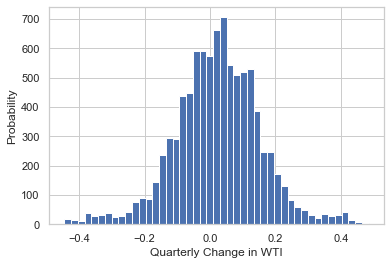

In [808]:
plt.hist(Q_wti_roll_pre, bins=45)
plt.xlabel('Quarterly Change in WTI')
plt.ylabel('Probability')

Cleaner. What's check how much we have removed.

In [809]:
print(round((( 9528 - len(Q_wti_roll_pre) ) / 9528 ),2),'% is not nearly half of a percent so we will continue to see.')

0.02 % is not nearly half of a percent so we will continue to see.


In [810]:
pre_wti_out = np.abs(stats.zscore(Q_wti_roll_pre, axis=0, nan_policy='omit'))
pre_wti_out_thresh = 3
print(np.where( pre_wti_out >= pre_wti_out_thresh ))
wti_list = np.where( pre_wti_out >= pre_usd_out_thresh )

(array([ 750,  751,  752,  753,  754,  755,  756,  757,  758,  759,  760,
        761,  762,  763,  764,  765,  766,  767,  768,  769, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 6362, 6363, 6364, 6365, 6366, 6367,
       6368, 6369, 6370, 6371, 6372, 6373, 6374, 6375, 6376, 6377, 6378,
       6379, 6473, 6474, 6475, 6476, 6477, 6478, 6479, 6480, 6481, 6482,
       7879, 7880, 7881, 7882, 7883, 7884, 7885, 7886, 7887, 7888, 7889,
       7890, 7891, 7892, 7893, 9178, 9179, 9180, 9181, 9182, 9183, 9184,
       9185, 9186, 9187, 9188, 9222, 9223, 9224, 9225, 9226, 9227, 9228,
       9229, 9230, 9231, 9232], dtype=int64),)


In [811]:
for w2 in wti_list:
    print(Q_wti_roll_pre[w2].sort_values())

Date
2020-05-06   -0.445782
1986-04-11   -0.444738
1986-05-16   -0.444276
2009-03-10   -0.442265
2008-12-15   -0.441778
                ...   
2020-10-08    0.471685
1990-12-27    0.478789
2020-08-17    0.479564
1990-10-02    0.479979
2020-10-07    0.485179
Name: Last, Length: 92, dtype: float64


We are still hovering around the ±40% level; let's drop another round.

In [812]:
Q_wti_roll_pre.drop(Q_wti_roll_pre.index[wti_list], inplace=True)

Text(0, 0.5, 'Probability')

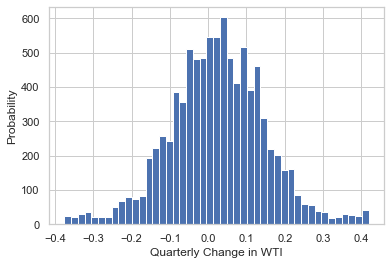

In [813]:
plt.hist(Q_wti_roll_pre, bins=45)
plt.xlabel('Quarterly Change in WTI')
plt.ylabel('Probability')

Marginally cleaner; let's look to see how much we have removed.

In [814]:
print(round((( 9528 - len(Q_wti_roll_pre) ) / 9528 ),2),'% is closer but still comforatable looking some more.')

0.03 % is closer but still comforatable looking some more.


In [815]:
pre_wti_out = np.abs(stats.zscore(Q_wti_roll_pre, axis=0, nan_policy='omit'))
pre_wti_out_thresh = 3
print(np.where( pre_wti_out >= pre_wti_out_thresh ))
wti_list = np.where( pre_wti_out >= pre_usd_out_thresh )

(array([ 747,  748,  749,  750,  751,  752, 1839, 3956, 3957, 3958, 3959,
       3960, 3961, 3962, 3963, 3964, 3965, 3966, 3967, 6332, 6333, 6334,
       6335, 6336, 6401, 6402, 6403, 6404, 6405, 6406, 6407, 6408, 6409,
       6410, 6417, 6418, 6419, 6420, 6421, 6422, 6423, 6424, 6425, 6426,
       6427, 6428, 6429, 6430, 6431, 7812, 7813, 7814, 7815, 7816, 7817,
       7818, 7819, 7820, 7821, 7822, 7823, 7824, 7825, 7826, 7827, 7828,
       9106, 9107, 9108, 9140, 9141, 9142], dtype=int64),)


In [816]:
for w2 in wti_list:
    print(Q_wti_roll_pre[w2].sort_values())

Date
2015-02-27   -0.375356
2015-02-26   -0.373234
1986-05-30   -0.372535
2015-03-23   -0.372096
2015-02-25   -0.371299
                ...   
2009-07-24    0.415883
2009-07-28    0.416121
2009-07-27    0.416184
2009-07-30    0.417363
2020-10-16    0.418901
Name: Last, Length: 72, dtype: float64


In [817]:
print('With these we are at',round((( 9528 - ( len(Q_wti_roll_pre) - 73 ) ) / 9528 ),2),'% which falls below a half of a percent so we can continue.')

With these we are at 0.04 % which falls below a half of a percent so we can continue.


In [818]:
Q_wti_roll_pre.drop(Q_wti_roll_pre.index[wti_list], inplace=True)

Text(0, 0.5, 'Probability')

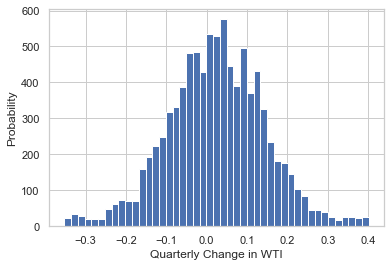

In [819]:
plt.hist(Q_wti_roll_pre, bins=45)
plt.xlabel('Quarterly Change in WTI')
plt.ylabel('Probability')

The above looks fairly reasonable; let's take another look.

In [820]:
pre_wti_out = np.abs(stats.zscore(Q_wti_roll_pre, axis=0, nan_policy='omit'))
pre_wti_out_thresh = 3
print(np.where( pre_wti_out >= pre_wti_out_thresh ))
wti_list = np.where( pre_wti_out >= pre_usd_out_thresh )

(array([ 746,  747, 1832, 3947, 3948, 3949, 3950, 3951, 3952, 3953, 6311,
       6312, 6313, 6374, 6375, 6376, 6377, 6378, 6379, 6380, 6381, 6382,
       6383, 6384, 7758, 7759, 7760, 7761, 7762, 7763, 7764, 7765, 9039,
       9040, 9071, 9075], dtype=int64),)


In [821]:
for w2 in wti_list:
    print(Q_wti_roll_pre[w2].sort_values())

Date
2015-02-10   -0.352593
2008-11-24   -0.350996
2015-02-09   -0.350459
2015-03-30   -0.350264
2020-06-26   -0.349960
2009-03-23   -0.349036
2015-02-06   -0.348430
1986-06-04   -0.348406
1986-03-21   -0.347242
2015-03-31   -0.347003
2015-02-05   -0.345982
2008-11-21   -0.344589
2020-04-22   -0.344489
2015-02-04   -0.343238
2015-04-01   -0.342658
2009-08-21    0.389436
1999-06-29    0.390924
1999-06-03    0.391697
2009-06-18    0.392092
2020-10-20    0.392479
1999-06-28    0.394619
1999-06-25    0.395387
2009-06-19    0.395822
2009-07-10    0.396028
1999-06-04    0.397061
2009-08-20    0.397265
2009-07-13    0.397731
1999-06-24    0.397769
2009-07-09    0.398070
1990-09-26    0.398171
2009-06-22    0.398901
2009-07-14    0.399849
2009-07-08    0.400519
2020-10-26    0.400554
1999-06-23    0.400691
2009-07-15    0.401481
Name: Last, dtype: float64


In [822]:
Q_wti_roll_pre.drop(Q_wti_roll_pre.index[wti_list], inplace=True)

Text(0, 0.5, 'Probability')

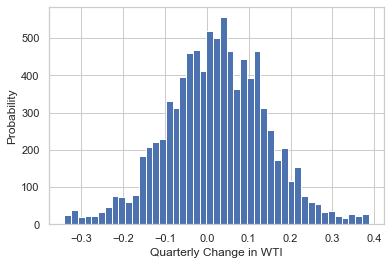

In [823]:
plt.hist(Q_wti_roll_pre, bins=45)
plt.xlabel('Quarterly Change in WTI')
plt.ylabel('Probability')

In [824]:
print('With these we are at',round((( 9528 - ( len(Q_wti_roll_pre) - len(wti_list) ) ) / 9528 ),2),'% which falls below a half of a percent so we can continue.')

With these we are at 0.04 % which falls below a half of a percent so we can continue.


In [825]:
pre_wti_out = np.abs(stats.zscore(Q_wti_roll_pre, axis=0, nan_policy='omit'))
pre_wti_out_thresh = 3
print(np.where( pre_wti_out >= pre_wti_out_thresh ))
wti_list = np.where( pre_wti_out >= pre_usd_out_thresh )

(array([ 745,  746, 1830, 3943, 3944, 6300, 6301, 6360, 6361, 7732, 7733,
       7734, 8056, 8057, 9036], dtype=int64),)


In [826]:
for w2 in wti_list:
    print(Q_wti_roll_pre[w2].sort_values())

Date
1986-03-20   -0.340090
2015-02-03   -0.339918
2015-04-02   -0.338111
1986-06-05   -0.338101
2015-02-02   -0.337706
2008-11-20   -0.337374
2009-03-24   -0.336806
1991-01-03    0.381860
2009-08-24    0.382539
2016-07-13    0.382548
2016-07-14    0.382722
2009-06-17    0.385667
1999-06-02    0.386239
1999-06-30    0.386624
2020-08-10    0.386688
Name: Last, dtype: float64


In [827]:
Q_wti_roll_pre.drop(Q_wti_roll_pre.index[wti_list], inplace=True)

Text(0, 0.5, 'Probability')

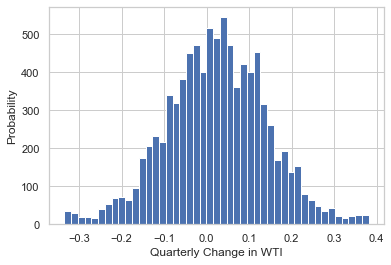

In [828]:
plt.hist(Q_wti_roll_pre, bins=45)
plt.xlabel('Quarterly Change in WTI')
plt.ylabel('Probability')

In [829]:
pre_wti_out = np.abs(stats.zscore(Q_wti_roll_pre, axis=0, nan_policy='omit'))
pre_wti_out_thresh = 3
print(np.where( pre_wti_out >= pre_wti_out_thresh ))
wti_list = np.where( pre_wti_out >= pre_usd_out_thresh )

(array([3939, 3940, 6352, 7722, 8043, 8044], dtype=int64),)


In [830]:
for w2 in wti_list:
    print(Q_wti_roll_pre[w2].sort_values())

Date
2015-01-30   -0.334955
2009-06-16    0.379569
1999-06-01    0.380993
2016-07-15    0.381038
1999-07-01    0.381452
2016-07-12    0.381608
Name: Last, dtype: float64


In [831]:
Q_wti_roll_pre.drop(Q_wti_roll_pre.index[wti_list], inplace=True)

Text(0, 0.5, 'Probability')

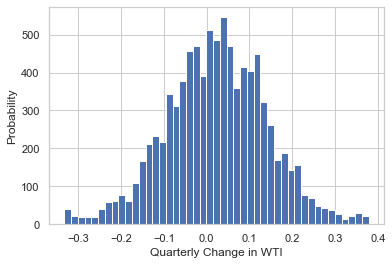

In [832]:
plt.hist(Q_wti_roll_pre, bins=45)
plt.xlabel('Quarterly Change in WTI')
plt.ylabel('Probability')

In [833]:
pre_wti_out = np.abs(stats.zscore(Q_wti_roll_pre, axis=0, nan_policy='omit'))
pre_wti_out_thresh = 3
print(np.where( pre_wti_out >= pre_wti_out_thresh ))
wti_list = np.where( pre_wti_out >= pre_usd_out_thresh )

(array([1827, 8039], dtype=int64),)


In [834]:
for w2 in wti_list:
    print(Q_wti_roll_pre[w2].sort_values())

Date
1990-09-25    0.378335
2016-07-18    0.378593
Name: Last, dtype: float64


In [835]:
Q_wti_roll_pre.drop(Q_wti_roll_pre.index[wti_list], inplace=True)

Text(0, 0.5, 'Probability')

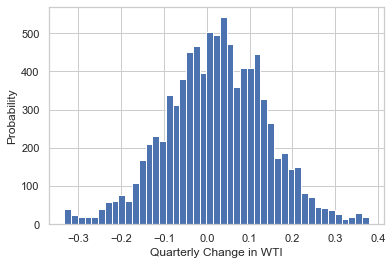

In [836]:
plt.hist(Q_wti_roll_pre, bins=45)
plt.xlabel('Quarterly Change in WTI')
plt.ylabel('Probability')

In [837]:
pre_wti_out = np.abs(stats.zscore(Q_wti_roll_pre, axis=0, nan_policy='omit'))
pre_wti_out_thresh = 3
print(np.where( pre_wti_out >= pre_wti_out_thresh ))
wti_list = np.where( pre_wti_out >= pre_usd_out_thresh )

(array([8037], dtype=int64),)


In [838]:
print('With those scrapes we are at',round((( 9528 - ( len(Q_wti_roll_pre) - len(wti_list) ) ) / 9528 ),2),'% reduction which is okay; lets move on.')

With those scrapes we are at 0.04 % reduction which is okay; lets move on.


Next `Copper`

In [839]:
len(Q_copper_roll_pre)

8222

Text(0, 0.5, 'Probability')

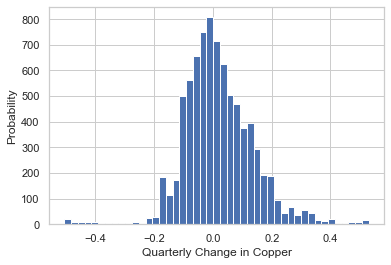

In [840]:
plt.hist(Q_copper_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Copper')
plt.ylabel('Probability')

In [841]:
pre_cop_out = np.abs(stats.zscore(Q_copper_roll_pre, axis=0, nan_policy='omit'))
pre_cop_out_thresh = 3
print(np.where( pre_cop_out >= pre_cop_out_thresh ))
cop_list = np.where( pre_cop_out >= pre_cop_out_thresh )

(array([ 131,  132, 4468, 4469, 4470, 4471, 4472, 4473, 4474, 4475, 4476,
       4477, 4478, 4479, 4480, 4481, 4482, 4483, 4484, 4485, 4486, 4487,
       4488, 4489, 4490, 4491, 4492, 4493, 4494, 4495, 4496, 4497, 4498,
       4499, 4500, 4501, 4502, 4503, 4504, 4505, 4506, 4507, 4508, 4509,
       4510, 4511, 4512, 4513, 4514, 4515, 4516, 4517, 4518, 5097, 5098,
       5099, 5100, 5101, 5102, 5103, 5104, 5105, 5106, 5107, 5108, 5109,
       5110, 5111, 5112, 5113, 5114, 5115, 5116, 5117, 5118, 5119, 5120,
       5121, 5122, 5123, 5124, 5125, 5126, 5127, 5128, 5129, 5130, 5131,
       5132, 5133, 5134, 5135, 5136, 5137, 5138, 5139, 5140, 5141, 5142,
       5143, 5144, 5145, 5146, 5147, 5148, 5149, 5150, 5151, 5152, 5153,
       5154, 5155, 5156, 5157, 5158, 5159, 5160, 5161, 5162, 5230, 5231,
       5232, 5233, 5234, 5235, 5236, 5237, 5238, 5239, 5240, 5241, 5242,
       5243, 5244, 5245, 5246, 5247, 5248], dtype=int64),)


In [842]:
for i in cop_list:
    print(Q_copper_roll_pre[i].sort_values())

Date
2009-01-14   -0.505766
2009-01-12   -0.505615
2009-01-13   -0.505079
2009-01-08   -0.504715
2009-01-09   -0.504666
                ...   
2006-07-13    0.526796
2006-07-14    0.529250
2006-07-19    0.529524
2006-07-18    0.530141
2006-07-17    0.530210
Name: Close, Length: 138, dtype: float64


Let's correct; let's remove.

In [843]:
Q_copper_roll_pre.drop(Q_copper_roll_pre.index[wti_list], inplace=True)

Text(0, 0.5, 'Probability')

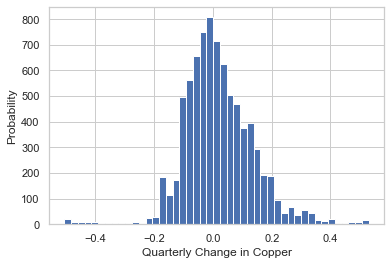

In [844]:
plt.hist(Q_copper_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Copper')
plt.ylabel('Probability')

Looks like it still needs work; let's continue.

In [845]:
pre_cop_out = np.abs(stats.zscore(Q_copper_roll_pre, axis=0, nan_policy='omit'))
pre_cop_out_thresh = 3
print(np.where( pre_cop_out >= pre_cop_out_thresh ))
cop_list = np.where( pre_cop_out >= pre_cop_out_thresh )

(array([ 131,  132, 4468, 4469, 4470, 4471, 4472, 4473, 4474, 4475, 4476,
       4477, 4478, 4479, 4480, 4481, 4482, 4483, 4484, 4485, 4486, 4487,
       4488, 4489, 4490, 4491, 4492, 4493, 4494, 4495, 4496, 4497, 4498,
       4499, 4500, 4501, 4502, 4503, 4504, 4505, 4506, 4507, 4508, 4509,
       4510, 4511, 4512, 4513, 4514, 4515, 4516, 4517, 4518, 5097, 5098,
       5099, 5100, 5101, 5102, 5103, 5104, 5105, 5106, 5107, 5108, 5109,
       5110, 5111, 5112, 5113, 5114, 5115, 5116, 5117, 5118, 5119, 5120,
       5121, 5122, 5123, 5124, 5125, 5126, 5127, 5128, 5129, 5130, 5131,
       5132, 5133, 5134, 5135, 5136, 5137, 5138, 5139, 5140, 5141, 5142,
       5143, 5144, 5145, 5146, 5147, 5148, 5149, 5150, 5151, 5152, 5153,
       5154, 5155, 5156, 5157, 5158, 5159, 5160, 5161, 5162, 5230, 5231,
       5232, 5233, 5234, 5235, 5236, 5237, 5238, 5239, 5240, 5241, 5242,
       5243, 5244, 5245, 5246, 5247, 5248], dtype=int64),)


In [846]:
for i in cop_list:
    print(Q_copper_roll_pre[i].sort_values())

Date
2009-01-14   -0.505766
2009-01-12   -0.505615
2009-01-13   -0.505079
2009-01-08   -0.504715
2009-01-09   -0.504666
                ...   
2006-07-13    0.526796
2006-07-14    0.529250
2006-07-19    0.529524
2006-07-18    0.530141
2006-07-17    0.530210
Name: Close, Length: 138, dtype: float64


Although that does not look particularly incorrect; let's check how much we have removed in the previous round.

In [847]:
((8222 - len(Q_copper_roll_pre))/8222)*100

0.012162490878131841

Next `Soybeans`

In [848]:
len(Q_soybeans_roll_pre)

8088

Text(0, 0.5, 'Probability')

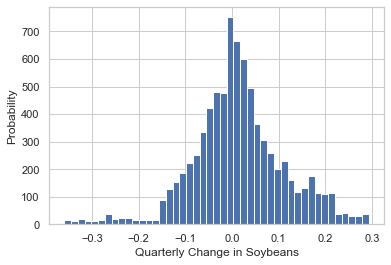

In [849]:
plt.hist(Q_soybeans_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Soybeans')
plt.ylabel('Probability')

In [850]:
pre_soy_out = np.abs(stats.zscore(Q_soybeans_roll_pre, axis=0, nan_policy='omit'))
pre_soy_out_thresh = 3
print(np.where( pre_soy_out >= pre_soy_out_thresh ))
soy_list = np.where( pre_soy_out >= pre_soy_out_thresh )

(array([3727, 3728, 3729, 3730, 3731, 3732, 3733, 3734, 3735, 3736, 3737,
       3738, 3739, 3740, 3741, 3742, 3743, 3744, 3745, 3746, 3747, 3748,
       3749, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758, 3759,
       3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 4780, 4781, 4782,
       4783, 4784, 4785, 4786, 4787, 4788, 4789, 4790, 4791, 4792, 4793,
       4794, 4795, 4796, 4797, 4798, 4799, 4800, 4801, 4802, 4803, 4804,
       4805, 4806, 4807, 4808], dtype=int64),)


In [851]:
for i in soy_list:
    print(Q_soybeans_roll_pre[i].sort_values())

Date
2004-10-18   -0.359508
2004-10-19   -0.359240
2004-10-21   -0.358790
2004-10-22   -0.358549
2004-10-20   -0.358418
                ...   
2004-09-28   -0.290721
2008-12-01   -0.289468
2009-01-12   -0.288847
2004-11-22   -0.287400
2004-09-27   -0.286235
Name: Close, Length: 70, dtype: float64


This seems to be entirely on the negative side which looks correct; let's remove.

In [852]:
Q_soybeans_roll_pre.drop(Q_soybeans_roll_pre.index[soy_list], inplace=True)

Text(0, 0.5, 'Probability')

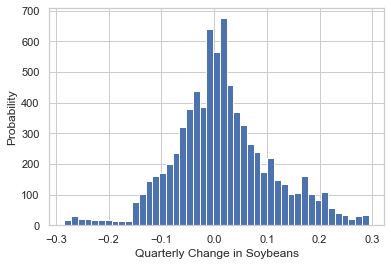

In [853]:
plt.hist(Q_soybeans_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Soybeans')
plt.ylabel('Probability')

Looks arguably on the negative side again but let's check.

In [854]:
pre_soy_out = np.abs(stats.zscore(Q_soybeans_roll_pre, axis=0, nan_policy='omit'))
pre_soy_out_thresh = 3
print(np.where( pre_soy_out >= pre_soy_out_thresh ))
soy_list = np.where( pre_soy_out >= pre_soy_out_thresh )

(array([3723, 3724, 3725, 3726, 3727, 3728, 3729, 3730, 3731, 3732, 3733,
       3734, 4735, 4736, 4737, 4738, 4739, 4740, 4741, 6318, 6319, 6320,
       6321, 6322, 6323, 6324, 6325, 6326, 6327, 6328, 6329, 6330, 6331,
       6332, 6333], dtype=int64),)


In [855]:
for i in soy_list:
    print(Q_soybeans_roll_pre[i].sort_values())

Date
2008-11-28   -0.284047
2004-11-23   -0.283412
2009-01-13   -0.282801
2004-09-24   -0.281428
2004-11-24   -0.280340
2008-11-26   -0.278753
2004-11-26   -0.277746
2009-01-14   -0.277193
2004-09-23   -0.277168
2004-11-29   -0.275454
2008-11-25   -0.273734
2004-11-30   -0.273107
2004-09-22   -0.272795
2014-10-15   -0.271666
2014-10-14   -0.271641
2014-10-13   -0.271626
2014-10-16   -0.271513
2014-10-10   -0.271466
2014-10-17   -0.271068
2014-10-20   -0.270651
2014-10-09   -0.270223
2004-12-01   -0.270098
2014-10-21   -0.269996
2014-10-22   -0.269650
2014-10-24   -0.269597
2014-10-27   -0.269416
2014-10-23   -0.269402
2009-01-15   -0.269372
2008-11-24   -0.268830
2004-09-21   -0.268789
2014-10-08   -0.268775
2004-12-02   -0.268239
2014-10-28   -0.267362
2014-10-07   -0.267263
2004-12-03   -0.267101
Name: Close, dtype: float64


Although this again visually appears correct lets double check where we stand on the # of scrapes as a percent of the original total & what this would also mean if we scraped this.

In [856]:
((8087 - len(Q_soybeans_roll_pre))/8087)*100

0.8532212192407568

Next `Heating Oil`

In [857]:
x = len(Q_heatoil_roll_pre)
x

10421

Text(0, 0.5, 'Probability')

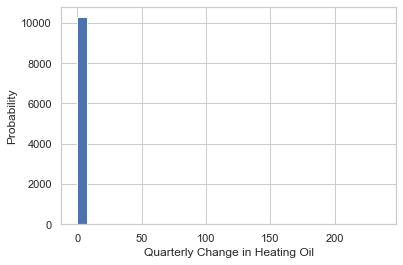

In [858]:
plt.hist(Q_heatoil_roll_pre, bins=30)
plt.xlabel('Quarterly Change in Heating Oil')
plt.ylabel('Probability')

In [859]:
pre_heat_out = np.abs(stats.zscore(Q_heatoil_roll_pre, axis=0, nan_policy='omit'))
pre_heat_out_thresh = 3
print(np.where( pre_heat_out >= pre_heat_out_thresh ))
heat_list = np.where( pre_heat_out >= pre_heat_out_thresh )

(array([131, 132], dtype=int64),)


In [860]:
for i in heat_list:
    print(Q_heatoil_roll_pre[i].sort_values())

Date
1980-07-08    118.948103
1980-07-07    235.751068
Name: Close, dtype: float64


Let's correct; let's remove.

In [861]:
Q_heatoil_roll_pre.drop(Q_heatoil_roll_pre.index[heat_list], inplace=True)

An issue I will resolve once I understand why the final outcome on the others is the result.

Next `Corn`

In [862]:
c = len(Q_corn_roll_pre)
c

10618

Text(0, 0.5, 'Probability')

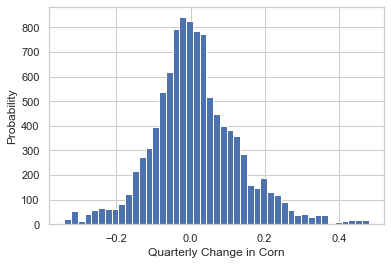

In [863]:
plt.hist(Q_corn_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Corn')
plt.ylabel('Probability')

In [864]:
pre_corn_out = np.abs(stats.zscore(Q_corn_roll_pre, axis=0, nan_policy='omit'))
pre_corn_out_thresh = 3
print(np.where( pre_corn_out >= pre_corn_out_thresh ))
corn_list = np.where( pre_corn_out >= pre_corn_out_thresh )

(array([2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186,
       2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197,
       2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 6817, 6818,
       6819, 6820, 6821, 6822, 6823, 6824, 6825, 6826, 6827, 6828, 6829,
       6830, 6831, 6832, 6833, 6834, 6835, 6836, 6837, 6838, 6839, 6840,
       6841, 6842, 6843, 6844, 6845, 6846, 6847, 6848, 6849, 6850, 6851,
       6852, 6853, 6854, 6855, 6856, 6857, 6858, 6859, 6860, 6861, 6862,
       6863, 6864, 6865, 6866, 6867], dtype=int64),)


In [865]:
for i in corn_list:
    print(Q_corn_roll_pre[i].sort_values())

Date
1988-08-11    0.375248
2007-03-02    0.377206
2006-12-18    0.380576
1988-08-12    0.382155
1988-09-23    0.384932
                ...   
2007-01-22    0.479764
2007-01-23    0.479883
2007-01-24    0.480140
2007-01-25    0.480232
2007-01-26    0.480516
Name: Close, Length: 82, dtype: float64


They are entirely on the positive side & scraping 82 observations is marginal so let's scrape.

In [866]:
Q_corn_roll_pre.drop(Q_corn_roll_pre.index[corn_list], inplace=True)

Text(0, 0.5, 'Probability')

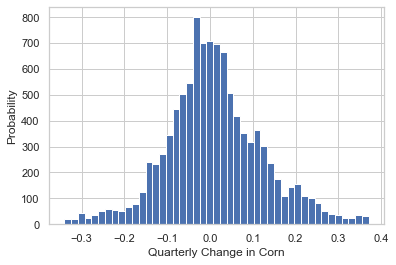

In [867]:
plt.hist(Q_corn_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Corn')
plt.ylabel('Probability')

Let's check again.

In [868]:
pre_corn_out = np.abs(stats.zscore(Q_corn_roll_pre, axis=0, nan_policy='omit'))
pre_corn_out_thresh = 3
print(np.where( pre_corn_out >= pre_corn_out_thresh ))
corn_list = np.where( pre_corn_out >= pre_corn_out_thresh )

(array([2173, 2174, 2175, 2176, 2177, 6784, 6785, 6786, 6787, 6788, 7058,
       7059, 7060, 7061, 7062, 7063, 7064, 7065, 7066, 7067, 7068, 7237,
       7238, 7239, 7240, 7241, 7242, 7243, 7244, 7245, 7246, 7247, 7248,
       7249, 7250, 7251, 7755, 7756, 7757, 7758, 7759, 7760, 7761, 7762,
       7763, 7764, 7765, 7766, 7767, 7768, 7769, 7770, 7771, 7772, 7773,
       7774], dtype=int64),)


In [869]:
for i in corn_list:
    print(Q_corn_roll_pre[i].sort_values())

Date
2008-12-31   -0.340215
2008-12-30   -0.340024
2008-12-29   -0.339100
2009-01-02   -0.338686
2008-12-26   -0.337863
2008-12-24   -0.337348
2008-12-19   -0.336831
2008-12-23   -0.336805
2008-12-22   -0.336767
2008-12-18   -0.335773
2009-01-05   -0.335704
2008-12-17   -0.335487
2008-12-16   -0.333879
2008-12-15   -0.332461
2009-01-06   -0.332038
2008-04-16    0.351842
2008-04-02    0.352615
2010-11-04    0.353439
2007-03-07    0.353510
2008-04-15    0.353620
1988-08-08    0.354093
2008-04-03    0.354159
2010-12-02    0.354667
2008-04-14    0.355509
2008-04-04    0.355782
2010-11-05    0.356265
2008-04-07    0.357004
1988-09-27    0.357224
2010-12-01    0.357401
2010-11-08    0.357713
2008-04-11    0.357837
2008-04-08    0.358254
2006-12-14    0.358442
2008-04-09    0.358996
2010-11-30    0.359029
2008-04-10    0.359108
2010-11-09    0.360044
2010-11-29    0.360374
1988-08-09    0.360856
2007-03-06    0.361429
2010-11-26    0.361581
2010-11-10    0.363148
2010-11-24    0.363333
2010-1

Aside from a few, theses look seperated; let's scrape.

In [870]:
Q_corn_roll_pre.drop(Q_corn_roll_pre.index[corn_list], inplace=True)

Text(0, 0.5, 'Probability')

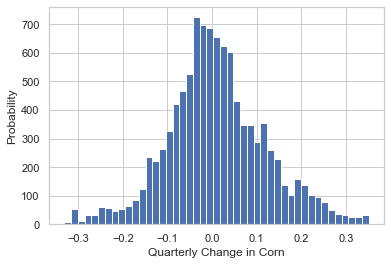

In [871]:
plt.hist(Q_corn_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Corn')
plt.ylabel('Probability')

Let's investigate how much we have scraped for reference. 

In [872]:
print('You have scrapped',round((((10617 - len(Q_corn_roll_pre))/10617)*100),2),'%. Lets check what another round would yield.')

You have scrapped 1.29 %. Lets check what another round would yield.


In [873]:
pre_corn_out = np.abs(stats.zscore(Q_corn_roll_pre, axis=0, nan_policy='omit'))
pre_corn_out_thresh = 3
print(np.where( pre_corn_out >= pre_corn_out_thresh ))
corn_list = np.where( pre_corn_out >= pre_corn_out_thresh )

(array([2172, 2173, 6778, 6779, 7035, 7036, 7037, 7038, 7039, 7040, 7041,
       7042, 7043, 7044, 7045, 7046, 7047, 7048, 7049, 7213, 7214, 7215,
       7216, 7717, 7718, 7719, 7720], dtype=int64),)


Let's check what values these are first.

In [874]:
for i in corn_list:
    print(Q_corn_roll_pre[i].sort_values())

Date
2008-12-12   -0.331309
2008-12-11   -0.329568
2009-01-07   -0.327629
2008-12-10   -0.326768
2008-04-18    0.343331
2008-03-13    0.343901
1988-09-28    0.344016
2007-03-08    0.344624
2008-03-14    0.346178
2010-11-02    0.346212
2008-03-26    0.347271
2008-03-25    0.347354
2010-12-06    0.347774
2008-03-17    0.347806
2006-12-13    0.347916
2008-03-27    0.347931
1988-08-05    0.347947
2008-04-17    0.348240
2008-03-20    0.348441
2008-03-28    0.348524
2008-03-24    0.348641
2008-03-31    0.349146
2010-11-03    0.349590
2008-03-18    0.349610
2008-03-19    0.349630
2008-04-01    0.350856
2010-12-03    0.351197
Name: Close, dtype: float64


In [875]:
Q_corn_roll_pre.drop(Q_corn_roll_pre.index[corn_list], inplace=True)

Text(0, 0.5, 'Probability')

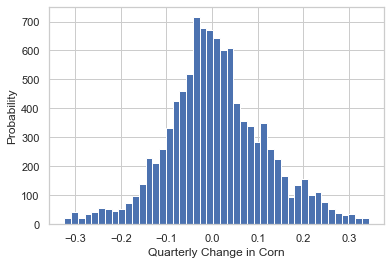

In [876]:
plt.hist(Q_corn_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Corn')
plt.ylabel('Probability')

In [877]:
print('You have scrapped',round((((10617 - len(Q_corn_roll_pre))/10617)*100),2),'%. So we will stop here.')

You have scrapped 1.54 %. So we will stop here.


Next `Wheat`

In [878]:
len(Q_wheat_roll_pre)

8188

Text(0, 0.5, 'Probability')

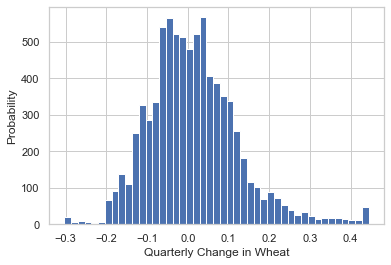

In [879]:
plt.hist(Q_wheat_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Wheat')
plt.ylabel('Probability')

In [880]:
pre_wheat_out = np.abs(stats.zscore(Q_wheat_roll_pre, axis=0, nan_policy='omit'))
pre_wheat_out_thresh = 3
print(np.where( pre_wheat_out >= pre_wheat_out_thresh ))
wheat_list = np.where( pre_wheat_out >= pre_wheat_out_thresh )

(array([4521, 4522, 4523, 4524, 4525, 4526, 4527, 4528, 4529, 4530, 4531,
       4532, 4533, 4534, 4535, 4536, 4537, 4538, 4539, 4540, 4541, 4542,
       4543, 4544, 4545, 4546, 4547, 4548, 4549, 4550, 4551, 4552, 4553,
       4554, 4555, 4556, 4557, 4558, 4559, 4560, 4561, 4562, 4563, 4564,
       4565, 4566, 4567, 4568, 4569, 4570, 4571, 4572, 4573, 4574, 4575,
       4576, 4577, 4578, 4579, 4580, 4581, 4582, 4583, 4584, 4585, 5321,
       5322, 5323, 5324, 5325, 5326, 5327, 5328, 5329, 5330, 5331, 5332,
       5333, 5334, 5335, 5336, 5337, 5338, 5339, 5340, 5341, 5342, 5343,
       5344, 5345, 5346, 5347, 5348, 5349, 5350, 5351, 5352, 5353, 5354,
       5355, 5356, 5357, 5358, 5359, 5360, 5361, 5898, 5899, 5900, 5901,
       5902, 5903, 5904, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912,
       5913, 5914], dtype=int64),)


In [881]:
for i in wheat_list:
    print(Q_wheat_roll_pre[i].sort_values())

Date
2007-09-04    0.346500
2012-09-07    0.346621
2012-09-26    0.346844
2007-12-03    0.348915
2012-09-25    0.350467
                ...   
2010-09-30    0.443412
2007-10-25    0.444070
2007-10-24    0.444349
2010-10-01    0.444516
2007-10-23    0.444586
Name: Close, Length: 123, dtype: float64


Look's correct; let's remove.

In [882]:
Q_wheat_roll_pre.drop(Q_wheat_roll_pre.index[wheat_list], inplace=True)

Text(0, 0.5, 'Probability')

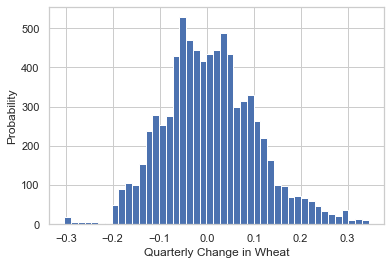

In [883]:
plt.hist(Q_wheat_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Wheat')
plt.ylabel('Probability')

This has oddly reversed visually but let's check how many we have scrapped.

In [884]:
print('You have scrapped',round((((8187 - len(Q_wheat_roll_pre))/8187)*100),2),'%. We may stop here unless the next round addresses those on negative side.')

You have scrapped 1.49 %. We may stop here unless the next round addresses those on negative side.


In [885]:
pre_wheat_out = np.abs(stats.zscore(Q_wheat_roll_pre, axis=0, nan_policy='omit'))
pre_wheat_out_thresh = 3
print(np.where( pre_wheat_out >= pre_wheat_out_thresh ))
wheat_list = np.where( pre_wheat_out >= pre_wheat_out_thresh )

(array([4516, 4517, 4518, 4519, 4520, 4521, 4522, 4523, 4524, 4784, 4785,
       4786, 4787, 4788, 4789, 4790, 4791, 4792, 4793, 4794, 4795, 4796,
       4797, 4798, 4799, 5251, 5252, 5253, 5254, 5255, 5256, 5257, 5258,
       5259, 5260, 5261, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794,
       5795, 5796, 5797, 5798], dtype=int64),)


In [886]:
for i in wheat_list:
    print(Q_wheat_roll_pre[i].sort_values())

Date
2008-12-29   -0.303035
2008-12-26   -0.302396
2008-12-30   -0.302269
2008-12-24   -0.302057
2008-12-23   -0.300689
2008-12-18   -0.300422
2008-12-16   -0.300196
2008-12-22   -0.299815
2008-12-17   -0.299808
2008-12-19   -0.299788
2008-12-31   -0.299369
2008-12-15   -0.298590
2008-12-12   -0.297515
2009-01-02   -0.297261
2009-01-05   -0.295339
2008-12-11   -0.295126
2007-08-28    0.308973
2010-11-04    0.311197
2012-10-04    0.312053
2007-12-07    0.312869
2012-08-30    0.313198
2010-09-06    0.314571
2007-08-29    0.316508
2012-10-03    0.317718
2007-12-06    0.319880
2010-11-03    0.320081
2012-08-31    0.320582
2010-09-07    0.322163
2007-08-30    0.323328
2012-10-02    0.324351
2010-11-02    0.326058
2012-09-04    0.327949
2007-12-05    0.328427
2007-08-31    0.329148
2010-09-08    0.329307
2012-10-01    0.330126
2010-11-01    0.331090
2012-09-30    0.334455
2012-09-05    0.334586
2007-12-04    0.335713
2010-10-31    0.336868
2010-09-09    0.337344
2012-09-28    0.338643
2007-0

In [887]:
Q_wheat_roll_pre.drop(Q_wheat_roll_pre.index[wheat_list], inplace=True)

Text(0, 0.5, 'Probability')

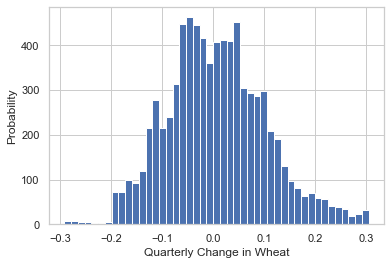

In [888]:
plt.hist(Q_wheat_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Wheat')
plt.ylabel('Probability')

In [889]:
print('You have scrapped',round((((8187 - len(Q_wheat_roll_pre))/8187)*100),2),'%. We will stop here as its above the comfort level.')

You have scrapped 2.08 %. We will stop here as its above the comfort level.


Next `Cattle`

In [890]:
len(Q_cattle_roll_pre)

10401

Text(0, 0.5, 'Probability')

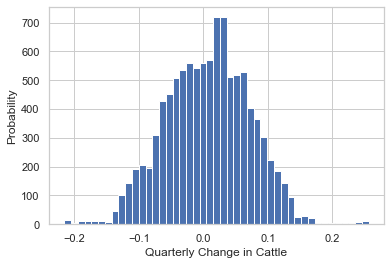

In [891]:
plt.hist(Q_cattle_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Cattle')
plt.ylabel('Probability')

In [892]:
pre_cat_out = np.abs(stats.zscore(Q_cattle_roll_pre, axis=0, nan_policy='omit'))
pre_cat_out_thresh = 3
print(np.where( pre_cat_out >= pre_cat_out_thresh ))
cat_list = np.where( pre_cat_out >= pre_cat_out_thresh )

(array([ 6016,  6017,  6018,  6019,  6020,  6021,  6022,  6023,  6024,
        6025,  6026,  6027,  6028,  6029,  6030,  6031,  6032,  6033,
        6034,  6035,  6036,  6037,  6038,  6039,  6040,  6041,  6042,
        6043,  6044,  6045,  6046,  6047,  6048,  6049,  6050, 10200,
       10201, 10202, 10203, 10204, 10205, 10206, 10207, 10208, 10209,
       10210, 10211, 10212, 10213, 10214, 10215, 10216, 10217, 10218,
       10219, 10220, 10221, 10222, 10223, 10224, 10225], dtype=int64),)


In [893]:
for i in cat_list:
    print(Q_cattle_roll_pre[i].sort_values())

Date
2020-06-08   -0.215529
2020-06-05   -0.215022
2020-06-09   -0.215019
2020-06-04   -0.213897
2020-06-10   -0.213834
                ...   
2003-12-10    0.254555
2003-12-04    0.255332
2003-12-09    0.255864
2003-12-05    0.256341
2003-12-08    0.256356
Name: Close, Length: 61, dtype: float64


Look's correct; let's remove.

In [894]:
Q_cattle_roll_pre.drop(Q_cattle_roll_pre.index[cat_list], inplace=True)

Text(0, 0.5, 'Probability')

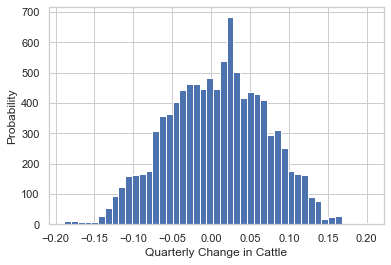

In [895]:
plt.hist(Q_cattle_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Cattle')
plt.ylabel('Probability')

Looks cleaner but let's check how much we have scrapped.

In [896]:
print('You have scrapped',round((((10400 - len(Q_cattle_roll_pre))/10400)*100),2),'%. Still room to go.')

You have scrapped 0.58 %. Still room to go.


In [897]:
pre_cat_out = np.abs(stats.zscore(Q_cattle_roll_pre, axis=0, nan_policy='omit'))
pre_cat_out_thresh = 3
print(np.where( pre_cat_out >= pre_cat_out_thresh ))
cat_list = np.where( pre_cat_out >= pre_cat_out_thresh )

(array([ 6015,  6016, 10163, 10164, 10165, 10166, 10167, 10168, 10169,
       10170], dtype=int64),)


In [898]:
for i in cat_list:
    print(Q_cattle_roll_pre[i].sort_values())

Date
2020-06-24   -0.188756
2020-06-26   -0.188696
2020-06-25   -0.188483
2020-05-15   -0.188113
2020-06-29   -0.188100
2020-06-30   -0.186815
2020-05-14   -0.185355
2020-07-01   -0.183904
2003-11-07    0.199963
2003-12-31    0.202520
Name: Close, dtype: float64


Modest. Let's continue.

In [899]:
Q_cattle_roll_pre.drop(Q_cattle_roll_pre.index[cat_list], inplace=True)

Text(0, 0.5, 'Probability')

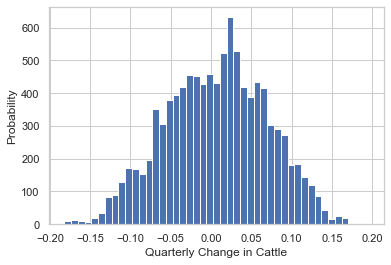

In [900]:
plt.hist(Q_cattle_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Cattle')
plt.ylabel('Probability')

In [901]:
print('You have scrapped',round((((10400 - len(Q_cattle_roll_pre))/10400)*100),2),'%. We will stop here.')

You have scrapped 0.67 %. We will stop here.


Next `Sugar`

In [902]:
len(Q_sugar_roll_pre)

10370

Text(0, 0.5, 'Probability')

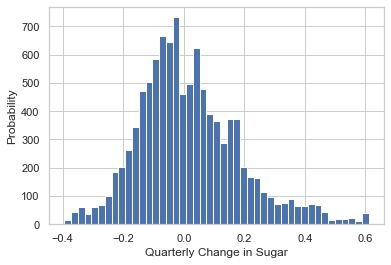

In [903]:
plt.hist(Q_sugar_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Sugar')
plt.ylabel('Probability')

In [904]:
pre_sug_out = np.abs(stats.zscore(Q_sugar_roll_pre, axis=0, nan_policy='omit'))
pre_sug_out_thresh = 3
print(np.where( pre_sug_out >= pre_sug_out_thresh ))
sug_list = np.where( pre_sug_out >= pre_sug_out_thresh )

(array([ 880,  881,  882,  883,  884,  885,  886,  887,  888,  889,  890,
        891,  892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
       1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446,
       1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457,
       1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468,
       1469, 1470, 1471, 1472, 1473, 5143, 5144, 5145, 5146, 5147, 5148,
       5149, 5150, 5151, 5152, 5153, 5154, 5155, 5156, 5157, 5158, 5159,
       5160, 5161, 5162, 5163, 5164, 5165, 5166, 5167, 5168, 5169, 5170,
       5171, 5172, 5173, 5174, 5175, 5176, 5177], dtype=int64),)


In [905]:
for i in sug_list:
    print(Q_sugar_roll_pre[i].sort_values())

Date
1983-07-22    0.520962
2000-09-21    0.523485
1983-08-22    0.525493
1983-07-25    0.527239
1985-12-12    0.529972
                ...   
2000-08-29    0.608495
2000-08-28    0.609763
2000-08-25    0.610063
2000-08-23    0.610204
2000-08-24    0.610680
Name: Close, Length: 95, dtype: float64


Entirely on the positive side; let's remove.

In [906]:
Q_sugar_roll_pre.drop(Q_sugar_roll_pre.index[sug_list], inplace=True)

Text(0, 0.5, 'Probability')

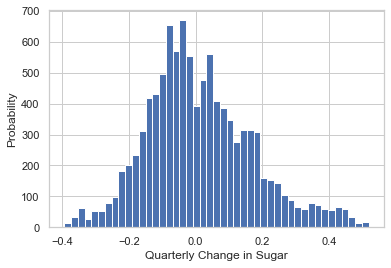

In [907]:
plt.hist(Q_sugar_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Sugar')
plt.ylabel('Probability')

Looks healthier; let's review how much we have scrapped.

In [908]:
print('You have scrapped',round((((10369 - len(Q_sugar_roll_pre))/10369)*100),2),'%. Lets review.')

You have scrapped 0.91 %. Lets review.


In [909]:
pre_sug_out = np.abs(stats.zscore(Q_sugar_roll_pre, axis=0, nan_policy='omit'))
pre_sug_out_thresh = 3
print(np.where( pre_sug_out >= pre_sug_out_thresh ))
sug_list = np.where( pre_sug_out >= pre_sug_out_thresh )

(array([ 874,  875,  876,  877,  878,  879,  880,  881,  882,  883, 1412,
       1413, 1414, 1415, 5080, 5081, 5082, 5083, 5084, 5085, 5086],
      dtype=int64),)


In [910]:
for i in sug_list:
    print(Q_sugar_roll_pre[i].sort_values())

Date
1983-07-14    0.492389
1983-08-26    0.492763
2000-09-27    0.492972
2000-07-31    0.496382
1983-07-15    0.497425
2000-09-26    0.500569
1985-10-17    0.501600
1985-12-16    0.502240
1983-08-25    0.502243
1983-07-18    0.502985
2000-08-01    0.503897
1983-07-19    0.508408
2000-09-25    0.508413
1983-08-24    0.512305
2000-08-02    0.512650
1983-07-20    0.513343
2000-09-22    0.515751
1985-10-18    0.516305
1983-07-21    0.516621
1985-12-13    0.517425
1983-08-23    0.519744
Name: Close, dtype: float64


Seems okay to remove.

In [911]:
Q_sugar_roll_pre.drop(Q_sugar_roll_pre.index[sug_list], inplace=True)

Text(0, 0.5, 'Probability')

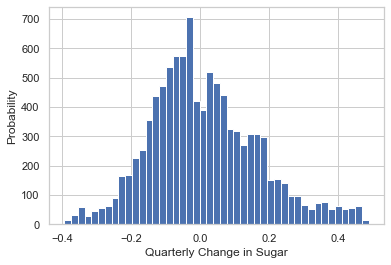

In [912]:
plt.hist(Q_sugar_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Sugar')
plt.ylabel('Probability')

In [913]:
print('You have scrapped',round((((10369 - len(Q_sugar_roll_pre))/10369)*100),2),'%. Lets review.')

You have scrapped 1.11 %. Lets review.


The current scrape is pushing the comfort boundaries; let's see what another round would yield.

In [914]:
pre_sug_out = np.abs(stats.zscore(Q_sugar_roll_pre, axis=0, nan_policy='omit'))
pre_sug_out_thresh = 3
print(np.where( pre_sug_out >= pre_sug_out_thresh ))
sug_list = np.where( pre_sug_out >= pre_sug_out_thresh )

(array([ 873, 1401, 1402, 5065, 5066], dtype=int64),)


In [915]:
for i in sug_list:
    print(Q_sugar_roll_pre[i].sort_values())

Date
2000-09-28    0.485778
1985-10-16    0.486191
1983-07-13    0.486287
1985-12-17    0.488767
2000-07-28    0.488937
Name: Close, dtype: float64


Makes sense & modest; let's scrape.

In [916]:
Q_sugar_roll_pre.drop(Q_sugar_roll_pre.index[sug_list], inplace=True)

Text(0, 0.5, 'Probability')

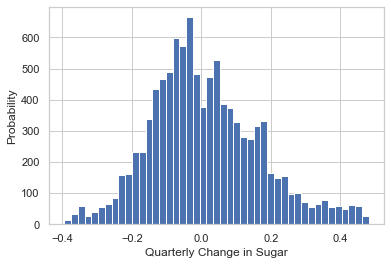

In [917]:
plt.hist(Q_sugar_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Sugar')
plt.ylabel('Probability')

In [918]:
print('You have scrapped',round((((10369 - len(Q_sugar_roll_pre))/10369)*100),2),'%. Lets review.')

You have scrapped 1.16 %. Lets review.


Looks healthy & we haven't scrapped a lot comparatively but let's review.

In [919]:
pre_sug_out = np.abs(stats.zscore(Q_sugar_roll_pre, axis=0, nan_policy='omit'))
pre_sug_out_thresh = 3
print(np.where( pre_sug_out >= pre_sug_out_thresh ))
sug_list = np.where( pre_sug_out >= pre_sug_out_thresh )

(array([], dtype=int64),)


We are done here; next `Lumber`

In [920]:
len(Q_lumber_roll_pre)

10385

Text(0, 0.5, 'Probability')

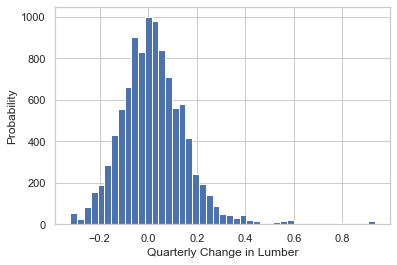

In [921]:
plt.hist(Q_lumber_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Lumber')
plt.ylabel('Probability')

This is easier to see.

In [922]:
pre_lum_out = np.abs(stats.zscore(Q_lumber_roll_pre, axis=0, nan_policy='omit'))
pre_lum_out_thresh = 3
print(np.where( pre_lum_out >= pre_lum_out_thresh ))
lum_list = np.where( pre_lum_out >= pre_lum_out_thresh )

(array([ 3336,  3337,  3338,  3339,  3340,  3341,  3342,  3343,  3344,
        3345,  3346,  3347,  3348,  3349,  3350,  3351,  3352,  3353,
        3354,  3355,  3356,  3357,  3358,  3359,  3360,  3361,  3362,
        3363,  3364,  3365,  3366,  3367,  3368,  3369,  3370,  3371,
        3372,  3373,  3374,  3375,  3376,  3377,  3378,  3379,  3380,
        3381, 10250, 10251, 10252, 10253, 10254, 10255, 10256, 10257,
       10258, 10259, 10260, 10261, 10262, 10263, 10264, 10265, 10266,
       10267, 10268, 10269, 10270, 10271, 10272, 10273, 10274, 10275,
       10276, 10277, 10278, 10279, 10280, 10281, 10282, 10283, 10284,
       10285, 10286, 10287, 10288, 10289, 10290, 10291, 10292, 10293,
       10294, 10295, 10296, 10297, 10298, 10299, 10300, 10301, 10302,
       10303, 10304, 10305, 10306, 10307, 10308, 10309, 10310, 10311,
       10312, 10313, 10314, 10315, 10316], dtype=int64),)


In [923]:
for i in lum_list:
    print(Q_lumber_roll_pre[i].sort_values())

Date
1993-03-11    0.454636
1993-05-14    0.455428
2020-08-19    0.457003
2020-11-20    0.468989
1993-05-13    0.469812
                ...   
2020-09-29    0.930569
2020-09-30    0.931183
2020-10-05    0.931325
2020-10-02    0.932938
2020-10-01    0.933175
Name: Close, Length: 113, dtype: float64


Look's correct; let's remove.

In [924]:
Q_lumber_roll_pre.drop(Q_lumber_roll_pre.index[lum_list], inplace=True)

Text(0, 0.5, 'Probability')

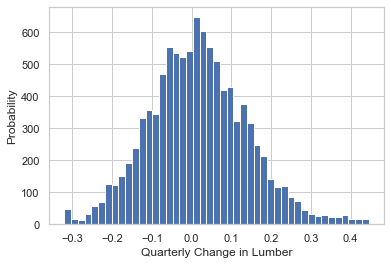

In [925]:
plt.hist(Q_lumber_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Lumber')
plt.ylabel('Probability')

Much healthier; let's review how much we scrapped.

In [926]:
print('You have scrapped',round((((10384 - len(Q_lumber_roll_pre))/10384)*100),2),'%. Lets review.')

You have scrapped 1.08 %. Lets review.


In [927]:
pre_lum_out = np.abs(stats.zscore(Q_lumber_roll_pre, axis=0, nan_policy='omit'))
pre_lum_out_thresh = 3
print(np.where( pre_lum_out >= pre_lum_out_thresh ))
lum_list = np.where( pre_lum_out >= pre_lum_out_thresh )

(array([ 3332,  3333,  3334,  3335,  3336,  3337,  3338,  3339,  3495,
        3496,  3497,  3498,  3499,  3500,  3501,  3502,  3503,  3504,
        3505,  3506,  3507,  3508,  3509,  3510,  3511,  3512,  3513,
        5376,  5377,  5378,  5379,  5380,  5381,  5382,  5383,  5384,
        5385,  5386,  5387,  5388,  5389,  5390,  5391,  5392,  5393,
        5394,  5395,  5396,  5397,  5398,  5399,  5400,  5401,  5402,
        5403,  5404,  5405,  5406, 10201, 10202, 10203, 10204, 10205,
       10206, 10271], dtype=int64),)


In [928]:
for i in lum_list:
    print(Q_lumber_roll_pre[i].sort_values())

Date
1994-01-26    0.387450
2001-07-30    0.388555
1993-12-31    0.388637
2020-08-14    0.388905
2021-03-02    0.390154
                ...   
2001-07-12    0.437611
2001-07-11    0.437705
1993-03-10    0.440003
1993-05-17    0.442156
2020-11-23    0.445578
Name: Close, Length: 65, dtype: float64


In [929]:
Q_lumber_roll_pre.drop(Q_lumber_roll_pre.index[lum_list], inplace=True)

Text(0, 0.5, 'Probability')

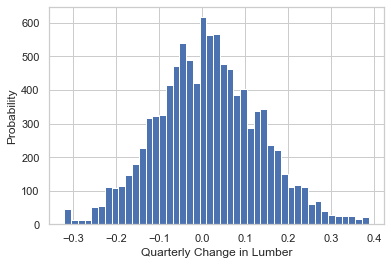

In [930]:
plt.hist(Q_lumber_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Lumber')
plt.ylabel('Probability')

In [931]:
print('You have scrapped',round((((10384 - len(Q_lumber_roll_pre))/10384)*100),2),'%. Lets review.')

You have scrapped 1.7 %. Lets review.


In [932]:
pre_lum_out = np.abs(stats.zscore(Q_lumber_roll_pre, axis=0, nan_policy='omit'))
pre_lum_out_thresh = 3
print(np.where( pre_lum_out >= pre_lum_out_thresh ))
lum_list = np.where( pre_lum_out >= pre_lum_out_thresh )

(array([ 3330,  3331,  3332,  3482,  3483,  3484,  3485,  3486,  3487,
        3488,  3489,  3490,  3491,  5347,  5348,  5349,  5350,  5351,
       10143, 10206], dtype=int64),)


In [933]:
for i in lum_list:
    print(Q_lumber_roll_pre[i].sort_values())

Date
1994-02-02    0.374254
1993-12-23    0.375165
1993-03-03    0.375318
2001-08-02    0.376213
2021-03-01    0.376506
2020-11-27    0.376721
1994-02-01    0.376842
2001-06-13    0.377438
1994-01-31    0.379111
1993-12-27    0.380226
2001-08-01    0.380509
1994-01-28    0.380845
1994-01-27    0.383269
1993-12-28    0.383423
1993-05-21    0.384531
2001-07-31    0.384697
1993-12-29    0.385644
2001-06-14    0.386288
1993-12-30    0.386901
1993-03-04    0.386955
Name: Close, dtype: float64


Although I may understand we have scrapped 1.7% & thus we will hold for now.

Next `Lean Hogs`

In [934]:
len(Q_leanhogs_roll_pre)

10415

Text(0, 0.5, 'Probability')

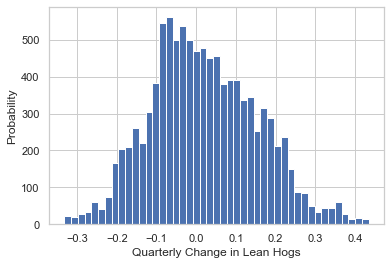

In [935]:
plt.hist(Q_leanhogs_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Lean Hogs')
plt.ylabel('Probability')

In [936]:
pre_hog_out = np.abs(stats.zscore(Q_leanhogs_roll_pre, axis=0, nan_policy='omit'))
pre_hog_out_thresh = 3
print(np.where( pre_hog_out >= pre_hog_out_thresh ))
hog_list = np.where( pre_hog_out >= pre_hog_out_thresh )

(array([4886, 4887, 4888, 4889, 4890, 4891, 4892, 4893, 4894, 4895, 4896],
      dtype=int64),)


In [937]:
for i in hog_list:
    print(Q_leanhogs_roll_pre[i].sort_values())

Date
1999-05-27    0.424474
1999-05-13    0.424683
1999-05-14    0.426439
1999-05-26    0.427657
1999-05-17    0.428871
1999-05-25    0.430024
1999-05-18    0.432179
1999-05-24    0.432637
1999-05-21    0.433742
1999-05-20    0.433874
1999-05-19    0.434222
Name: Close, dtype: float64


A bit of a modest one ( comparatively ); let's remove.

In [938]:
Q_leanhogs_roll_pre.drop(Q_leanhogs_roll_pre.index[hog_list], inplace=True)

Text(0, 0.5, 'Probability')

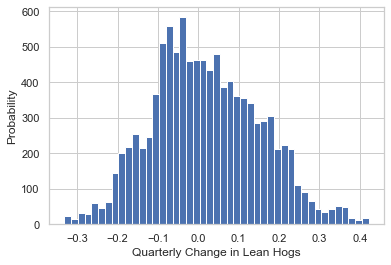

In [939]:
plt.hist(Q_leanhogs_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Lean Hogs')
plt.ylabel('Probability')

In [940]:
pre_hog_out = np.abs(stats.zscore(Q_leanhogs_roll_pre, axis=0, nan_policy='omit'))
pre_hog_out_thresh = 3
print(np.where( pre_hog_out >= pre_hog_out_thresh ))
hog_list = np.where( pre_hog_out >= pre_hog_out_thresh )

(array([4885, 4886], dtype=int64),)


In [941]:
for i in hog_list:
    print(Q_leanhogs_roll_pre[i].sort_values())

Date
1999-05-12    0.421346
1999-05-28    0.422231
Name: Close, dtype: float64


In [942]:
Q_leanhogs_roll_pre.drop(Q_leanhogs_roll_pre.index[hog_list], inplace=True)

Text(0, 0.5, 'Probability')

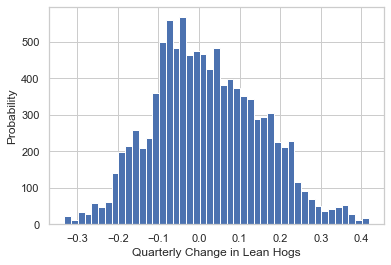

In [943]:
plt.hist(Q_leanhogs_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Lean Hogs')
plt.ylabel('Probability')

Look's reasonable but let's check.

In [944]:
pre_hog_out = np.abs(stats.zscore(Q_leanhogs_roll_pre, axis=0, nan_policy='omit'))
pre_hog_out_thresh = 3
print(np.where( pre_hog_out >= pre_hog_out_thresh ))
hog_list = np.where( pre_hog_out >= pre_hog_out_thresh )

(array([], dtype=int64),)


In [945]:
print('You have scrapped',round((((10414 - len(Q_leanhogs_roll_pre))/10414)*100),2),'% but we are complete here.')

You have scrapped 0.12 % but we are complete here.


Next `Initial Jobless Claims`

In [946]:
len(Q_intjobs_roll_pre)

2825

Text(0, 0.5, 'Probability')

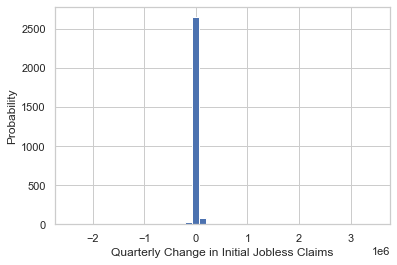

In [947]:
plt.hist(Q_intjobs_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Initial Jobless Claims')
plt.ylabel('Probability')

In [948]:
# pre_ijc_out = np.abs(stats.zscore(Q_caputil_roll_pre, axis=0, nan_policy='omit'))
# pre_ijc_out_thresh = 3
# print(np.where( pre_ijc_out >= pre_ijc_out_thresh ))
# ijc_list = np.where( pre_ijc_out >= pre_ijc_out_thresh )

In [949]:
# for i in ijc_list:
#    print(Q_caputil_roll_pre[i].sort_values())

Look's correct; let's remove.

In [950]:
# Q_caputil_roll_pre.drop(Q_caputil_roll_pre.index[ijc_list], inplace=True)

Next `Capacity Utilization`

In [951]:
len(Q_caputil_roll_pre)

649

Text(0, 0.5, 'Probability')

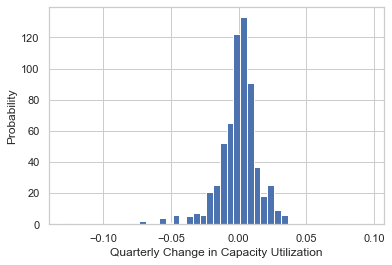

In [952]:
plt.hist(Q_caputil_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Capacity Utilization')
plt.ylabel('Probability')

In [953]:
pre_caputil_out = np.abs(stats.zscore(Q_caputil_roll_pre, axis=0, nan_policy='omit'))
pre_caputil_out_thresh = 3
print(np.where( pre_caputil_out >= pre_caputil_out_thresh ))
caputil_list = np.where( pre_caputil_out >= pre_caputil_out_thresh )

(array([ 96,  97,  98,  99, 162, 502, 505, 506, 639, 640, 641, 643, 644,
       645], dtype=int64),)


In [954]:
for i in caputil_list:
    print(Q_caputil_roll_pre[i].sort_values())

2020-06-01   -0.128528
2020-05-01   -0.122899
1975-02-01   -0.078448
2020-04-01   -0.073183
1975-03-01   -0.070410
1975-01-01   -0.067181
2009-03-01   -0.059059
2009-02-01   -0.054713
1980-07-01   -0.054691
1975-04-01   -0.054683
2008-11-01   -0.054670
2020-08-01    0.057466
2020-10-01    0.063701
2020-09-01    0.095945
dtype: float64


In [955]:
print('This would yield a',round((((14)/649)*100),2),'% scrape which will do.')

This would yield a 2.16 % scrape which will do.


In [956]:
Q_caputil_roll_pre.drop(Q_caputil_roll_pre.index[caputil_list], inplace=True)

Text(0, 0.5, 'Probability')

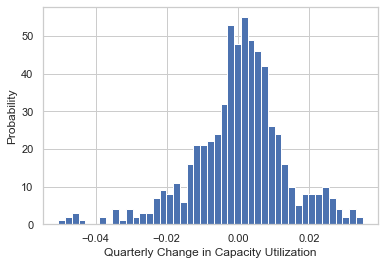

In [957]:
plt.hist(Q_caputil_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Capacity Utilization')
plt.ylabel('Probability')

Much healthier; let's see what another round looks like.

In [958]:
pre_caputil_out = np.abs(stats.zscore(Q_caputil_roll_pre, axis=0, nan_policy='omit'))
pre_caputil_out_thresh = 3
print(np.where( pre_caputil_out >= pre_caputil_out_thresh ))
caputil_list = np.where( pre_caputil_out >= pre_caputil_out_thresh )

(array([ 95, 157, 158, 496, 497, 498, 499], dtype=int64),)


In [959]:
for i in caputil_list:
    print(Q_caputil_roll_pre[i].sort_values())

2009-01-01   -0.050524
1980-06-01   -0.047983
2009-04-01   -0.047479
2008-10-01   -0.046025
1974-12-01   -0.045251
2008-12-01   -0.045073
1980-08-01   -0.044510
dtype: float64


In [960]:
print('This scrape would yield',round((((649 - (len(Q_caputil_roll_pre)-2))/649)*100),2),'% so it will be our final.')

This scrape would yield 2.47 % so it will be our final.


In [961]:
Q_caputil_roll_pre.drop(Q_caputil_roll_pre.index[caputil_list], inplace=True)

Next `Wages CPI`

In [962]:
len(Q_wages_roll_pre)

889

Text(0, 0.5, 'Probability')

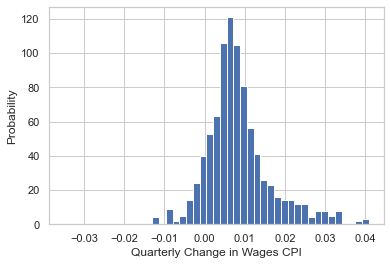

In [963]:
plt.hist(Q_wages_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Wages CPI')
plt.ylabel('Probability')

In [964]:
pre_wagcpi_out = np.abs(stats.zscore(Q_wages_roll_pre, axis=0, nan_policy='omit'))
pre_wagcpi_out_thresh = 3
print(np.where( pre_wagcpi_out >= pre_wagcpi_out_thresh ))
wagcpi_list = np.where( pre_wagcpi_out >= pre_wagcpi_out_thresh )

(array([ 49,  50,  51, 334, 389, 390, 397, 398, 399, 400, 401, 743, 744,
       745], dtype=int64),)


In [965]:
for i in wagcpi_list:
    print(Q_wages_roll_pre[i])

1951-02-01    0.037467
1951-03-01    0.040827
1951-04-01    0.035836
1974-11-01    0.033567
1979-06-01    0.033539
1979-07-01    0.033647
1980-02-01    0.035188
1980-03-01    0.039196
1980-04-01    0.039181
1980-05-01    0.038299
1980-06-01    0.033995
2008-12-01   -0.029253
2009-01-01   -0.034864
2009-02-01   -0.025147
dtype: float64


Although the vast majority are outside our eventual range which won't have any impact on our `Inflation` comparison, three are inside ( the three negative ones ) & may yield a repeated value. We now remove the middle of the three ( `2009-01-01` ) to provide some fluctuation in the eventual comparison.

In [966]:
wagecpi_drop = [744]
Q_wages_roll_pre.drop(Q_wages_roll_pre.index[wagecpi_drop], inplace=True)

In [967]:
# to confirm it was dropped
for i in wagcpi_list:
    print(Q_wages_roll_pre[i])

1951-02-01    0.037467
1951-03-01    0.040827
1951-04-01    0.035836
1974-11-01    0.033567
1979-06-01    0.033539
1979-07-01    0.033647
1980-02-01    0.035188
1980-03-01    0.039196
1980-04-01    0.039181
1980-05-01    0.038299
1980-06-01    0.033995
2008-12-01   -0.029253
2009-02-01   -0.025147
2009-03-01   -0.008872
dtype: float64


Confirmed we are complete.

Next `Unemployment Rate`

In [968]:
len(Q_unrate_roll_pre)

877

Text(0, 0.5, 'Probability')

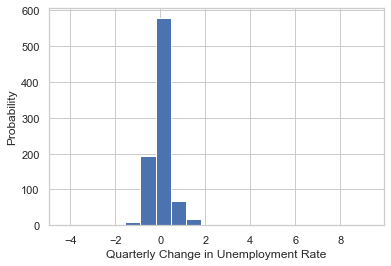

In [969]:
plt.hist(Q_unrate_roll_pre, bins=20)
plt.xlabel('Quarterly Change in Unemployment Rate')
plt.ylabel('Probability')

I am interested to see where these are.

In [970]:
pre_unem_out = np.abs(stats.zscore(Q_unrate_roll_pre, axis=0, nan_policy='omit'))
pre_unem_out_thresh = 3
print(np.where( pre_unem_out >= pre_unem_out_thresh ))
unem_list = np.where( pre_unem_out >= pre_unem_out_thresh )

(array([867, 868, 869, 870, 872, 873, 874, 875], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [971]:
# for i in unem_list:
#     print(Q_unrate_roll_pre[i].sort_values())

Next `PMI Composite Index`; welcome!

In [972]:
len(Q_comppmi_roll_pre)

877

Text(0, 0.5, 'Probability')

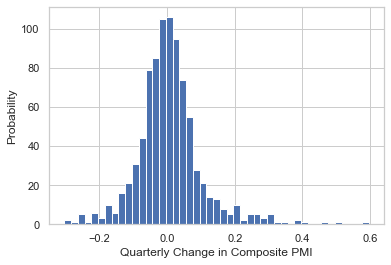

In [973]:
plt.hist(Q_comppmi_roll_pre, bins=45)
plt.xlabel('Quarterly Change in Composite PMI')
plt.ylabel('Probability')

In [974]:
pre_pmi_out = np.abs(stats.zscore(Q_comppmi_roll_pre, axis=0, nan_policy='omit'))
pre_pmi_out_thresh = 3
print(np.where( pre_pmi_out >= pre_pmi_out_thresh ))
pmi_list = np.where( pre_pmi_out >= pre_pmi_out_thresh )

(array([ 20,  21,  22,  55,  56,  57, 126, 127, 324, 330, 331, 389, 392,
       393, 394, 395], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [976]:
# There's an error which I will resolve once I have a better understanding of the final results for the others.

#for i in pmi_list:
#    print(Q_comppmi_roll_pre[i].sort_values())

Let's correct; let's remove.

In [977]:
# Q_comppmi_roll_pre.drop(Q_comppmi_roll_pre.index[pmi_list], inplace=True)

Next `GDP`

In [978]:
len(Q_gdp_pre)

300

Text(0, 0.5, 'Probability')

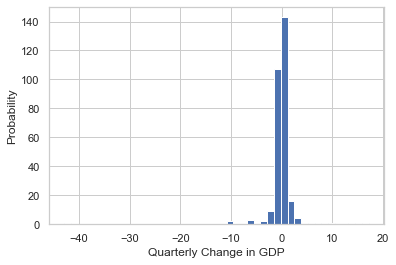

In [979]:
plt.hist(Q_gdp_pre, bins=45)
plt.xlabel('Quarterly Change in GDP')
plt.ylabel('Probability')

Looks as though there may be some outliers.

In [980]:
pre_gdp_out = np.abs(stats.zscore(Q_gdp_pre, axis=0, nan_policy='omit'))
pre_gdp_out_thresh = 3
print(np.where( pre_gdp_out >= pre_gdp_out_thresh ))
gdp_list = np.where( pre_gdp_out >= pre_gdp_out_thresh )

(array([100, 145, 223, 251, 273, 297], dtype=int64),)


In [981]:
for i in gdp_list:
    print(Q_gdp_pre[i].sort_values())

2001-10-01   -42.890857
2008-10-01   -10.301274
1982-04-01    -9.868135
2020-04-01    10.052892
2014-04-01    14.311553
1971-01-01    17.218520
dtype: float64


It's ~2% of the dataset but those are incorrect. Of the 6 identified, 4 of them would be in our data set once `Inflation` is incorporated but they are years a part; let's remove.

In [982]:
Q_gdp_pre.drop(Q_gdp_pre.index[gdp_list], inplace=True)

Text(0, 0.5, 'Probability')

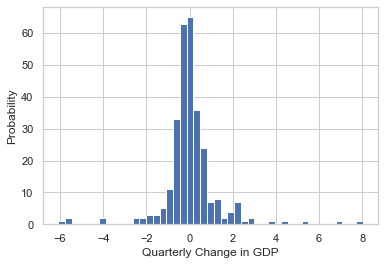

In [983]:
plt.hist(Q_gdp_pre, bins=45)
plt.xlabel('Quarterly Change in GDP')
plt.ylabel('Probability')

Better but still not suitable. Let's investigate.

In [984]:
pre_gdp_out = np.abs(stats.zscore(Q_gdp_pre, axis=0, nan_policy='omit'))
pre_gdp_out_thresh = 3
print(np.where( pre_gdp_out >= pre_gdp_out_thresh ))
gdp_list = np.where( pre_gdp_out >= pre_gdp_out_thresh )

(array([ 12,  16,  26,  31,  34,  58, 137, 178, 246], dtype=int64),)


In [985]:
for i in gdp_list:
    print(Q_gdp_pre[i].sort_values())

2008-04-01   -6.084807
1950-01-01   -5.547420
1949-01-01   -5.538247
1991-01-01   -3.937267
1960-07-01   -3.893565
1952-07-01    4.494745
1954-07-01    5.269591
1980-07-01    6.852497
1953-10-01    8.011566
dtype: float64


There's only one which would be in our data set once `Inflation` is incorporated ( `2008-04-01` ) & it's seperated from previous scrape so let's scrape them all.

In [986]:
Q_gdp_pre.drop(Q_gdp_pre.index[gdp_list], inplace=True)

Text(0, 0.5, 'Probability')

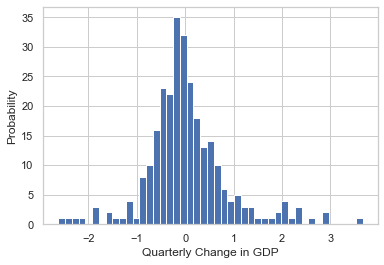

In [987]:
plt.hist(Q_gdp_pre, bins=45)
plt.xlabel('Quarterly Change in GDP')
plt.ylabel('Probability')

In [988]:
pre_gdp_out = np.abs(stats.zscore(Q_gdp_pre, axis=0, nan_policy='omit'))
pre_gdp_out_thresh = 3
print(np.where( pre_gdp_out >= pre_gdp_out_thresh ))
gdp_list = np.where( pre_gdp_out >= pre_gdp_out_thresh )

(array([ 51,  70, 211, 241, 248], dtype=int64),)


In [989]:
for i in gdp_list:
    print(Q_gdp_pre[i].sort_values())

2009-07-01   -2.622610
2001-04-01    2.678712
1965-01-01    2.841861
1960-01-01    2.912852
2011-04-01    3.662486
dtype: float64


Three more in what our `Inflation` data set would be & they don't align with the previous round so we will scrape.

In [990]:
Q_gdp_pre.drop(Q_gdp_pre.index[gdp_list], inplace=True)

Text(0, 0.5, 'Probability')

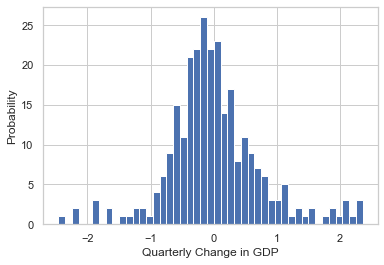

In [991]:
plt.hist(Q_gdp_pre, bins=45)
plt.xlabel('Quarterly Change in GDP')
plt.ylabel('Probability')

In [992]:
pre_gdp_out = np.abs(stats.zscore(Q_gdp_pre, axis=0, nan_policy='omit'))
pre_gdp_out_thresh = 3
print(np.where( pre_gdp_out >= pre_gdp_out_thresh ))
gdp_list = np.where( pre_gdp_out >= pre_gdp_out_thresh )

(array([ 14,  29,  41,  78, 120], dtype=int64),)


In [993]:
for i in gdp_list:
    print(Q_gdp_pre[i].sort_values())

1949-10-01   -2.462452
1954-04-01   -2.243614
1978-04-01    2.289715
1957-07-01    2.307872
1967-07-01    2.357132
dtype: float64


None of these fall within our intended `Inflation` data set so we will scrape.

In [994]:
Q_gdp_pre.drop(Q_gdp_pre.index[gdp_list], inplace=True)

Text(0, 0.5, 'Probability')

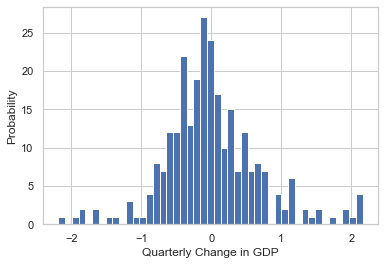

In [995]:
plt.hist(Q_gdp_pre, bins=45)
plt.xlabel('Quarterly Change in GDP')
plt.ylabel('Probability')

In [996]:
pre_gdp_out = np.abs(stats.zscore(Q_gdp_pre, axis=0, nan_policy='omit'))
pre_gdp_out_thresh = 3
print(np.where( pre_gdp_out >= pre_gdp_out_thresh ))
gdp_list = np.where( pre_gdp_out >= pre_gdp_out_thresh )

(array([ 42,  49,  91, 233, 247], dtype=int64),)


In [997]:
for i in gdp_list:
    print(Q_gdp_pre[i].sort_values())

1960-10-01   -2.185271
2009-10-01    2.064500
2013-07-01    2.072454
1958-07-01    2.094332
1972-01-01    2.159921
dtype: float64


Two of these fall into the intended `Inflation` data set but I am comfortable with those numbers. We will stop here.

Next & final, `M2 Velocity`

In [998]:
len(Q_m2_velo_pre)

248

In [999]:
# plt.hist(Q_m2_velo_pre, bins=45, axis=0, nan_policy='omit')
# plt.xlabel('Quarterly Change in M2 Velocity')
# plt.ylabel('Probability')

# 1.4.4.2 Putting the above together with Inflation

As of now you have 2 catagories; one is `Complete` & the other is `Incomplete` as of `1 Mar 2021`. 

Listed below are the `Incomplete`

In [1000]:
# Q_heatoil_roll_pre
# Q_soybeans_roll_pre
# Q_copper_roll_pre
# Q_m2_velo_pre
# Q_comppmi_roll_pre
# Q_unrate_roll_pre
# Q_intjobs_roll_pre

Listed below are the `Complete`.

In [1001]:
# Q_usd_index_roll_pre
# Q_wti_roll_pre

# Q_corn_roll_pre
# Q_wheat_roll_pre
# Q_cattle_roll_pre
# Q_sugar_roll_pre
# Q_lumber_roll_pre
# Q_leanhogs_roll_pre

# Q_caputil_roll_pre
# Q_wages_roll_pre

# Q_cpi

# Q_gdp_pre


Let's begin by concating the `Complete` together first with `Inflation` to get rough idea as to how it may look.

In [1002]:
# Building out the variables first with a roll & forward fill
QonQ_vars_roll_pre = pd.concat([Q_wages_roll_pre,Q_wti_roll_pre,Q_corn_roll_pre,Q_wheat_roll_pre,Q_cattle_roll_pre,
                            Q_leanhogs_roll_pre,Q_sugar_roll_pre,Q_lumber_roll_pre,
                            Q_caputil_roll_pre,Q_gdp_pre,Q_usd_index_roll_pre
                      ],
                      axis = 1, ignore_index=False)

QonQ_vars_roll_pre.columns= ['Wages CPI','WTI','Corn','Wheat','Cattle','Lean Hogs','Sugar','Lumber',
                         'Capacity Utilization','GDP','USD Index'
                   ]

QonQ_vars_roll_pre.index.names = ["Date"]
QonQ_vars_roll_pre = QonQ_vars_roll_pre.fillna(method='ffill')

# vars_mnth.tail()

In [1003]:
QonQ_vars_roll_pre.tail()

Wages CPI       WTI      Corn     Wheat    Cattle  Lean Hogs  \
Date                                                                       
2021-02-25   0.006251  0.287205  0.266710  0.077596  0.056120   0.069813   
2021-02-26   0.006251  0.294725  0.267969  0.079236  0.056126   0.071797   
2021-02-28   0.006251  0.294725  0.267969  0.081492  0.056126   0.071797   
2021-03-01   0.006251  0.301412  0.269512  0.083788  0.056419   0.073515   
2021-03-02   0.006251  0.301412  0.270518  0.085158  0.056700   0.075349   

               Sugar    Lumber  Capacity Utilization       GDP  USD Index  
Date                                                                       
2021-02-25  0.153654  0.352580              0.028146 -0.822509  -0.028430  
2021-02-26  0.153711  0.364326              0.028146 -0.822509  -0.028476  
2021-02-28  0.153711  0.364326              0.028146 -0.822509  -0.028476  
2021-03-01  0.152278  0.376506              0.028146 -0.822509  -0.028458  
2021-03-02  0.150827  0.376506              0.028146 -0.822509  -0.028458

In [1004]:
# Putting them together with inflation
QonQ_main_cpi_pre = Q_cpi.merge(QonQ_vars_roll_pre, how='left', on='Date')

# QonQ_main_cpi_pre = QonQ_main_cpi_past[QonQ_main_cpi_past.index.dayofweek < 5]

QonQ_main_cpi_pre.columns = ['Inflation','Wages CPI','WTI','Corn','Wheat','Cattle','Lean Hogs','Sugar','Lumber',
                         'Capacity Utilization','GDP','USD Index']

QonQ_main_cpi_pre = QonQ_main_cpi_pre.dropna()

We will undergo the same process as before in 1.3.4.

In [1005]:
QonQ_main_cpi_pre.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 1990-07-31 to 2020-09-30
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Inflation             266 non-null    float64
 1   Wages CPI             266 non-null    float64
 2   WTI                   266 non-null    float64
 3   Corn                  266 non-null    float64
 4   Wheat                 266 non-null    float64
 5   Cattle                266 non-null    float64
 6   Lean Hogs             266 non-null    float64
 7   Sugar                 266 non-null    float64
 8   Lumber                266 non-null    float64
 9   Capacity Utilization  266 non-null    float64
 10  GDP                   266 non-null    float64
 11  USD Index             266 non-null    float64
dtypes: float64(12)
memory usage: 27.0 KB


In [1006]:
QonQ_main_cpi_pre.corr(method='pearson')

Inflation  Wages CPI       WTI      Corn     Wheat  \
Inflation              1.000000   0.400352  0.239716  0.059933 -0.053326   
Wages CPI              0.400352   1.000000  0.672503  0.147434  0.051780   
WTI                    0.239716   0.672503  1.000000  0.046641 -0.033838   
Corn                   0.059933   0.147434  0.046641  1.000000  0.598298   
Wheat                 -0.053326   0.051780 -0.033838  0.598298  1.000000   
Cattle                 0.197409   0.186175  0.098767  0.009387  0.017512   
Lean Hogs              0.215901   0.169267  0.233720  0.183379 -0.123106   
Sugar                 -0.000066   0.189016  0.178700  0.120051  0.127240   
Lumber                 0.049883   0.080750  0.185514  0.123952  0.026505   
Capacity Utilization   0.033532   0.114969  0.153260  0.106608  0.150229   
GDP                    0.069434  -0.103722 -0.083542 -0.035440  0.022767   
USD Index             -0.009211  -0.394378 -0.399965 -0.128251 -0.133360   

                        Cattle  Lean Hogs     Sugar    Lumber  \
Inflation             0.197409   0.215901 -0.000066  0.049883   
Wages CPI             0.186175   0.169267  0.189016  0.080750   
WTI                   0.098767   0.233720  0.178700  0.185514   
Corn                  0.009387   0.183379  0.120051  0.123952   
Wheat                 0.017512  -0.123106  0.127240  0.026505   
Cattle                1.000000   0.095293  0.062184  0.220984   
Lean Hogs             0.095293   1.000000 -0.134874  0.251825   
Sugar                 0.062184  -0.134874  1.000000  0.032767   
Lumber                0.220984   0.251825  0.032767  1.000000   
Capacity Utilization  0.227306   0.135005  0.118949  0.108836   
GDP                   0.071207   0.111913  0.003899  0.055405   
USD Index            -0.027766   0.059972 -0.130848  0.084342   

                      Capacity Utilization       GDP  USD Index  
Inflation                         0.033532  0.069434  -0.009211  
Wages CPI                         0.114969 -0.103722  -0.394378  
WTI                               0.153260 -0.083542  -0.399965  
Corn                              0.106608 -0.035440  -0.128251  
Wheat                             0.150229  0.022767  -0.133360  
Cattle                            0.227306  0.071207  -0.027766  
Lean Hogs                         0.135005  0.111913   0.059972  
Sugar                             0.118949  0.003899  -0.130848  
Lumber                            0.108836  0.055405   0.084342  
Capacity Utilization              1.000000  0.335346  -0.067986  
GDP                               0.335346  1.000000   0.138572  
USD Index                        -0.067986  0.138572   1.000000

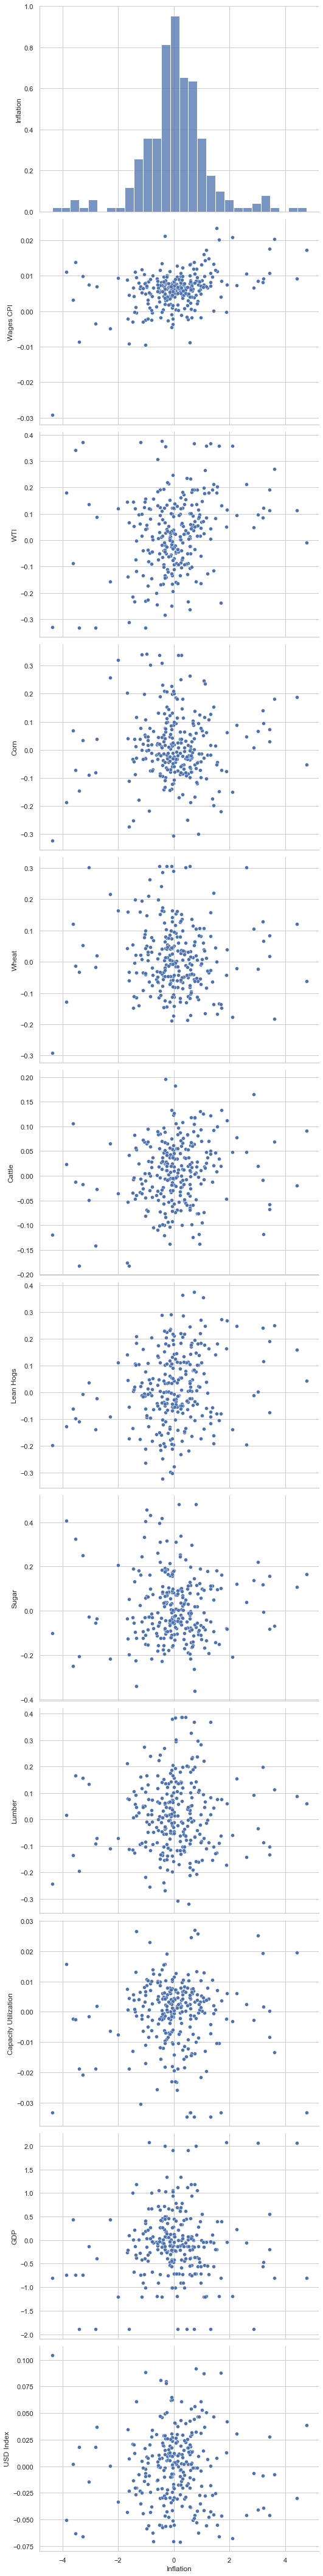

In [1007]:
sns.pairplot(QonQ_main_cpi_pre,
            y_vars = ['Inflation','Wages CPI','WTI','Corn','Wheat','Cattle','Lean Hogs','Sugar','Lumber',
                         'Capacity Utilization','GDP','USD Index'],
            x_vars = ['Inflation'],
             height=5, aspect=1.5,
            )

Text(0, 0.5, 'Probability')

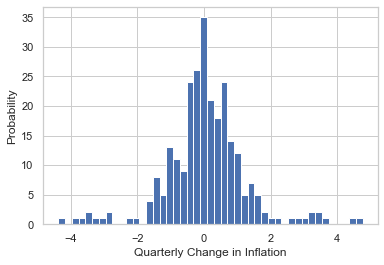

In [1008]:
plt.hist(QonQ_main_cpi_pre['Inflation'], bins=45)
plt.xlabel('Quarterly Change in Inflation')
plt.ylabel('Probability')

In [1009]:
pre_cpi_out = np.abs(stats.zscore(QonQ_main_cpi_pre['Inflation'], axis=0, nan_policy='omit'))
pre_cpi_out_thresh = 3
print(np.where( pre_cpi_out >= pre_cpi_out_thresh ))
cpi_list = np.where( pre_cpi_out >= pre_cpi_out_thresh )

(array([137, 154, 156, 162, 164], dtype=int64),)


In [1010]:
for i in cpi_list:
    print(QonQ_main_cpi_pre['Inflation'][i].sort_values())

Date
2008-12-31   -4.371
2009-09-30   -3.866
2006-10-31   -3.611
2009-12-31    4.414
2008-09-30    4.761
Name: Inflation, dtype: float64


None appear directly next to each other so let's proceed.

In [1011]:
QonQ_main_cpi_pre.drop(QonQ_main_cpi_pre.index[cpi_list], inplace=True)

Text(0, 0.5, 'Probability')

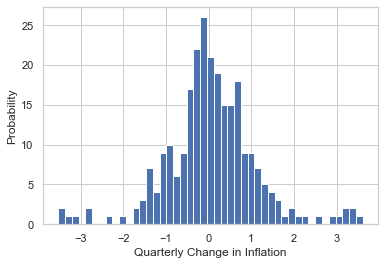

In [1012]:
plt.hist(QonQ_main_cpi_pre['Inflation'], bins=45)
plt.xlabel('Quarterly Change in Inflation')
plt.ylabel('Probability')

In [1013]:
print('Of the original',round((((266 - len(QonQ_main_cpi_pre))/266)*100),2),'% have been scrapped. Lets continue.')

Of the original 1.88 % have been scrapped. Lets continue.


In [1014]:
pre_cpi_out = np.abs(stats.zscore(QonQ_main_cpi_pre['Inflation'], axis=0, nan_policy='omit'))
pre_cpi_out_thresh = 3
print(np.where( pre_cpi_out >= pre_cpi_out_thresh ))
cpi_list = np.where( pre_cpi_out >= pre_cpi_out_thresh )

(array([127, 135, 152, 157, 158, 256], dtype=int64),)


In [1015]:
for i in cpi_list:
    print(QonQ_main_cpi_pre['Inflation'][i].sort_values())

Date
2009-08-31   -3.525
2020-05-31   -3.409
2009-07-31   -3.274
2005-09-30    3.428
2006-07-31    3.439
2008-07-31    3.608
Name: Inflation, dtype: float64


While these appear to be outliers, let's check to see what scraping these result in percent of the total. 

In [1016]:
print('Of the original',round((((266 - (len(QonQ_main_cpi_pre)-6))/266)*100),2),'% would have been scrapped. Not beautiful but lets see.')

Of the original 4.14 % would have been scrapped. Not beautiful but lets see.


In [1017]:
QonQ_main_cpi_pre.drop(QonQ_main_cpi_pre.index[cpi_list], inplace=True)

Text(0, 0.5, 'Probability')

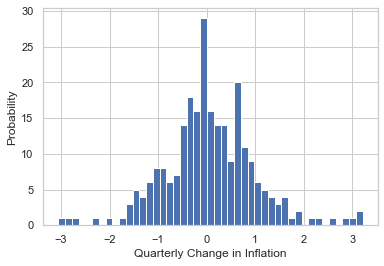

In [1018]:
plt.hist(QonQ_main_cpi_pre['Inflation'], bins=45)
plt.xlabel('Quarterly Change in Inflation')
plt.ylabel('Probability')

In [1019]:
pre_cpi_out = np.abs(stats.zscore(QonQ_main_cpi_pre['Inflation'], axis=0, nan_policy='omit'))
pre_cpi_out_thresh = 3
print(np.where( pre_cpi_out >= pre_cpi_out_thresh ))
cpi_list = np.where( pre_cpi_out >= pre_cpi_out_thresh )

(array([125, 133, 141, 154, 155, 248, 250], dtype=int64),)


In [1020]:
for i in cpi_list:
    print(QonQ_main_cpi_pre['Inflation'][i])

Date
2005-06-30   -2.775
2006-06-30    3.213
2007-08-31   -3.057
2009-11-30    3.017
2010-01-31    3.199
2020-01-31    2.881
2020-04-30   -2.815
Name: Inflation, dtype: float64


In [1021]:
print('Too redefine the boundaries of ±3%,',round((((266 - (len(QonQ_main_cpi_pre)-4))/266)*100),2),'% would be scrapped. To remain consistent, we shall scrape accordingly.')

Too redefine the boundaries of ±3%, 5.64 % would be scrapped. To remain consistent, we shall scrape accordingly.


In [1022]:
cpi_scr = [ 133, 141, 154, 155 ]
QonQ_main_cpi_pre.drop(QonQ_main_cpi_pre.index[cpi_scr], inplace=True)

Last check.

Text(0, 0.5, 'Probability')

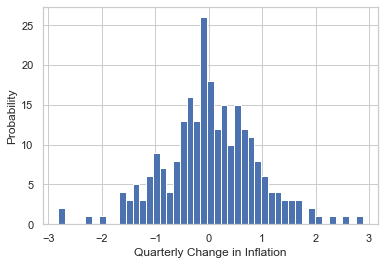

In [1023]:
plt.hist(QonQ_main_cpi_pre['Inflation'], bins=45)
plt.xlabel('Quarterly Change in Inflation')
plt.ylabel('Probability')

In [1024]:
QonQ_main_cpi_pre.corr(method='pearson')

Inflation  Wages CPI       WTI      Corn     Wheat  \
Inflation              1.000000   0.331023  0.277517 -0.121279 -0.118115   
Wages CPI              0.331023   1.000000  0.659509  0.065850 -0.003436   
WTI                    0.277517   0.659509  1.000000  0.002290 -0.069672   
Corn                  -0.121279   0.065850  0.002290  1.000000  0.613403   
Wheat                 -0.118115  -0.003436 -0.069672  0.613403  1.000000   
Cattle                 0.245804   0.139642  0.082849 -0.024123  0.017489   
Lean Hogs              0.133321   0.126120  0.223055  0.138687 -0.162204   
Sugar                 -0.025362   0.139914  0.118495  0.137364  0.149945   
Lumber                 0.036955   0.009367  0.143692  0.103447  0.000278   
Capacity Utilization  -0.050763   0.070458  0.136011  0.063303  0.114242   
GDP                   -0.050796  -0.176051 -0.117186 -0.091911 -0.013049   
USD Index              0.006862  -0.364924 -0.355048 -0.099900 -0.102081   

                        Cattle  Lean Hogs     Sugar    Lumber  \
Inflation             0.245804   0.133321 -0.025362  0.036955   
Wages CPI             0.139642   0.126120  0.139914  0.009367   
WTI                   0.082849   0.223055  0.118495  0.143692   
Corn                 -0.024123   0.138687  0.137364  0.103447   
Wheat                 0.017489  -0.162204  0.149945  0.000278   
Cattle                1.000000   0.087331  0.056318  0.201449   
Lean Hogs             0.087331   1.000000 -0.138371  0.238649   
Sugar                 0.056318  -0.138371  1.000000 -0.003335   
Lumber                0.201449   0.238649 -0.003335  1.000000   
Capacity Utilization  0.231360   0.117959  0.100959  0.090235   
GDP                   0.044913   0.106630 -0.010246  0.055995   
USD Index            -0.022408   0.090744 -0.090399  0.131278   

                      Capacity Utilization       GDP  USD Index  
Inflation                        -0.050763 -0.050796   0.006862  
Wages CPI                         0.070458 -0.176051  -0.364924  
WTI                               0.136011 -0.117186  -0.355048  
Corn                              0.063303 -0.091911  -0.099900  
Wheat                             0.114242 -0.013049  -0.102081  
Cattle                            0.231360  0.044913  -0.022408  
Lean Hogs                         0.117959  0.106630   0.090744  
Sugar                             0.100959 -0.010246  -0.090399  
Lumber                            0.090235  0.055995   0.131278  
Capacity Utilization              1.000000  0.291893  -0.006916  
GDP                               0.291893  1.000000   0.175629  
USD Index                        -0.006916  0.175629   1.000000

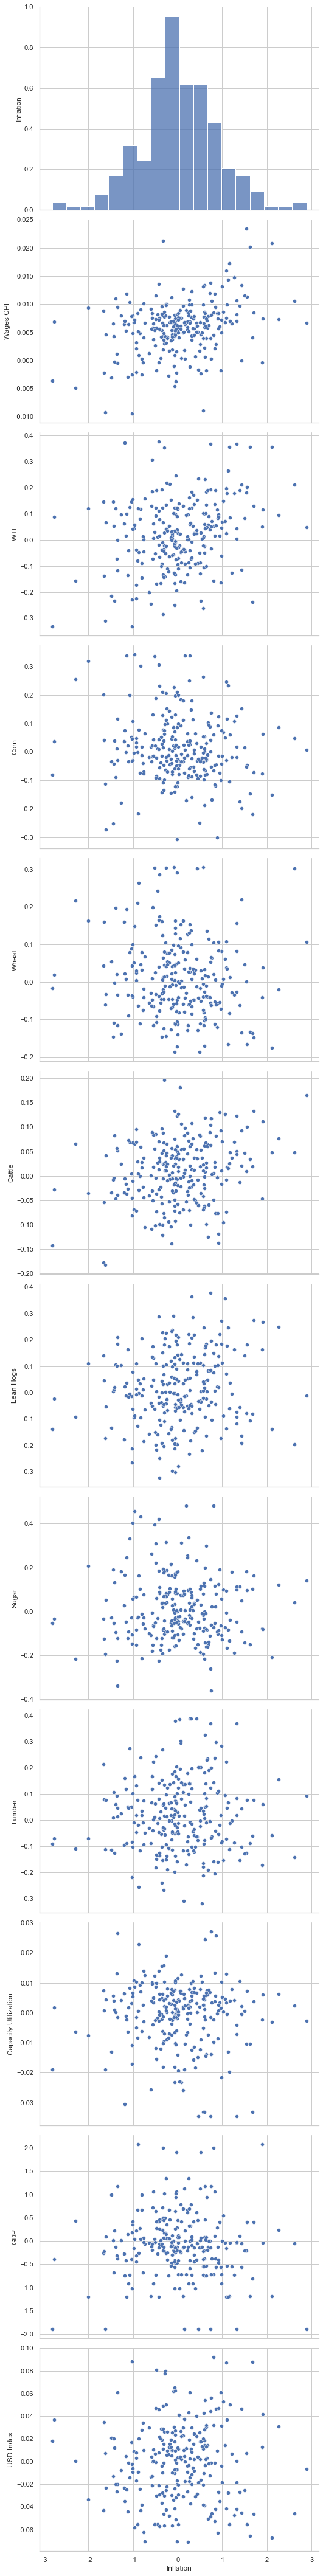

In [1025]:
sns.pairplot(QonQ_main_cpi_pre,
            y_vars = ['Inflation','Wages CPI','WTI','Corn','Wheat','Cattle','Lean Hogs','Sugar','Lumber',
                         'Capacity Utilization','GDP','USD Index'],
            x_vars = ['Inflation'],
             height=5, aspect=1.5,
            )

Text(0.5, 1.0, 'Quarter on Quarter Comparison')

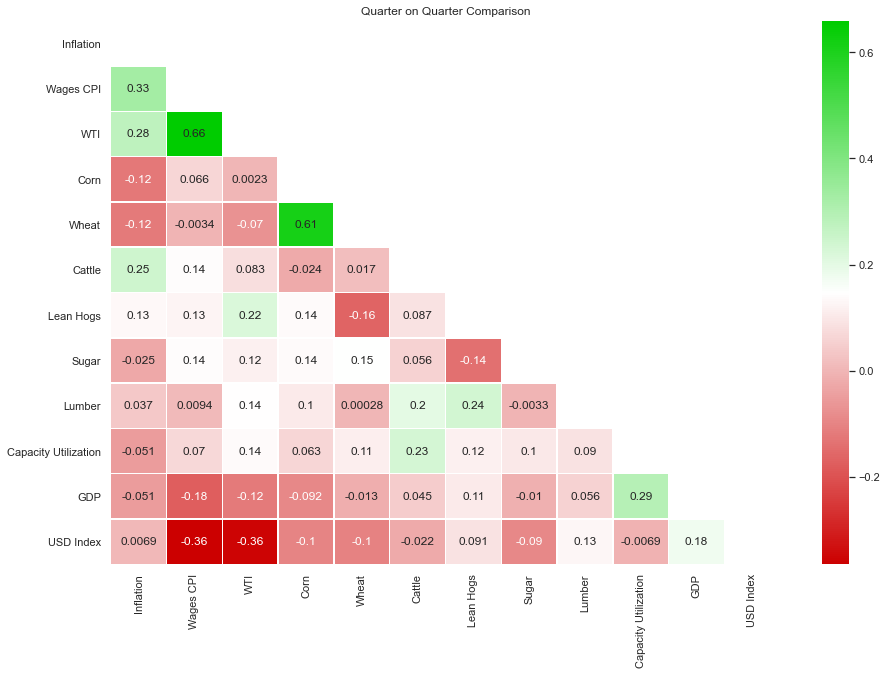

In [1026]:
plt.subplots(figsize=(15,10))
matrix = np.triu(QonQ_main_cpi_pre.corr())
sns.heatmap(QonQ_main_cpi_pre.corr(), mask=matrix, linewidths=.5, cmap=GnRd, annot=True)
plt.title('Quarter on Quarter Comparison')

**This also appears to yield even worse results**; with the exception of `Cattle`. 